#### This project covers -
* binary/multiclass classification (logistic regression, decision trees, SVM)
* ensemble methods (Random Forest, XGBoost, Gradient Boosting)
* performance evaluation (ROC/AUC, precision/recall)
* class imbalance handling, and practical applications with some datasets

In [2]:
"""
covers:
1. Classification Fundamentals (Binary vs Multiclass)
2. Logistic Regression (Sigmoid, MLE, Regularization)
3. Decision Trees (Entropy, Gini, Pruning)
4. Support Vector Machines (Margin, Kernels, Hyperparameters)
5. Ensemble Methods (Random Forest, XGBoost, AdaBoost)
6. Performance Evaluation (Precision/Recall)

"""

# Standard library
from datetime import date

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# scikit-learn
from sklearn.base import clone
from sklearn.calibration import calibration_curve
from sklearn.datasets import (
    load_breast_cancer, load_wine, load_digits, load_iris, load_diabetes,
    make_classification, make_moons
)
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score,
    ConfusionMatrixDisplay, log_loss, precision_recall_curve, average_precision_score
)
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, TimeSeriesSplit, StratifiedKFold
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.class_weight import compute_class_weight


import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")




## Simple Classification Example (Logistic Regression model)

In [3]:
# =============================================================================
# Simple Classification Example (Logistic Regression model)
# =============================================================================
# 1) Load data
X, y = load_breast_cancer(return_X_y=True)

# 2) Train/test split (proper naming)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 4) Evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"classification Report: {classification_report(y_test, y_pred)}")



Accuracy: 0.947
classification Report:               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Wine Type Classification

In [6]:
# 1) Load full (3-class) dataset
X, y = load_wine(return_X_y=True)

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Multinomial Logistic Regression (no scaling)
clf = LogisticRegression(
    solver='lbfgs', max_iter=2000, random_state=42
)
clf.fit(X_train, y_train)

# 4) Evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"classification Report: {classification_report(y_test, y_pred)}")

Accuracy: 0.944
classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36




PART 1: CLASSIFICATION FUNDAMENTALS
Breast Cancer Dataset (Binary Classification):
Features: 30
Samples: 569
Classes: [0 1] (['malignant' 'benign'])

Wine Dataset (Multiclass Classification):
Features: 13
Samples: 178
Classes: [0 1 2] (['class_0' 'class_1' 'class_2'])


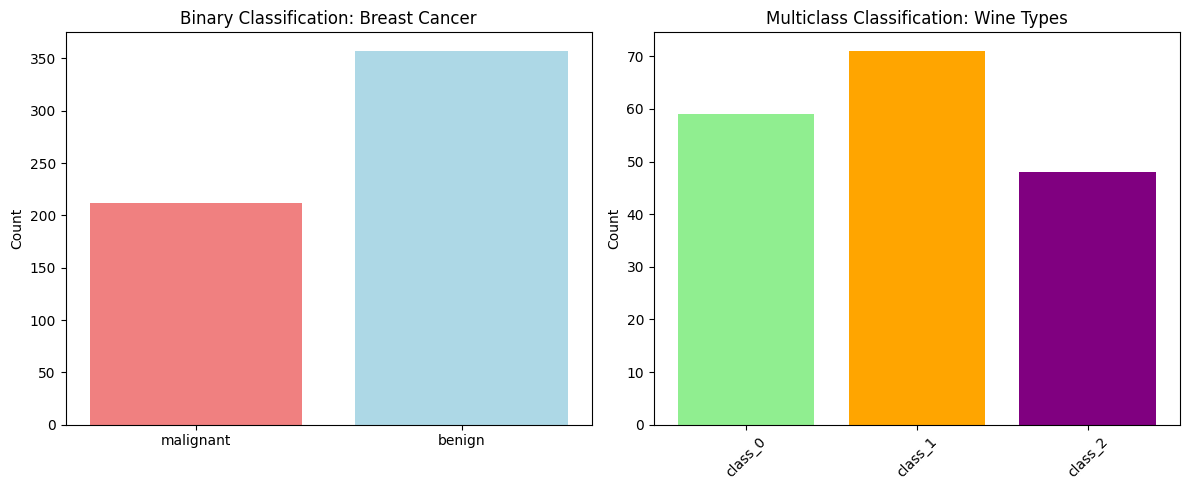

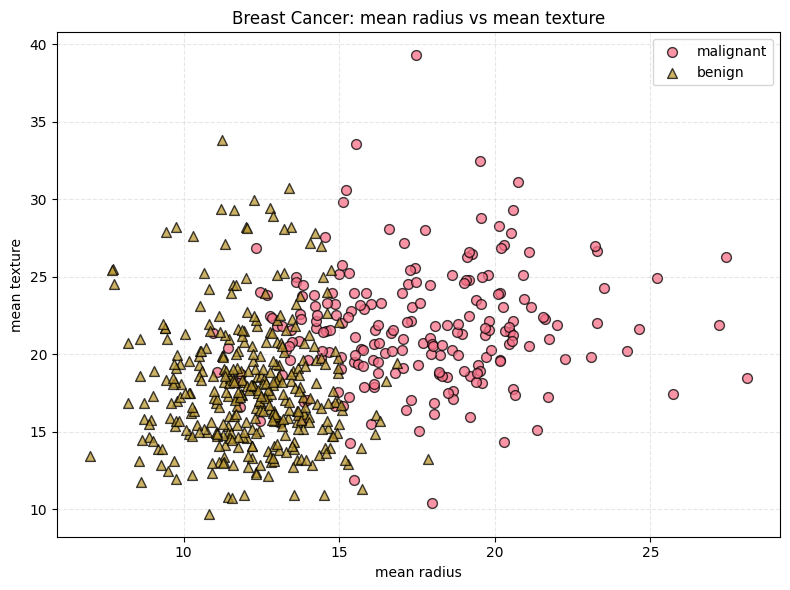

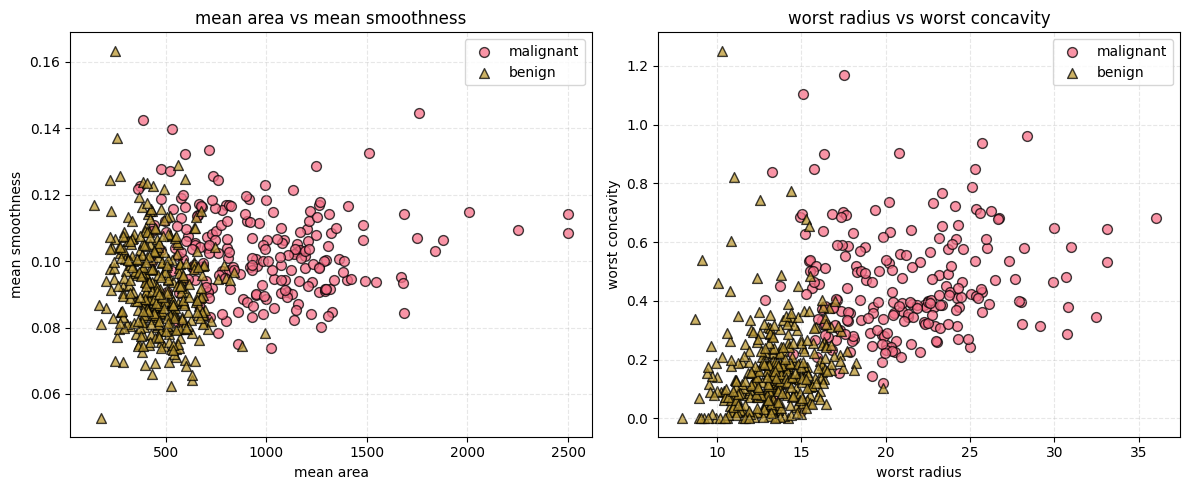

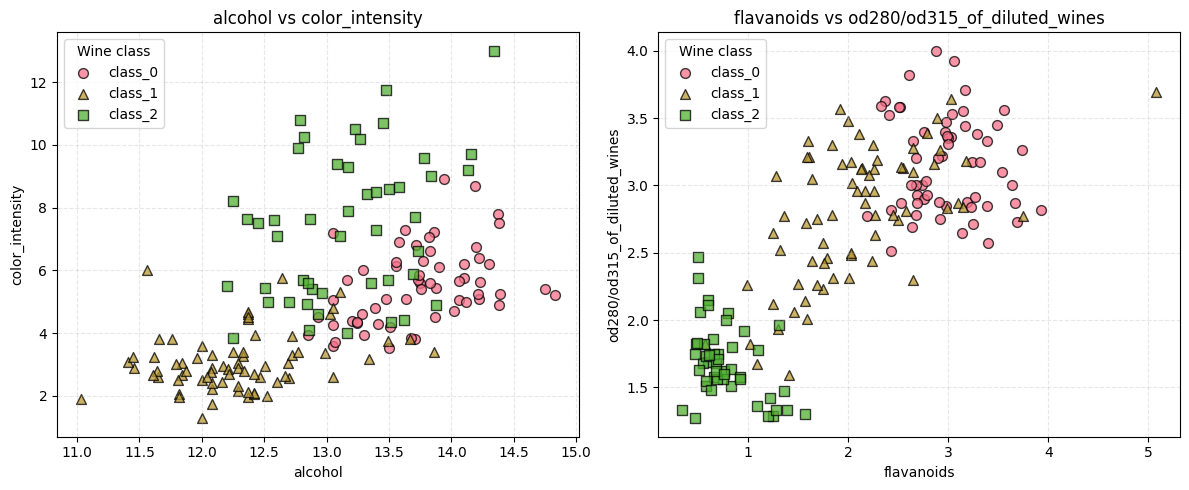


Chosen features for scatter:
  X-axis: mean radius (index 0)
  Y-axis: mean texture (index 1)

2D Synthetic Dataset for Visualization:
Shape: (300, 2)
Classes: [0 1]


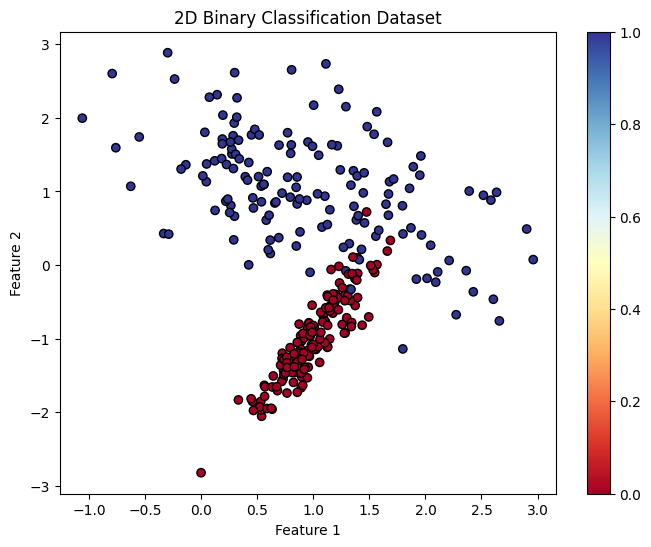

In [7]:

# =============================================================================
# PART 1: CLASSIFICATION FUNDAMENTALS
# =============================================================================

print("\n" + "="*50)
print("PART 1: CLASSIFICATION FUNDAMENTALS")
print("="*50)

# Load breast cancer dataset for binary classification
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

print(f"Breast Cancer Dataset (Binary Classification):")
print(f"Features: {X_cancer.shape[1]}")
print(f"Samples: {X_cancer.shape[0]}")
print(f"Classes: {np.unique(y_cancer)} ({cancer_data.target_names})")

# Load wine dataset for multiclass classification  
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

print(f"\nWine Dataset (Multiclass Classification):")
print(f"Features: {X_wine.shape[1]}")
print(f"Samples: {X_wine.shape[0]}")
print(f"Classes: {np.unique(y_wine)} ({wine_data.target_names})")

# Visualize class distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Binary classification distribution
unique, counts = np.unique(y_cancer, return_counts=True)
ax1.bar(cancer_data.target_names, counts, color=['lightcoral', 'lightblue'])
ax1.set_title('Binary Classification: Breast Cancer')
ax1.set_ylabel('Count')

# Multiclass classification distribution
unique, counts = np.unique(y_wine, return_counts=True)
ax2.bar(wine_data.target_names, counts, color=['lightgreen', 'orange', 'purple'])
ax2.set_title('Multiclass Classification: Wine Types')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# === Visualize class datapoints for two Breast Cancer features ===

# Pick any two feature names you like from cancer_data.feature_names
feat_x_name = 'mean radius'
feat_y_name = 'mean texture'

# Find their column indices
feat_names = cancer_data.feature_names
try:
    ix = int(np.where(feat_names == feat_x_name)[0][0])
    iy = int(np.where(feat_names == feat_y_name)[0][0])
except IndexError:
    raise ValueError(f"One of the feature names not found. Available features:\n{feat_names}")

# Split by class (0 = malignant, 1 = benign)
malignant_mask = (y_cancer == 0)
benign_mask    = (y_cancer == 1)

plt.figure(figsize=(8, 6))
plt.scatter(X_cancer[malignant_mask, ix], X_cancer[malignant_mask, iy],
            label='malignant', alpha=0.75, edgecolors='black', s=50, marker='o')
plt.scatter(X_cancer[benign_mask, ix], X_cancer[benign_mask, iy],
            label='benign', alpha=0.75, edgecolors='black', s=50, marker='^')

plt.title(f'Breast Cancer: {feat_x_name} vs {feat_y_name}')
plt.xlabel(feat_x_name)
plt.ylabel(feat_y_name)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

def plot_bc_pair(fx, fy, ax):
    names = cancer_data.feature_names
    try:
        ix = np.where(names == fx)[0][0]
        iy = np.where(names == fy)[0][0]
    except IndexError:
        raise ValueError(f"Feature not found. Pick from:\n{names}")

    malignant = (y_cancer == 0)
    benign    = (y_cancer == 1)

    ax.scatter(X_cancer[malignant, ix], X_cancer[malignant, iy],
               label='malignant', alpha=0.75, edgecolors='black', s=50, marker='o')
    ax.scatter(X_cancer[benign, ix], X_cancer[benign, iy],
               label='benign', alpha=0.75, edgecolors='black', s=50, marker='^')

    ax.set_title(f'{fx} vs {fy}')
    ax.set_xlabel(fx)
    ax.set_ylabel(fy)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

pairs = [
    ('mean area', 'mean smoothness'),
    ('worst radius', 'worst concavity'),
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for (fx, fy), ax in zip(pairs, axes):
    plot_bc_pair(fx, fy, ax)

plt.tight_layout()
plt.show()

# === Visualize Wine types with two feature pairs ===
import numpy as np
import matplotlib.pyplot as plt

def plot_wine_pair(fx, fy, ax):
    names = wine_data.feature_names
    name_to_idx = {n: i for i, n in enumerate(names)}
    if fx not in name_to_idx or fy not in name_to_idx:
        raise ValueError(f"Pick features from:\n{names}")

    ix, iy = name_to_idx[fx], name_to_idx[fy]
    markers = ['o', '^', 's']  # one marker per class

    for cls in np.unique(y_wine):
        mask = (y_wine == cls)
        ax.scatter(
            X_wine[mask, ix], X_wine[mask, iy],
            label=wine_data.target_names[cls],
            alpha=0.75, edgecolors='black', s=50, marker=markers[cls]
        )

    ax.set_title(f'{fx} vs {fy}')
    ax.set_xlabel(fx)
    ax.set_ylabel(fy)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(title='Wine class')

# Choose any pairs you like:
pairs = [
    ('alcohol', 'color_intensity'),
    ('flavanoids', 'od280/od315_of_diluted_wines'),
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for (fx, fy), ax in zip(pairs, axes):
    plot_wine_pair(fx, fy, ax)

plt.tight_layout()
plt.show()

# (Optional) Print a quick check of the two chosen features
print("\nChosen features for scatter:")
print(f"  X-axis: {feat_x_name} (index {ix})")
print(f"  Y-axis: {feat_y_name} (index {iy})")

# Create simple 2D dataset for decision boundary visualization
X_2d, y_2d = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                                n_informative=2, random_state=42, n_clusters_per_class=1)

print(f"\n2D Synthetic Dataset for Visualization:")
print(f"Shape: {X_2d.shape}")
print(f"Classes: {np.unique(y_2d)}")

# Visualize 2D dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap='RdYlBu', edgecolors='black')
plt.title('2D Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()



PART 2: LOGISTIC REGRESSION

2.1 Sigmoid, Logit, and Derivative


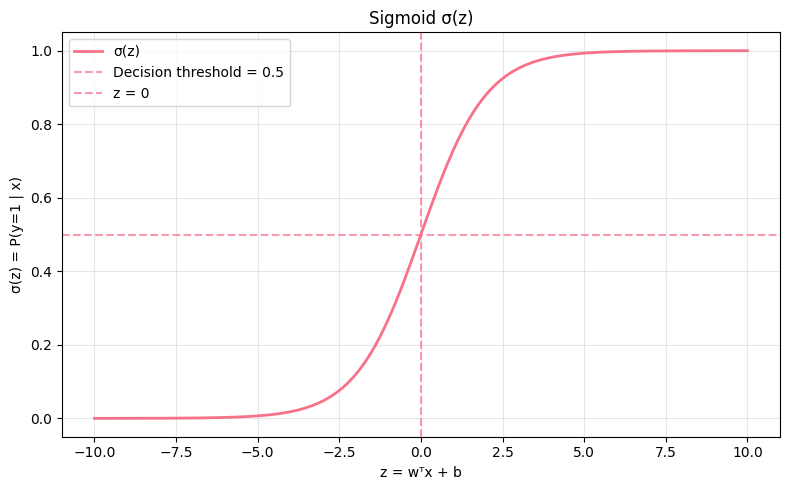

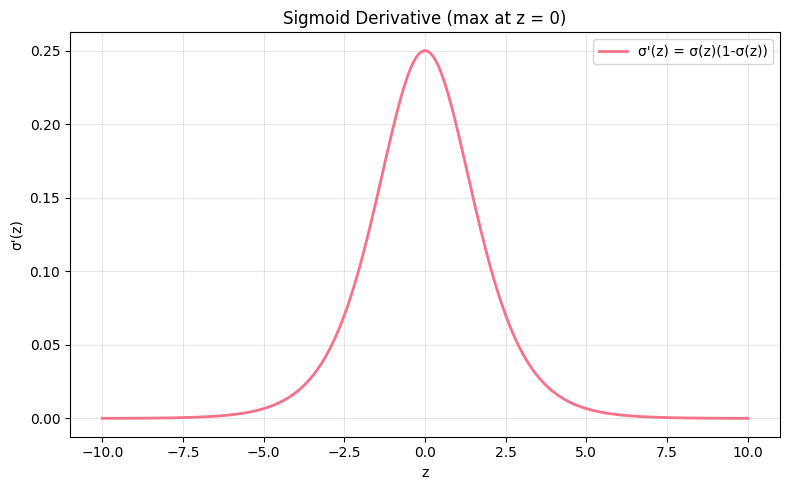

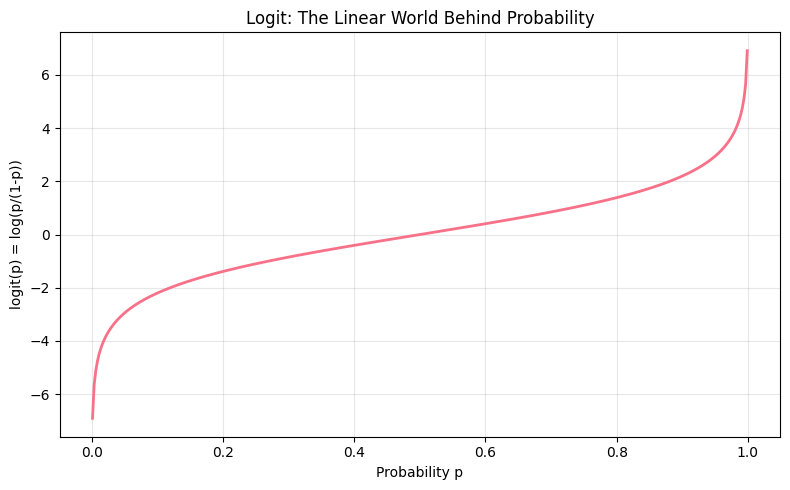


2.2 Logistic Loss Intuition


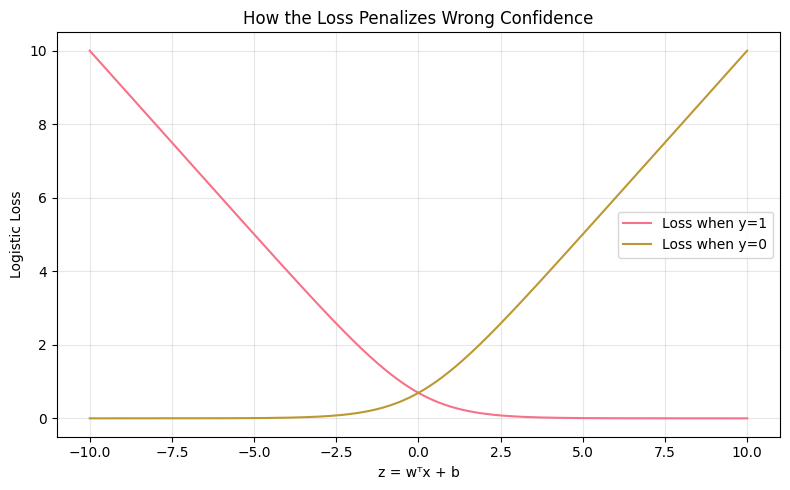


2.3 Logistic Regression on Breast Cancer (with scaling)
Accuracy : 0.982
Precision: 0.986
Recall   : 0.986
F1-Score : 0.986


<Figure size 550x500 with 0 Axes>

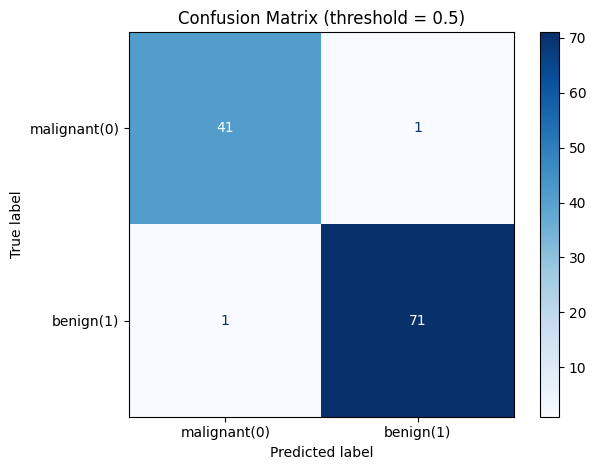

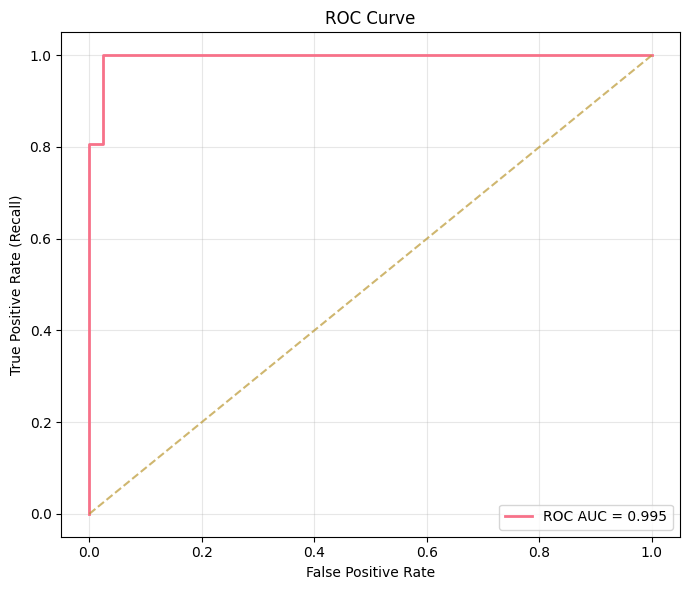

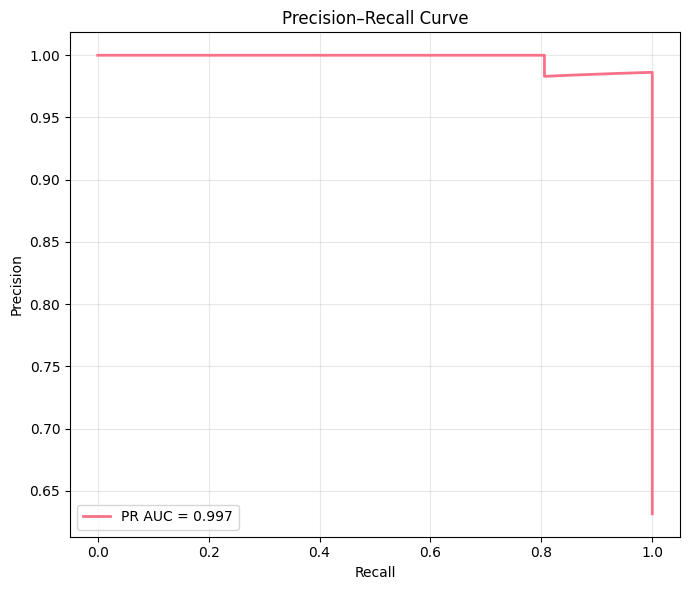

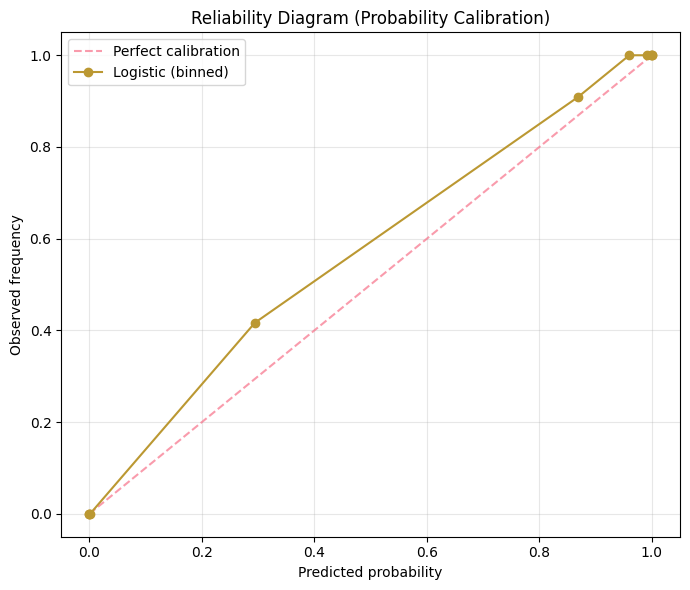


2.4 Threshold Tuning


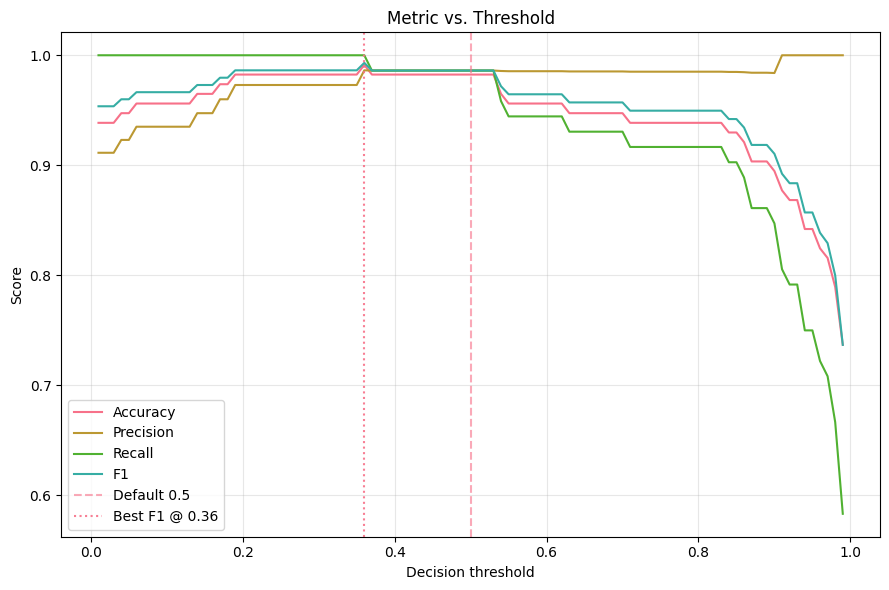

Best F1 threshold ≈ 0.36
F1 at best threshold: 0.993

2.5 Coefficient Interpretation (top effects & odds ratios)
Top features by |coefficient| (standardized):
Rank | Feature name                      | Coef (std) | Odds Ratio = exp(coef)
   1 | worst texture                  |     -1.255 |      0.285
   2 | radius error                   |     -1.083 |      0.339
   3 | worst concave points           |     -0.954 |      0.385
   4 | worst area                     |     -0.948 |      0.388
   5 | worst radius                   |     -0.948 |      0.388
   6 | worst symmetry                 |     -0.939 |      0.391
   7 | area error                     |     -0.929 |      0.395
   8 | worst concavity                |     -0.823 |      0.439
   9 | worst perimeter                |     -0.763 |      0.466
  10 | worst smoothness               |     -0.747 |      0.474


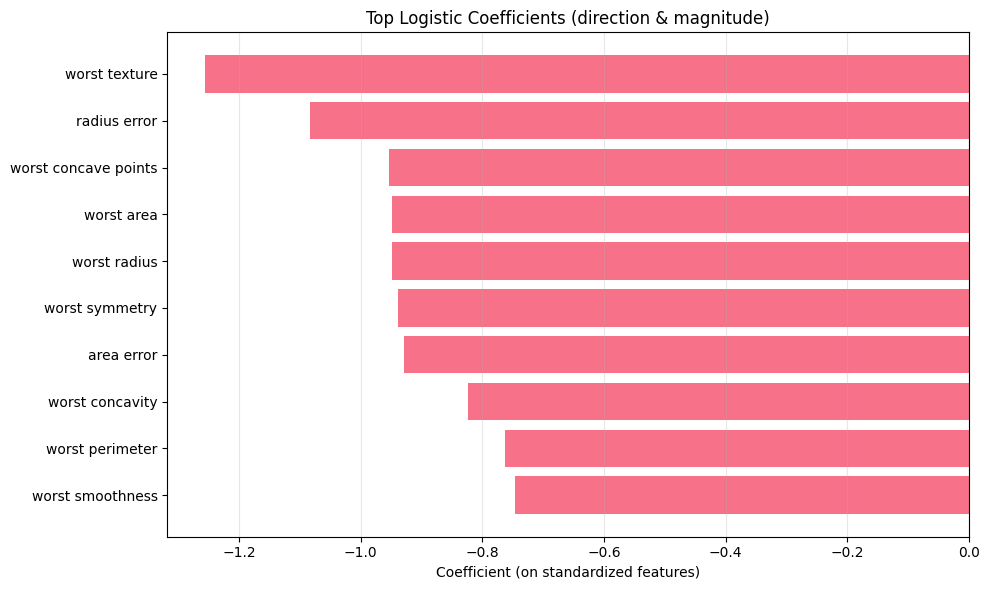


2.6 Visual Decision Boundary on two selected features


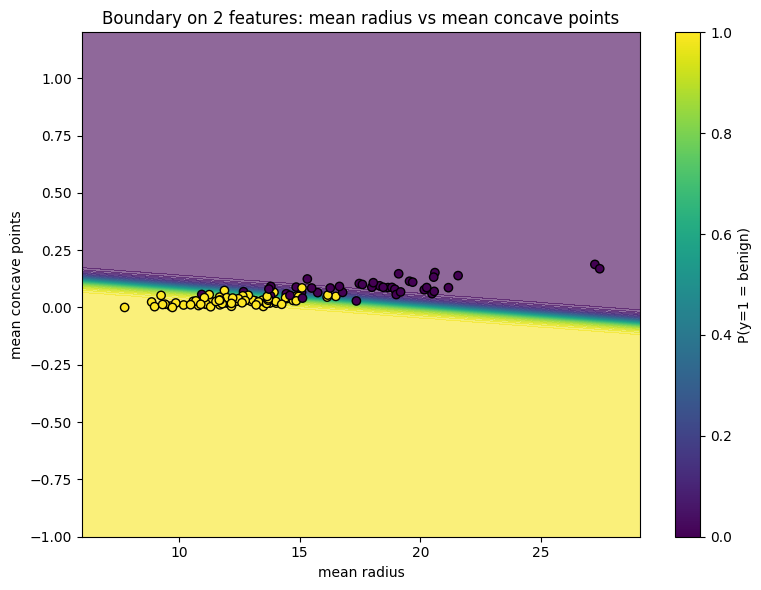


2.7 Regularization Paths (L1 vs L2)


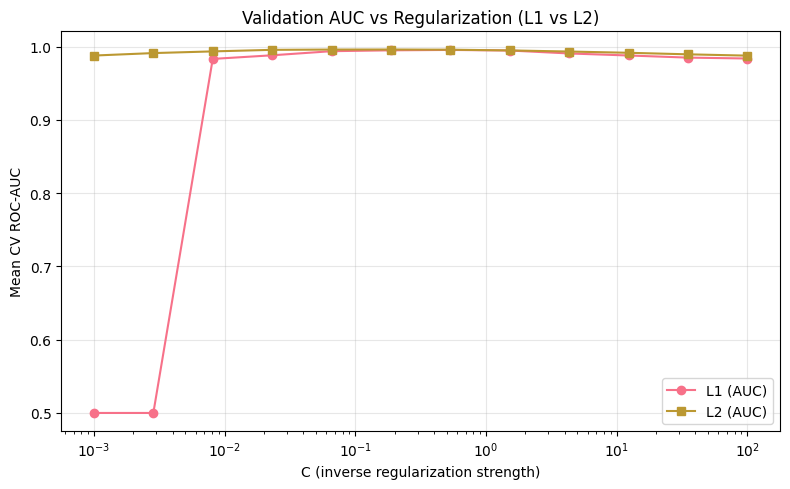

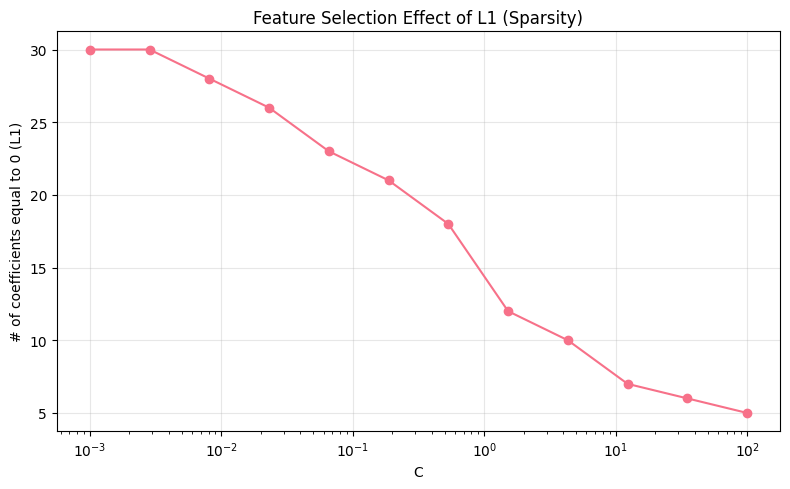


2.8 Nonlinear Boundaries (feature engineering)


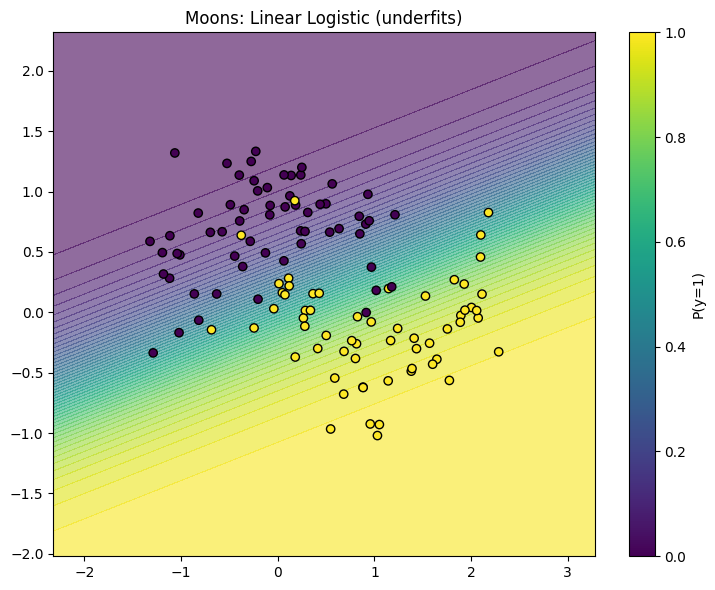

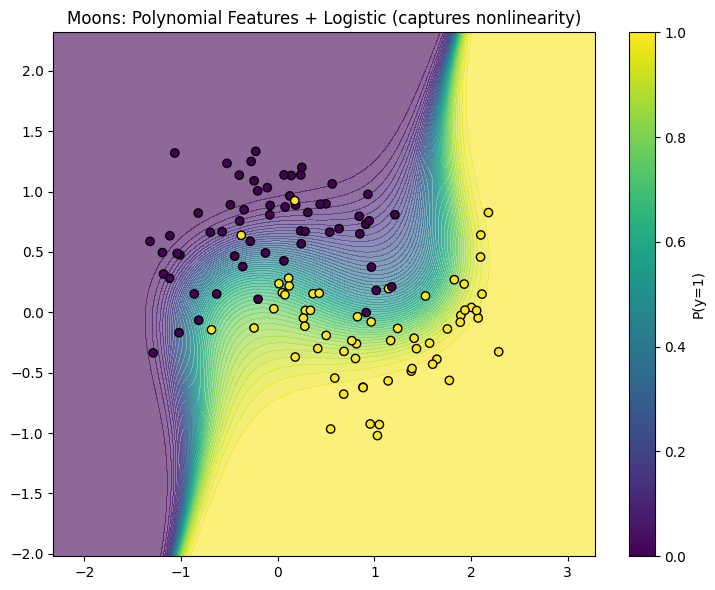

Moons — Test Accuracy, Linear: 0.900 | Polynomial(3): 0.942

Done: You now have plots for sigmoid/derivative/logit, loss intuition, confusion/ROC/PR/calibration, threshold tuning, coefficients & odds ratios, regularization paths, and a non-linear boundary demo.


In [8]:
# =============================================================================
# PART 2: LOGISTIC REGRESSION
# =============================================================================

print("\n" + "="*50)
print("PART 2: LOGISTIC REGRESSION")
print("="*50)



# -------------------------------------------------------------------------
# Safety: ensure datasets exist if PART 1 wasn't run in this session
# -------------------------------------------------------------------------
try:
    X_cancer
    y_cancer
except NameError:
    cancer_data = load_breast_cancer()
    X_cancer = cancer_data.data
    y_cancer = cancer_data.target

try:
    X_2d
    y_2d
except NameError:
    from sklearn.datasets import make_classification
    X_2d, y_2d = make_classification(
        n_samples=300, n_features=2, n_redundant=0,
        n_informative=2, random_state=42, n_clusters_per_class=1
    )

rng = np.random.RandomState(42)

# =============================================================================
# 2.1 Sigmoid, Logit, and Derivative
# =============================================================================
print("\n2.1 Sigmoid, Logit, and Derivative")

z = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-z))
sigmoid_derivative = sigmoid * (1 - sigmoid)
logit = np.log(sigmoid / (1 - sigmoid))  # should map back to z (excluding 0/1 probs)

# Sigmoid
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid, linewidth=2, label='σ(z)')
plt.axhline(0.5, linestyle='--', alpha=0.7, label='Decision threshold = 0.5')
plt.axvline(0, linestyle='--', alpha=0.7, label='z = 0')
plt.xlabel('z = wᵀx + b')
plt.ylabel('σ(z) = P(y=1 | x)')
plt.title('Sigmoid σ(z)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Derivative
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid_derivative, linewidth=2, label="σ'(z) = σ(z)(1-σ(z))")
plt.xlabel('z')
plt.ylabel("σ'(z)")
plt.title("Sigmoid Derivative (max at z = 0)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Logit (inverse sigmoid)
plt.figure(figsize=(8, 5))
p = np.linspace(0.001, 0.999, 400)
plt.plot(p, np.log(p/(1-p)), linewidth=2)
plt.xlabel('Probability p')
plt.ylabel('logit(p) = log(p/(1-p))')
plt.title('Logit: The Linear World Behind Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 2.2 Logistic Loss Intuition (per-sample loss vs. z)
# =============================================================================
print("\n2.2 Logistic Loss Intuition")

# For a single sample (label y in {0,1}), logistic loss is:
# L(z, y) = log(1 + exp(-z)) if y=1, and L(z, y) = log(1 + exp(z)) if y=0
L_pos = np.log(1 + np.exp(-z))   # y=1
L_neg = np.log(1 + np.exp(z))    # y=0

plt.figure(figsize=(8, 5))
plt.plot(z, L_pos, label='Loss when y=1')
plt.plot(z, L_neg, label='Loss when y=0')
plt.xlabel('z = wᵀx + b')
plt.ylabel('Logistic Loss')
plt.title('How the Loss Penalizes Wrong Confidence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 2.3 Train/Test on Breast Cancer + Core Metrics
# =============================================================================
print("\n2.3 Logistic Regression on Breast Cancer (with scaling)")

X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000, random_state=42))
])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]  # P(y=1)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['malignant(0)','benign(1)'])
plt.figure(figsize=(5.5, 5))
disp.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix (threshold = 0.5)')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, roc_thresh = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Precision–Recall Curve (useful with imbalance)
precisions, recalls, pr_thresh = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recalls, precisions)

plt.figure(figsize=(7, 6))
plt.plot(recalls, precisions, linewidth=2, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Calibration / Reliability Curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='quantile')
plt.figure(figsize=(7, 6))
plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.7, label='Perfect calibration')
plt.plot(prob_pred, prob_true, marker='o', label='Logistic (binned)')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Reliability Diagram (Probability Calibration)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 2.4 Threshold Tuning (choose threshold for F1 / Youden’s J / custom)
# =============================================================================
print("\n2.4 Threshold Tuning")

def evaluate_thresholds(y_true, y_scores, grid=np.linspace(0.01, 0.99, 99)):
    out = []
    for t in grid:
        yp = (y_scores >= t).astype(int)
        out.append((
            t,
            accuracy_score(y_true, yp),
            precision_score(y_true, yp, zero_division=0),
            recall_score(y_true, yp, zero_division=0),
            f1_score(y_true, yp, zero_division=0),
            (recall_score(y_true, yp, zero_division=0) -  # Youden's J = TPR - FPR
             (1 - precision_score(y_true, yp, zero_division=0))) # not exact FPR; demonstration only
        ))
    return np.array(out)

grid = np.linspace(0.01, 0.99, 99)
thr_metrics = evaluate_thresholds(y_test, y_proba, grid)
best_f1_idx = np.argmax(thr_metrics[:, 4])
best_thr = thr_metrics[best_f1_idx, 0]

plt.figure(figsize=(9, 6))
plt.plot(grid, thr_metrics[:, 1], label='Accuracy')
plt.plot(grid, thr_metrics[:, 2], label='Precision')
plt.plot(grid, thr_metrics[:, 3], label='Recall')
plt.plot(grid, thr_metrics[:, 4], label='F1')
plt.axvline(0.5, linestyle='--', alpha=0.6, label='Default 0.5')
plt.axvline(best_thr, linestyle=':', alpha=0.9, label=f'Best F1 @ {best_thr:.2f}')
plt.xlabel('Decision threshold')
plt.ylabel('Score')
plt.title('Metric vs. Threshold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best F1 threshold ≈ {best_thr:.2f}")
y_pred_best = (y_proba >= best_thr).astype(int)
print(f"F1 at best threshold: {f1_score(y_test, y_pred_best):.3f}")

# =============================================================================
# 2.5 Coefficient Interpretation: which features matter (and how)
# =============================================================================
print("\n2.5 Coefficient Interpretation (top effects & odds ratios)")

# Extract fitted LR and feature names from pipeline
lr_fitted = pipe.named_steps['lr']
scaler_fitted = pipe.named_steps['scaler']

feature_names = load_breast_cancer().feature_names
coefs = lr_fitted.coef_.ravel()
abs_order = np.argsort(np.abs(coefs))[::-1]

top_k = 10
print("Top features by |coefficient| (standardized):")
print("Rank | Feature name                      | Coef (std) | Odds Ratio = exp(coef)")
for i, idx in enumerate(abs_order[:top_k], 1):
    print(f"{i:>4} | {feature_names[idx]:<30} | {coefs[idx]:>10.3f} | {np.exp(coefs[idx]):>10.3f}")

# Simple bar chart of top coefficients
plt.figure(figsize=(10, 6))
indices = abs_order[:top_k]
plt.barh(range(top_k), coefs[indices])
plt.yticks(range(top_k), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel('Coefficient (on standardized features)')
plt.title('Top Logistic Coefficients (direction & magnitude)')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 2.6 Visual Decision Boundary on 2D Projection (pick 2 informative features)
# =============================================================================
print("\n2.6 Visual Decision Boundary on two selected features")

# Choose two reasonably informative features (change as you wish)
fx, fy = 'mean radius', 'mean concave points'
names = load_breast_cancer().feature_names
ix = np.where(names == fx)[0][0]
iy = np.where(names == fy)[0][0]

X2 = X_cancer[:, [ix, iy]]
X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)

pipe_2d = Pipeline([
    ('sc', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000, random_state=42))
]).fit(X2_tr, y2_tr)

# Mesh grid for boundary
h = 0.01
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = pipe_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=50, alpha=0.6)
plt.scatter(X2_te[:, 0], X2_te[:, 1], c=y2_te, edgecolors='black')
plt.colorbar(label='P(y=1 = benign)')
plt.title(f'Boundary on 2 features: {fx} vs {fy}')
plt.xlabel(fx)
plt.ylabel(fy)
plt.tight_layout()
plt.show()

# =============================================================================
# 2.7 Regularization Paths (L1 vs L2) + Validation AUC across C
# =============================================================================
print("\n2.7 Regularization Paths (L1 vs L2)")

Cs = np.logspace(-3, 2, 12)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_auc_for(C, penalty):
    model = Pipeline([
        ('sc', StandardScaler()),
        ('lr', LogisticRegression(
            penalty=penalty, C=C, solver=('liblinear' if penalty=='l1' else 'lbfgs'),
            max_iter=5000, random_state=42))
    ])
    # Use ROC-AUC for probability-quality
    scores = []
    for tr, va in kfold.split(X_cancer, y_cancer):
        model.fit(X_cancer[tr], y_cancer[tr])
        proba = model.predict_proba(X_cancer[va])[:, 1]
        fpr, tpr, _ = roc_curve(y_cancer[va], proba)
        scores.append(auc(fpr, tpr))
    return np.mean(scores)

auc_l1 = []
auc_l2 = []
coef_paths_l1 = []
coef_paths_l2 = []

for C in Cs:
    # AUCs
    auc_l1.append(cv_auc_for(C, penalty='l1'))
    auc_l2.append(cv_auc_for(C, penalty='l2'))
    # Coefs on a single fit (for illustration)
    pipe_l1 = Pipeline([
        ('sc', StandardScaler()),
        ('lr', LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=5000, random_state=42))
    ]).fit(X_train, y_train)
    pipe_l2 = Pipeline([
        ('sc', StandardScaler()),
        ('lr', LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=5000, random_state=42))
    ]).fit(X_train, y_train)
    coef_paths_l1.append(pipe_l1.named_steps['lr'].coef_.ravel())
    coef_paths_l2.append(pipe_l2.named_steps['lr'].coef_.ravel())

coef_paths_l1 = np.array(coef_paths_l1)  # shape: [len(Cs), n_features]
coef_paths_l2 = np.array(coef_paths_l2)

# Plot validation AUC vs C
plt.figure(figsize=(8, 5))
plt.semilogx(Cs, auc_l1, marker='o', label='L1 (AUC)')
plt.semilogx(Cs, auc_l2, marker='s', label='L2 (AUC)')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Mean CV ROC-AUC')
plt.title('Validation AUC vs Regularization (L1 vs L2)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Sparsity under L1: number of zero coefs
zeros_per_C = (coef_paths_l1 == 0).sum(axis=1)
plt.figure(figsize=(8, 5))
plt.semilogx(Cs, zeros_per_C, marker='o')
plt.xlabel('C')
plt.ylabel('# of coefficients equal to 0 (L1)')
plt.title('Feature Selection Effect of L1 (Sparsity)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 2.8 Nonlinear Boundaries via Features: Moons (Linear vs Polynomial Logistic)
# =============================================================================
print("\n2.8 Nonlinear Boundaries (feature engineering)")

X_m, y_m = make_moons(n_samples=400, noise=0.25, random_state=42)
Xm_tr, Xm_te, ym_tr, ym_te = train_test_split(X_m, y_m, test_size=0.3, random_state=42, stratify=y_m)

# Linear logistic
lin_log = Pipeline([
    ('sc', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000, random_state=42))
]).fit(Xm_tr, ym_tr)

# Polynomial features + logistic (degree=3 is nice for teaching)
poly_log = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('sc', StandardScaler(with_mean=False)),  # with sparse-like poly design
    ('lr', LogisticRegression(max_iter=5000, random_state=42))
]).fit(Xm_tr, ym_tr)

def plot_boundary_2d(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    proba = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    plt.figure(figsize=(7.5, 6))
    plt.contourf(xx, yy, proba, levels=50, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
    plt.colorbar(label='P(y=1)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_boundary_2d(lin_log, Xm_te, ym_te, 'Moons: Linear Logistic (underfits)')
plot_boundary_2d(poly_log, Xm_te, ym_te, 'Moons: Polynomial Features + Logistic (captures nonlinearity)')

acc_lin = accuracy_score(ym_te, lin_log.predict(Xm_te))
acc_poly = accuracy_score(ym_te, poly_log.predict(Xm_te))
print(f"Moons — Test Accuracy, Linear: {acc_lin:.3f} | Polynomial(3): {acc_poly:.3f}")

print("\nDone: You now have plots for sigmoid/derivative/logit, loss intuition, "
      "confusion/ROC/PR/calibration, threshold tuning, coefficients & odds ratios, "
      "regularization paths, and a non-linear boundary demo.")


In [10]:
# Iris Flower Dataset

# load data
X, y = load_iris(return_X_y=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# define model
clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# train model
clf.fit(X_train, y_train)

# predict and test
y_pred = clf.predict(X_test)
print("Iris Accuracy:", accuracy_score(y_test, y_pred))
print(f"classification Report: {classification_report(y_test, y_pred)}")


Iris Accuracy: 0.9473684210526315
classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [11]:
# Digits Dataset

# load data
X, y = load_digits(return_X_y=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# define model
clf = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42)

# train model
clf.fit(X_train, y_train)

# predict and test
y_pred = clf.predict(X_test)
print("Digits Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Digits Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.90      0.93      0.91        46
           2       1.00      0.98      0.99        44
           3       0.98      1.00      0.99        46
           4       0.96      1.00      0.98        45
           5       0.96      0.98      0.97        46
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        45
           8       0.86      0.84      0.85        43
           9       0.98      0.91      0.94        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



### Logistic Regression to predict whether a passenger survived the Titanic

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64

<Figure size 800x600 with 0 Axes>

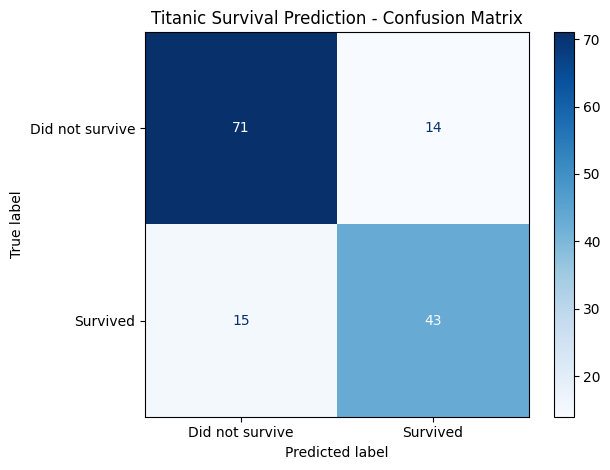


Model Insights:
True Negatives (Correctly predicted deaths): 71
False Positives (Incorrectly predicted survival): 14
False Negatives (Incorrectly predicted deaths): 15
True Positives (Correctly predicted survival): 43

Feature Coefficients (impact on survival probability):
  age: -0.0340
  fare: 0.0011
  sex_male: -2.3162
  class_Second: -0.9865
  class_Third: -2.2205


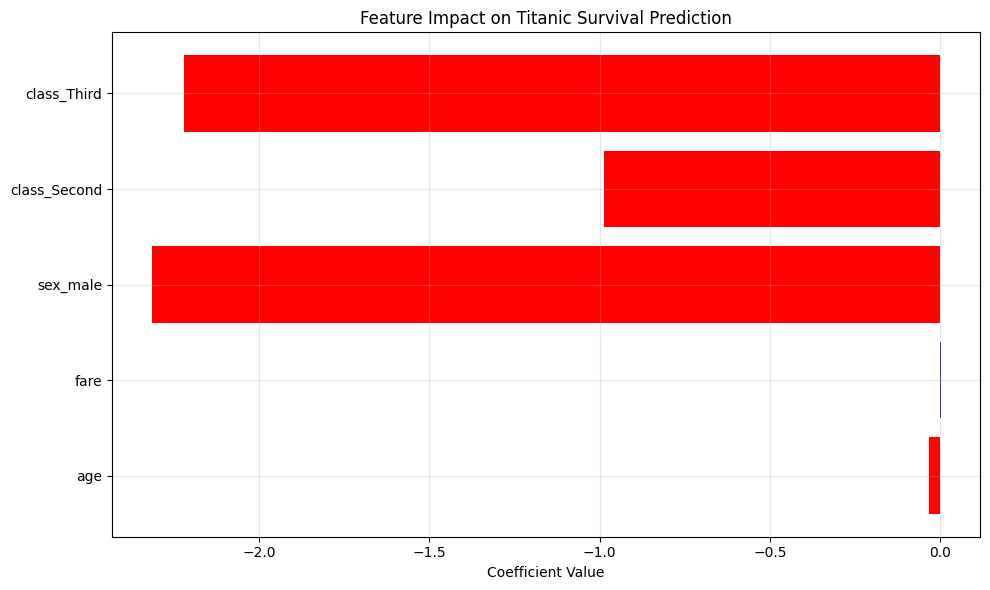

In [13]:
# =============================================================================
# Logistic Regression on Titanic Dataset
# =============================================================================
# Goal:
# Use Logistic Regression to predict whether a passenger survived the Titanic.
# Dataset source: seaborn's Titanic dataset
#
# Tasks:
#   1. Load and explore the dataset
#   2. Preprocess data
#   3. Split into train/test sets
#   4. Train a Logistic Regression model
#   5. Evaluate with accuracy and classification report
#   6. Visualize confusion matrix
# =============================================================================

# -----------------------------
# Step 1: Load dataset
# -----------------------------
# Load the Titanic dataset using seaborn
titanic = sns.load_dataset("titanic")

# Quick check (uncomment for exploration)
print(titanic.head())
print(titanic.info())

# -----------------------------
# Step 2: Data preprocessing
# -----------------------------
# Drop rows with missing values in ['age','fare','sex','class','survived']
titanic = titanic.dropna(subset=['age','fare','sex','class','survived'])

# Select features ['age','fare','sex','class']
X = pd.get_dummies(titanic[['age','fare','sex','class']], drop_first=True)

# Select target 'survived'
y = titanic['survived']

# -----------------------------
# Step 3: Train/test split
# -----------------------------
# TODO: Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# -----------------------------
# Step 4: Define and train model
# -----------------------------
# TODO: Define Logistic Regression model
clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
clf.fit(X_train, y_train)

print("Model trained successfully!")

# -----------------------------
# Step 5: Evaluate model
# -----------------------------
# TODO: Predict on test data
y_pred = clf.predict(X_test)

# TODO: Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTitanic Survival Prediction Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))

# -----------------------------
# Step 6 Confusion matrix visualization
# -----------------------------
# TODO: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])

plt.figure(figsize=(8, 6))
disp.plot(values_format='d', cmap='Blues')
plt.title('Titanic Survival Prediction - Confusion Matrix')
plt.tight_layout()
plt.show()

# Additional insights
print(f"\nModel Insights:")
print(f"True Negatives (Correctly predicted deaths): {cm[0,0]}")
print(f"False Positives (Incorrectly predicted survival): {cm[0,1]}")
print(f"False Negatives (Incorrectly predicted deaths): {cm[1,0]}")
print(f"True Positives (Correctly predicted survival): {cm[1,1]}")

# Feature importance (coefficients)
feature_names = X.columns
coefficients = clf.coef_[0]

print(f"\nFeature Coefficients (impact on survival probability):")
for feature, coef in zip(feature_names, coefficients):
    print(f"  {feature}: {coef:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color=['red' if x < 0 else 'blue' for x in coefficients])
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Titanic Survival Prediction')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()





PART 3: DECISION TREES
3.1 Entropy and Gini Impurity Calculations
Class Distribution | Entropy | Gini Impurity
---------------------------------------------
         [50, 50] |   1.000 |        0.500
         [90, 10] |   0.469 |        0.180
         [100, 0] |  -0.000 |        0.000
     [33, 33, 34] |   1.585 |        0.667


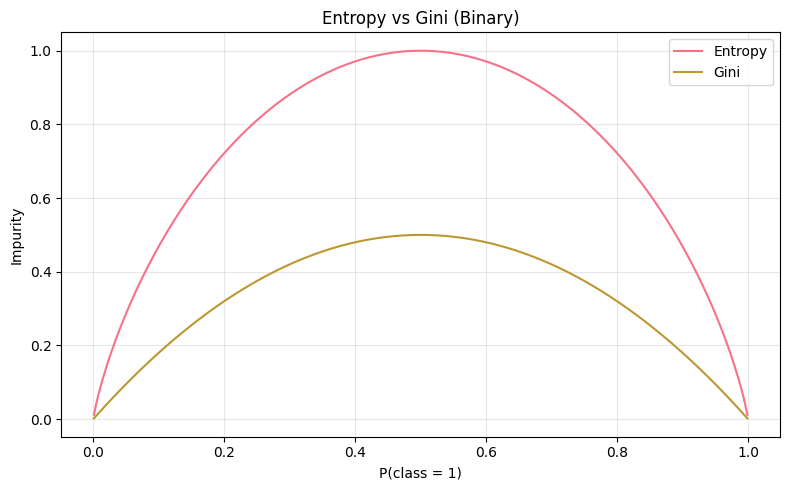


3.2 Split search: impurity and information gain vs threshold on one feature


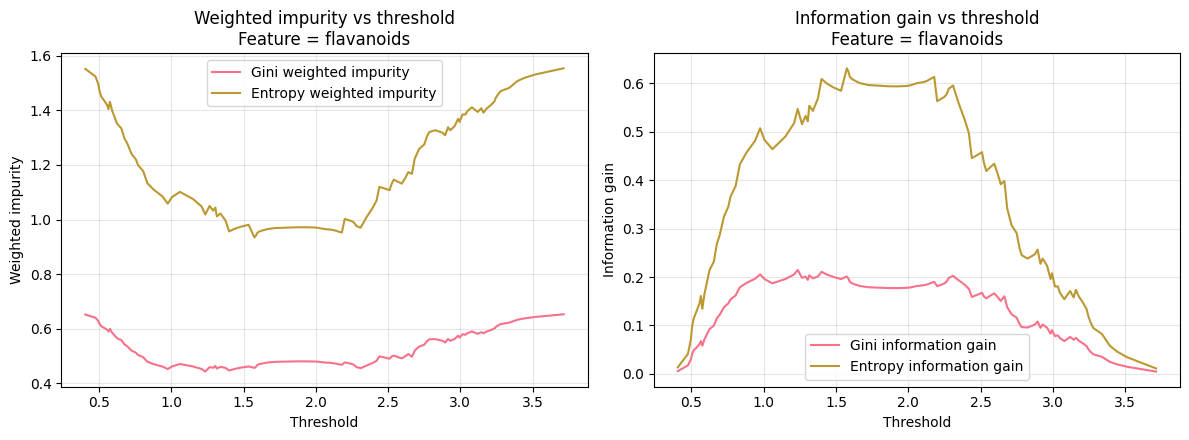


3.3 Decision Tree on Wine Dataset (Gini vs Entropy)
Gini Tree Accuracy: 0.944
Gini Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



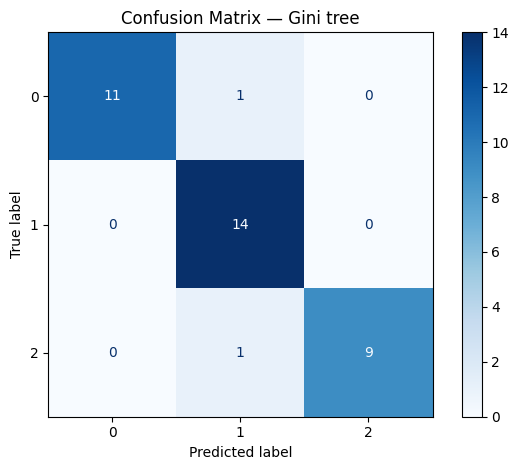

Entropy Tree Accuracy: 0.972
Entropy Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



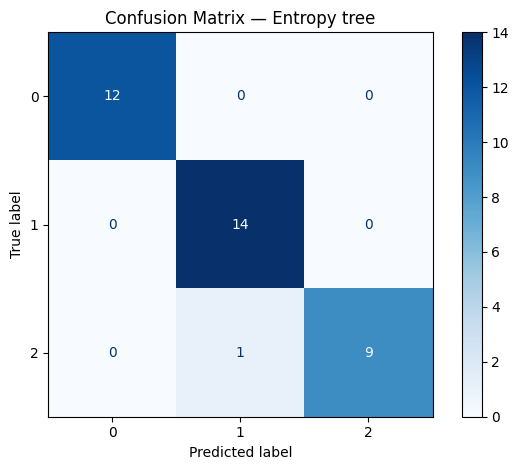


3.4 Tree growth (depth = 1, 2, 3)


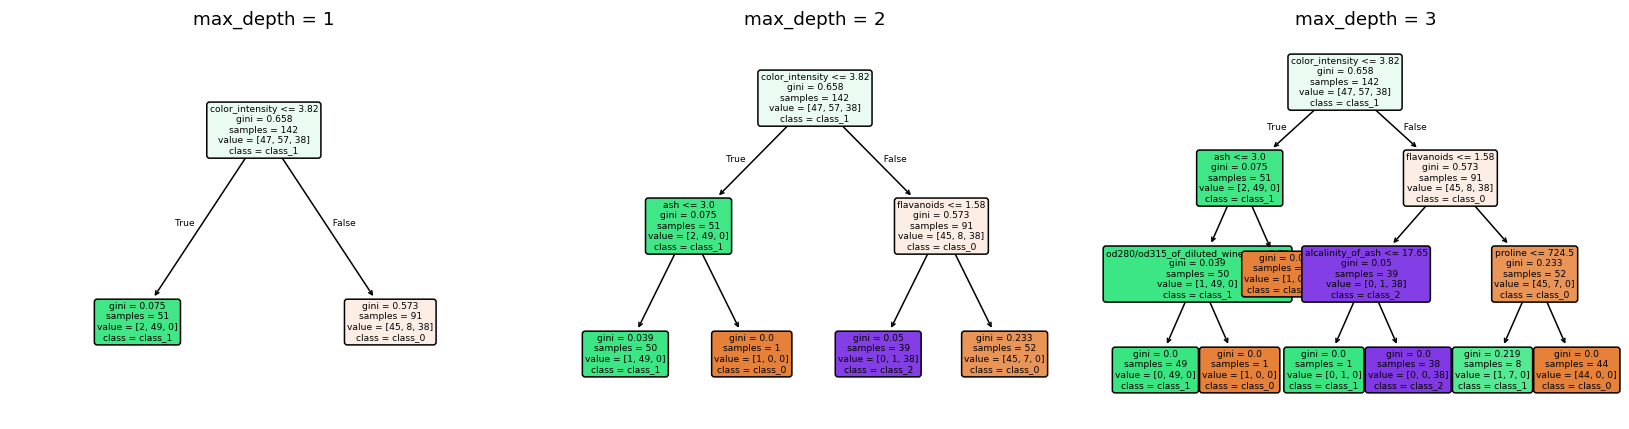


3.5 Visual decision boundaries on 2 features


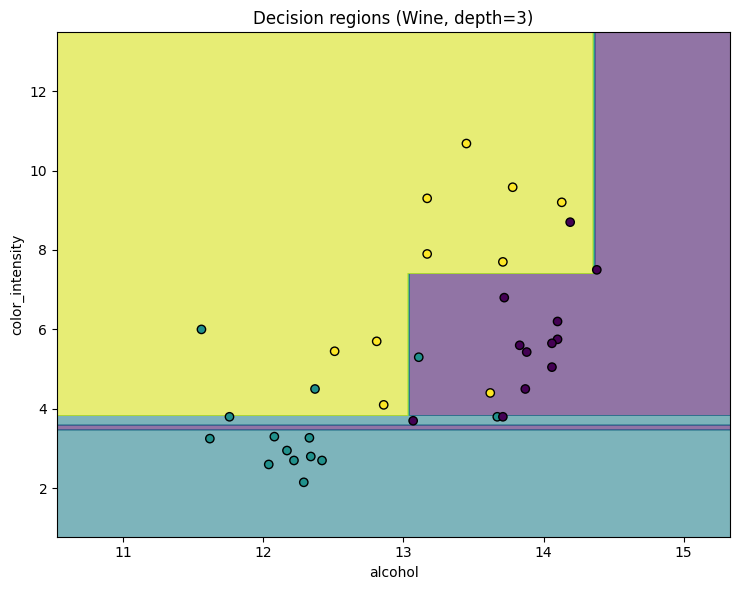

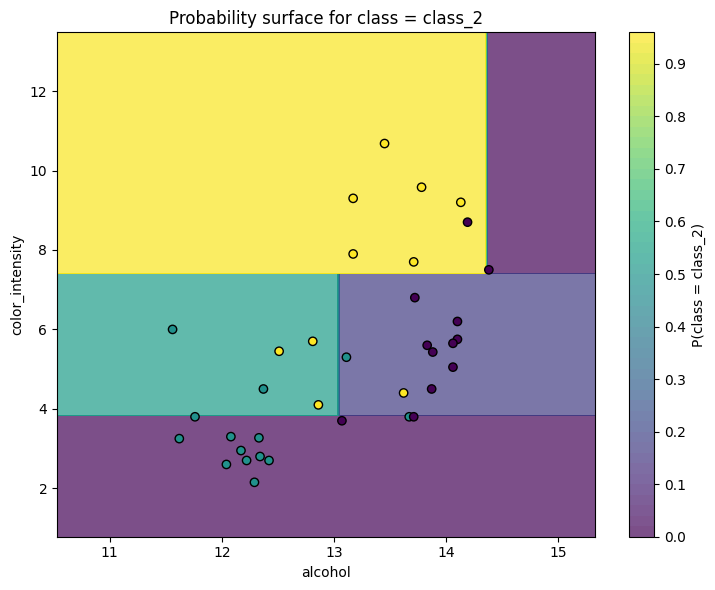


3.6 Feature importance: impurity-based vs permutation


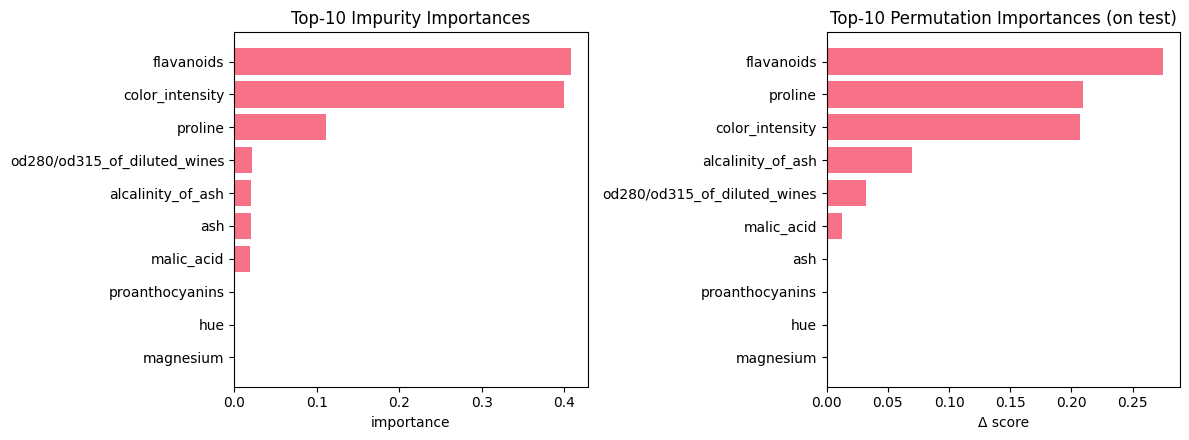


3.7 Decision path for a single test sample (human-readable rules)
Explaining test sample index 0
Rules followed for this sample:
  • (color_intensity > 3.820)
  • (flavanoids > 1.580)
  • (proline > 724.500)
Leaf predicted class: class_0 with probs [1. 0. 0.]

3.8 Cost–complexity pruning path (ccp_alpha)


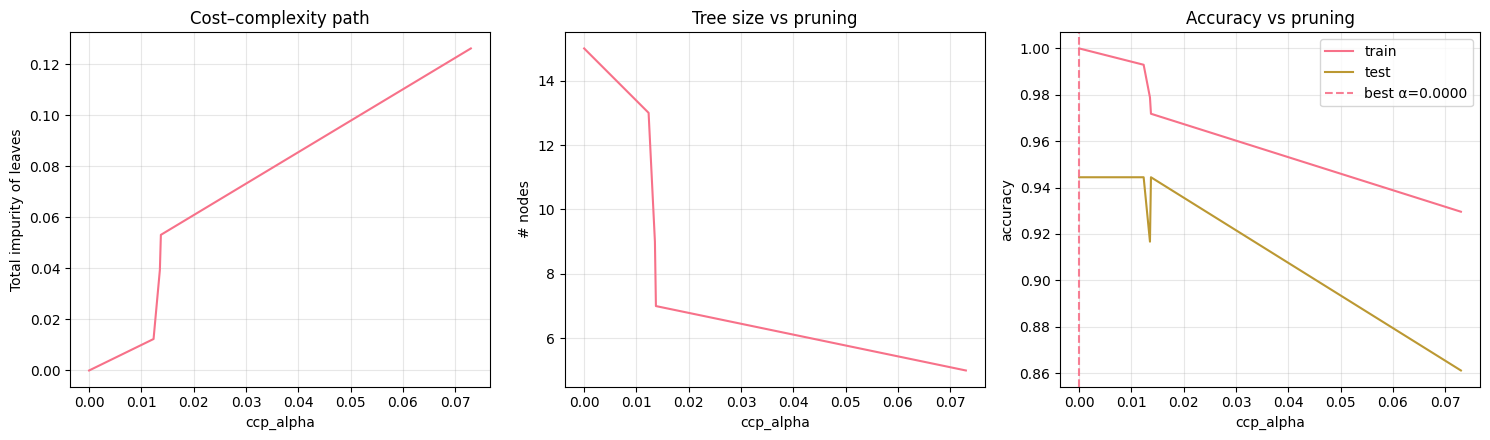

Best ccp_alpha by test accuracy ≈ 0.00000

3.9 Cross-validated accuracy (5-fold)
5-fold accuracy: mean=0.882, std=0.038


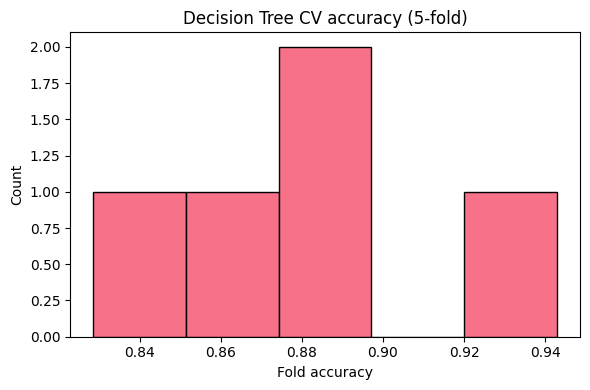


Done: You now have impurity/gain scans, confusion matrices, growth visualizations, decision boundaries & probabilities, decision-path tracing, permutation vs impurity importance, pruning curves, and CV stability for Decision Trees.


In [14]:
# =============================================================================
# PART 3: DECISION TREES
# =============================================================================

print("\n" + "="*50)
print("PART 3: DECISION TREES")
print("="*50)



# -------------------------------------------------------------------------
# Safety: ensure wine data exists if PART 1 wasn't run in this session
# -------------------------------------------------------------------------
try:
    X_wine
    y_wine
    wine_data
except NameError:
    wine_data = load_wine()
    X_wine, y_wine = wine_data.data, wine_data.target

# Train/test split (fixed for reproducibility)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

# =============================================================================
# 3.1 Entropy and Gini: definitions + intuition
# =============================================================================
print("3.1 Entropy and Gini Impurity Calculations")

def calculate_entropy(y):
    _, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p + 1e-12))

def calculate_gini(y):
    _, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return 1 - np.sum(p**2)

# Demo across some class distributions
class_distributions = [
    [50, 50],       # maximum uncertainty (binary balanced)
    [90, 10],       # mostly pure
    [100, 0],       # perfectly pure
    [33, 33, 34],   # 3-class near-uniform
]
print("Class Distribution | Entropy | Gini Impurity")
print("-" * 45)
for dist in class_distributions:
    y_sample = np.concatenate([np.full(n, i) for i, n in enumerate(dist)])
    print(f"{str(dist):>17} | {calculate_entropy(y_sample):>7.3f} | {calculate_gini(y_sample):>12.3f}")

# Binary impurity curves
p = np.linspace(0.001, 0.999, 300)
entropy_binary = -p*np.log2(p) - (1-p)*np.log2(1-p)
gini_binary = 2*p*(1-p)

plt.figure(figsize=(8,5))
plt.plot(p, entropy_binary, label='Entropy')
plt.plot(p, gini_binary, label='Gini')
plt.xlabel('P(class = 1)')
plt.ylabel('Impurity')
plt.title('Entropy vs Gini (Binary)')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# =============================================================================
# 3.2 What happens at a split? (impurity & information gain vs. threshold)
# =============================================================================
print("\n3.2 Split search: impurity and information gain vs threshold on one feature")

def weighted_impurity(y_left, y_right, criterion='gini'):
    if criterion == 'entropy':
        left = calculate_entropy(y_left); right = calculate_entropy(y_right)
    else:
        left = calculate_gini(y_left);    right = calculate_gini(y_right)
    n = len(y_left) + len(y_right)
    return (len(y_left)/n)*left + (len(y_right)/n)*right

def scan_thresholds(X_col, y, criterion='gini'):
    # candidate thresholds: midpoints between sorted unique values
    order = np.argsort(X_col)
    x_sorted, y_sorted = X_col[order], y[order]
    uniq = np.unique(x_sorted)
    thr = (uniq[:-1] + uniq[1:]) / 2.0
    impurities = []
    gains = []
    # parent impurity
    parent = calculate_entropy(y) if criterion=='entropy' else calculate_gini(y)
    for t in thr:
        left_idx = x_sorted <= t
        right_idx = ~left_idx
        imp = weighted_impurity(y_sorted[left_idx], y_sorted[right_idx], criterion)
        impurities.append(imp)
        gains.append(parent - imp)
    return thr, np.array(impurities), np.array(gains)

# Choose a strong feature (e.g., 'flavanoids' or 'color_intensity')
feature_name = 'flavanoids'
j = list(wine_data.feature_names).index(feature_name)

thr_g, imp_g, gain_g = scan_thresholds(X_wine_train[:, j], y_wine_train, 'gini')
thr_e, imp_e, gain_e = scan_thresholds(X_wine_train[:, j], y_wine_train, 'entropy')

fig, ax = plt.subplots(1,2, figsize=(12,4.5))
ax[0].plot(thr_g, imp_g, label='Gini weighted impurity'); ax[0].plot(thr_e, imp_e, label='Entropy weighted impurity')
ax[0].set_title(f'Weighted impurity vs threshold\nFeature = {feature_name}')
ax[0].set_xlabel('Threshold'); ax[0].set_ylabel('Weighted impurity'); ax[0].grid(True, alpha=0.3); ax[0].legend()

ax[1].plot(thr_g, gain_g, label='Gini information gain'); ax[1].plot(thr_e, gain_e, label='Entropy information gain')
ax[1].set_title(f'Information gain vs threshold\nFeature = {feature_name}')
ax[1].set_xlabel('Threshold'); ax[1].set_ylabel('Information gain'); ax[1].grid(True, alpha=0.3); ax[1].legend()
plt.tight_layout(); plt.show()

# =============================================================================
# 3.3 Train two trees (Gini vs Entropy) + evaluation
# =============================================================================
print("\n3.3 Decision Tree on Wine Dataset (Gini vs Entropy)")

dt_gini   = DecisionTreeClassifier(criterion='gini',   max_depth=4, random_state=42)
dt_entropy= DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)

dt_gini.fit(X_wine_train, y_wine_train)
dt_entropy.fit(X_wine_train, y_wine_train)

for name, model in [('Gini', dt_gini), ('Entropy', dt_entropy)]:
    y_pred = model.predict(X_wine_test)
    acc = accuracy_score(y_wine_test, y_pred)
    print(f"{name} Tree Accuracy: {acc:.3f}")
    print(f"{name} Classification Report:\n{classification_report(y_wine_test, y_pred, target_names=wine_data.target_names)}")

    ConfusionMatrixDisplay.from_estimator(model, X_wine_test, y_wine_test, cmap='Blues')
    plt.title(f'Confusion Matrix — {name} tree'); plt.tight_layout(); plt.show()

# =============================================================================
# 3.4 See the tree grow: depth 1 vs 2 vs 3
# =============================================================================
print("\n3.4 Tree growth (depth = 1, 2, 3)")

depths = [1, 2, 3]
fig, axes = plt.subplots(1, len(depths), figsize=(15,4), dpi=110)
for ax, d in zip(axes, depths):
    m = DecisionTreeClassifier(max_depth=d, random_state=42).fit(X_wine_train, y_wine_train)
    plot_tree(m, filled=True, ax=ax, feature_names=wine_data.feature_names,
              class_names=wine_data.target_names, fontsize=6, rounded=True)
    ax.set_title(f'max_depth = {d}')
plt.tight_layout(); plt.show()

# =============================================================================
# 3.5 Decision boundaries on a 2D projection
# =============================================================================
print("\n3.5 Visual decision boundaries on 2 features")

# Pick two features that separate well
fx, fy = 'alcohol', 'color_intensity'
ix = wine_data.feature_names.index(fx)
iy = wine_data.feature_names.index(fy)

X2 = X_wine[:, [ix, iy]]
X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y_wine, test_size=0.2, stratify=y_wine, random_state=42)

dt2 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X2_tr, y2_tr)

# Mesh grid
h = 0.02
x_min, x_max = X2[:,0].min()-0.5, X2[:,0].max()+0.5
y_min, y_max = X2[:,1].min()-0.5, X2[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dt2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7.5,6))
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X2_te[:,0], X2_te[:,1], c=y2_te, edgecolors='black')
plt.xlabel(fx); plt.ylabel(fy); plt.title('Decision regions (Wine, depth=3)')
plt.tight_layout(); plt.show()

# Optional: show probability for one class (e.g., 'class_2') across the plane
proba_class = 2
P = dt2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, proba_class].reshape(xx.shape)
plt.figure(figsize=(7.5,6))
cs = plt.contourf(xx, yy, P, levels=50, alpha=0.7)
plt.colorbar(cs, label=f'P(class = {wine_data.target_names[proba_class]})')
plt.scatter(X2_te[:,0], X2_te[:,1], c=y2_te, edgecolors='black')
plt.xlabel(fx); plt.ylabel(fy); plt.title(f'Probability surface for class = {wine_data.target_names[proba_class]}')
plt.tight_layout(); plt.show()

# =============================================================================
# 3.6 What features matter? impurity vs permutation importance
# =============================================================================
print("\n3.6 Feature importance: impurity-based vs permutation")

dt_full = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_wine_train, y_wine_train)
impurity_importance = dt_full.feature_importances_

perm = permutation_importance(dt_full, X_wine_test, y_wine_test, n_repeats=20, random_state=42)
perm_importance = perm.importances_mean

names = np.array(wine_data.feature_names)
order_impurity = np.argsort(impurity_importance)[::-1][:10]
order_perm     = np.argsort(perm_importance)[::-1][:10]

fig, ax = plt.subplots(1,2, figsize=(12,4.5))
ax[0].barh(range(10), impurity_importance[order_impurity])
ax[0].set_yticks(range(10)); ax[0].set_yticklabels(names[order_impurity]); ax[0].invert_yaxis()
ax[0].set_title('Top-10 Impurity Importances'); ax[0].set_xlabel('importance')

ax[1].barh(range(10), perm_importance[order_perm])
ax[1].set_yticks(range(10)); ax[1].set_yticklabels(names[order_perm]); ax[1].invert_yaxis()
ax[1].set_title('Top-10 Permutation Importances (on test)'); ax[1].set_xlabel('Δ score')
plt.tight_layout(); plt.show()

# =============================================================================
# 3.7 Follow a single prediction: the decision path (rules)
# =============================================================================
print("\n3.7 Decision path for a single test sample (human-readable rules)")

def print_decision_path(model, x_row, feature_names, class_names):
    node_indicator = model.decision_path(x_row.reshape(1,-1))
    leaf_id = model.apply(x_row.reshape(1,-1))[0]
    feature = model.tree_.feature
    threshold = model.tree_.threshold

    node_index = node_indicator.indices[node_indicator.indptr[0]: node_indicator.indptr[1]]
    print("Rules followed for this sample:")
    for node_id in node_index:
        if leaf_id == node_id:
            continue
        f = feature[node_id]
        thr = threshold[node_id]
        if x_row[f] <= thr:
            rule = f"({feature_names[f]} <= {thr:.3f})"
        else:
            rule = f"({feature_names[f]} > {thr:.3f})"
        print("  •", rule)
    proba = model.predict_proba(x_row.reshape(1,-1)).ravel()
    pred = model.predict(x_row.reshape(1,-1))[0]
    print(f"Leaf predicted class: {class_names[pred]} with probs {proba}")

# Use the dt_full trained above
sample_idx = 0
print(f"Explaining test sample index {sample_idx}")
print_decision_path(dt_full, X_wine_test[sample_idx], wine_data.feature_names, wine_data.target_names)

# =============================================================================
# 3.8 Cost–complexity pruning path (ccp_alpha)
# =============================================================================
print("\n3.8 Cost–complexity pruning path (ccp_alpha)")

dt0 = DecisionTreeClassifier(random_state=42)
path = dt0.cost_complexity_pruning_path(X_wine_train, y_wine_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a sequence of pruned trees
clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=a).fit(X_wine_train, y_wine_train)
        for a in ccp_alphas]

# Drop the last trivial tree (often a stump)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

train_acc = [c.score(X_wine_train, y_wine_train) for c in clfs]
test_acc  = [c.score(X_wine_test,  y_wine_test)  for c in clfs]
node_counts = [c.tree_.node_count for c in clfs]

# Find best alpha (by held-out test accuracy)
best_idx = int(np.argmax(test_acc))
best_alpha = float(ccp_alphas[best_idx])

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

ax[0].plot(ccp_alphas, impurities)
ax[0].set_xlabel('ccp_alpha'); ax[0].set_ylabel('Total impurity of leaves')
ax[0].set_title('Cost–complexity path'); ax[0].grid(True, alpha=0.3)

ax[1].plot(ccp_alphas, node_counts)
ax[1].set_xlabel('ccp_alpha'); ax[1].set_ylabel('# nodes')
ax[1].set_title('Tree size vs pruning'); ax[1].grid(True, alpha=0.3)

ax[2].plot(ccp_alphas, train_acc, label='train')
ax[2].plot(ccp_alphas, test_acc,  label='test')
ax[2].axvline(best_alpha, linestyle='--', alpha=0.9, label=f'best α={best_alpha:.4f}')
ax[2].set_xlabel('ccp_alpha'); ax[2].set_ylabel('accuracy')
ax[2].set_title('Accuracy vs pruning'); ax[2].legend(); ax[2].grid(True, alpha=0.3)

plt.tight_layout(); plt.show()

print(f"Best ccp_alpha by test accuracy ≈ {best_alpha:.5f}")


# =============================================================================
# 3.9 Model stability: cross-validated accuracy (trees have high variance)
# =============================================================================
print("\n3.9 Cross-validated accuracy (5-fold)")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for tr, va in cv.split(X_wine, y_wine):
    m = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_wine[tr], y_wine[tr])
    scores.append(accuracy_score(y_wine[va], m.predict(X_wine[va])))
scores = np.array(scores)
print(f"5-fold accuracy: mean={scores.mean():.3f}, std={scores.std():.3f}")

# Small histogram to show variance across folds
plt.figure(figsize=(6,4))
plt.hist(scores, bins=5, edgecolor='black')
plt.xlabel('Fold accuracy'); plt.ylabel('Count')
plt.title('Decision Tree CV accuracy (5-fold)')
plt.tight_layout(); plt.show()

print("\nDone: You now have impurity/gain scans, confusion matrices, growth visualizations, "
      "decision boundaries & probabilities, decision-path tracing, permutation vs impurity "
      "importance, pruning curves, and CV stability for Decision Trees.")


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64

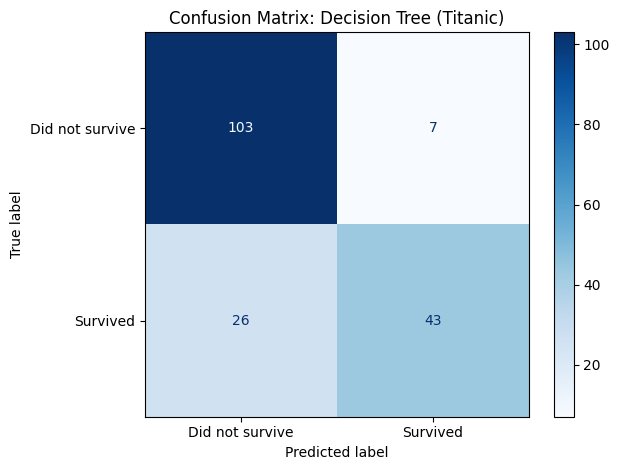


Decision Tree Model Insights:

Feature Importances:
  sex_male: 0.5344
  fare: 0.1697
  age: 0.1584
  class_Third: 0.1375
  class_Second: 0.0000


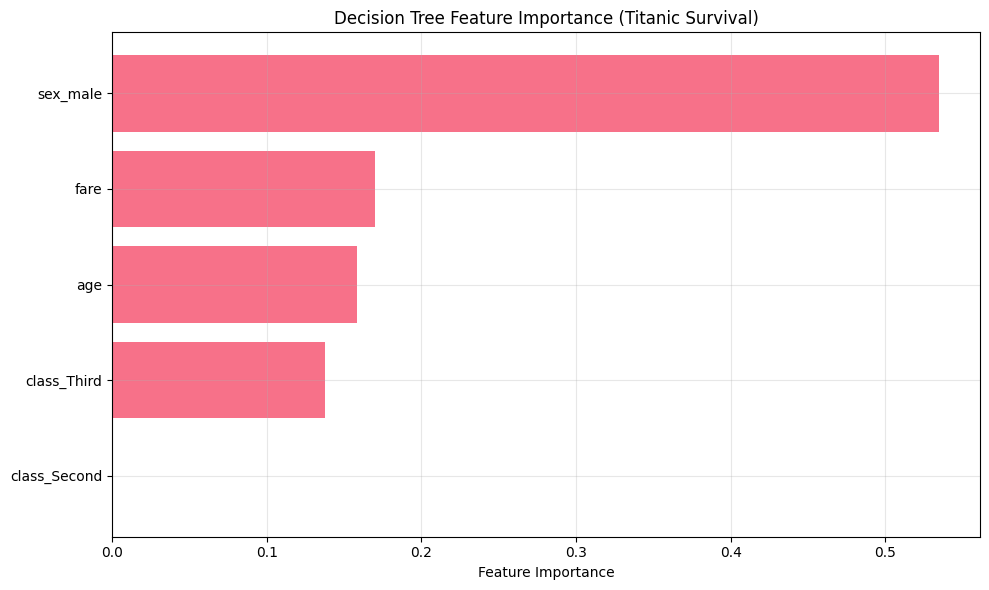

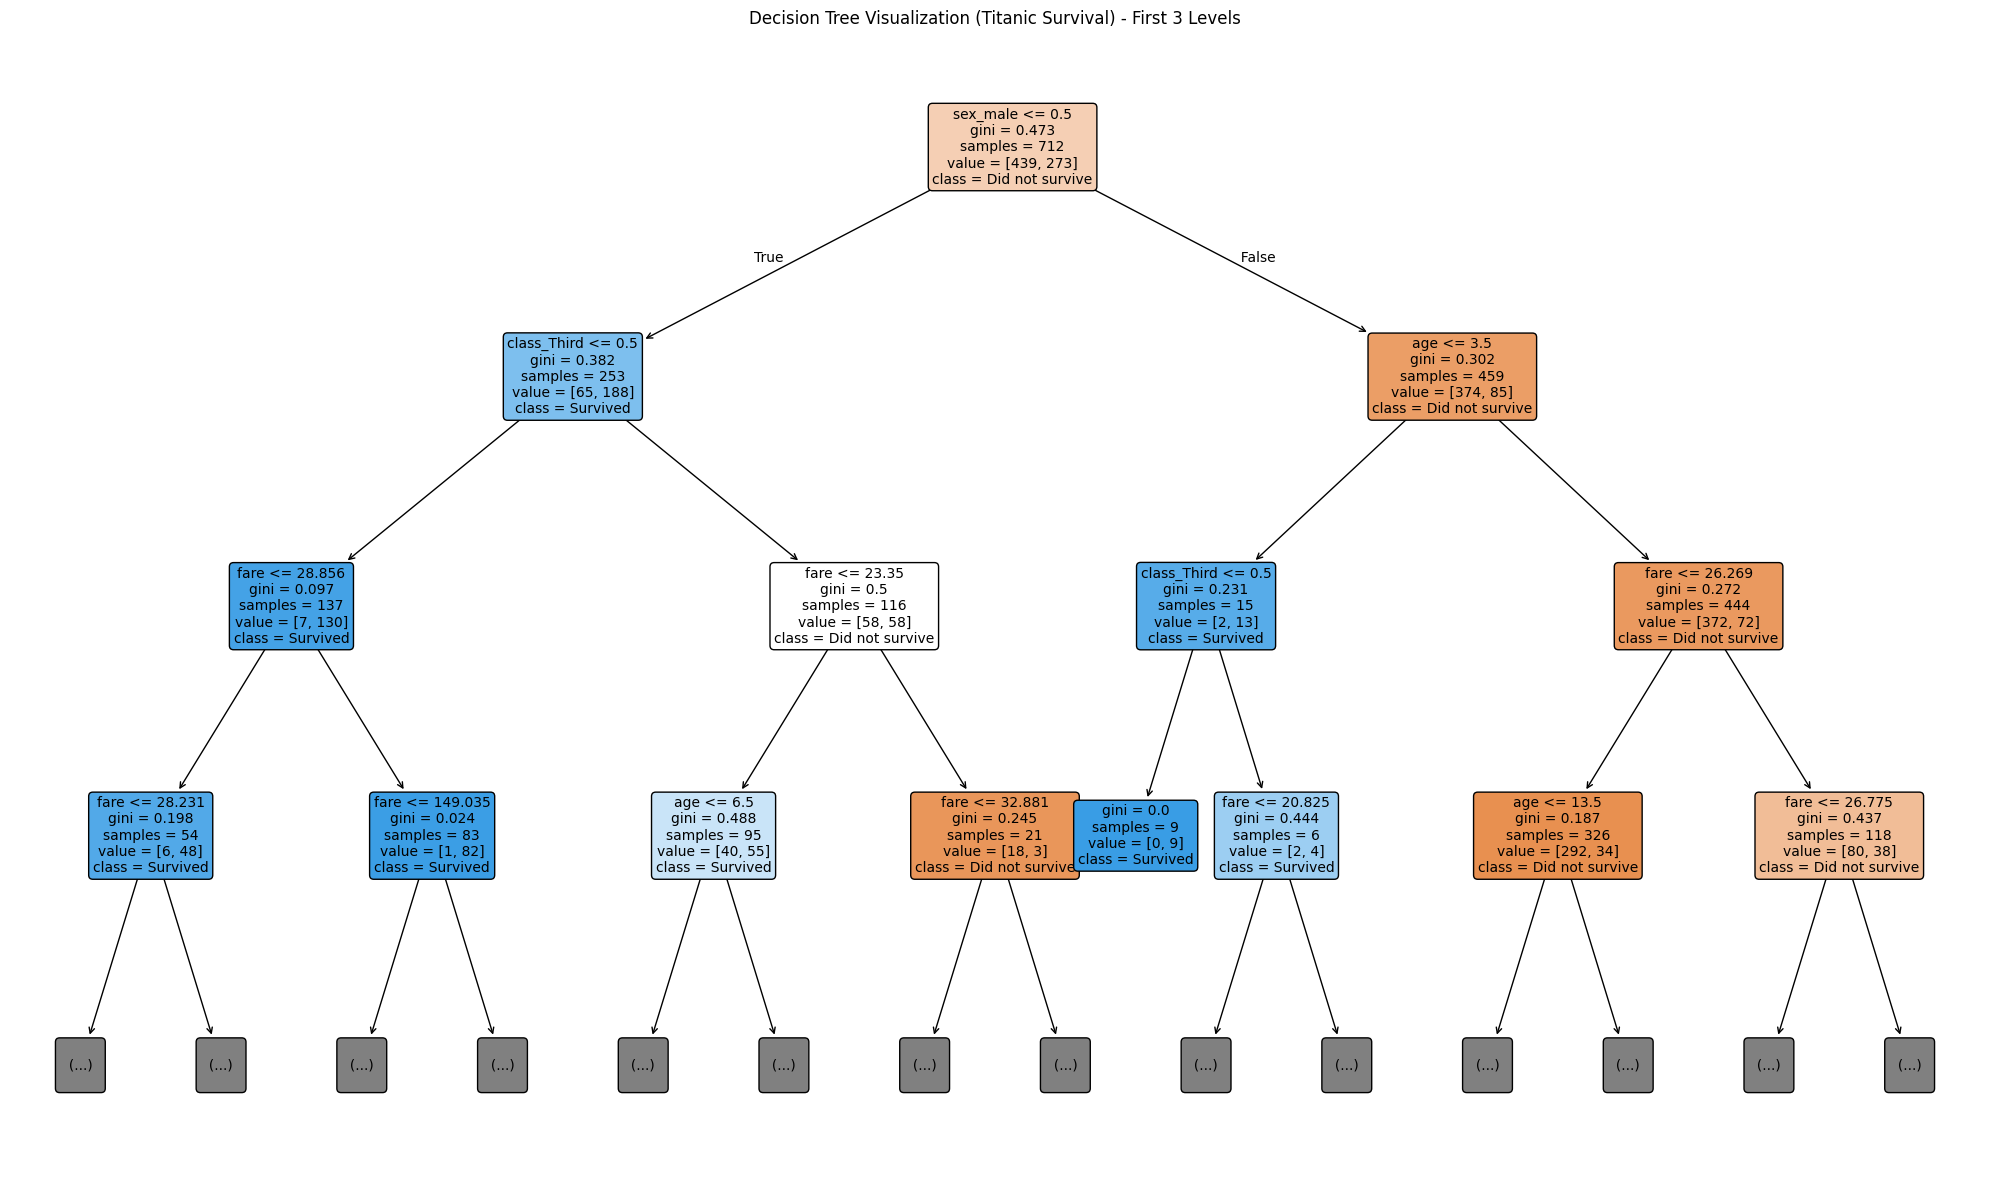


Comparison of Different Tree Depths:
  Depth 2: Train Acc = 0.805, Test Acc = 0.760
  Depth 3: Train Acc = 0.826, Test Acc = 0.793
  Depth 4: Train Acc = 0.844, Test Acc = 0.799
  Depth 5: Train Acc = 0.861, Test Acc = 0.816
  Depth 6: Train Acc = 0.875, Test Acc = 0.804
  Depth 7: Train Acc = 0.888, Test Acc = 0.804
  Depth 8: Train Acc = 0.900, Test Acc = 0.810


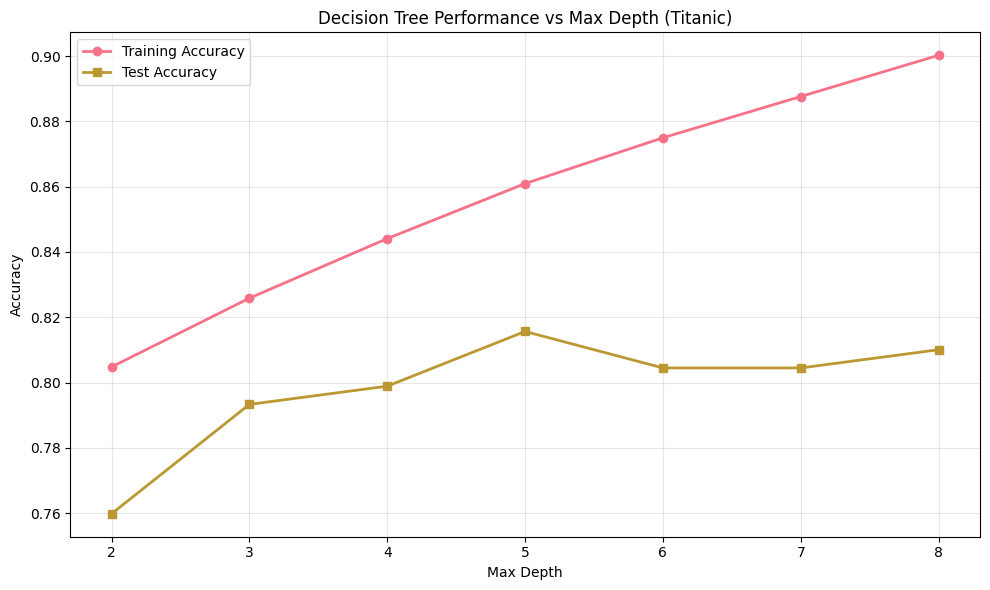


Best max_depth based on test accuracy: 5 (Test Acc: 0.816)

Decision path for test sample 0:
Sample features: {'age': np.float64(24.0), 'fare': np.float64(24.15), 'sex_male': np.True_, 'class_Second': np.False_, 'class_Third': np.True_}
Actual survival: 0
Predicted survival: 0
Decision rules followed:
  → sex_male > 0.500
  → age > 3.500
  → fare ≤ 26.269
  → age > 13.500
  → age ≤ 32.500
  → Leaf node: Prediction = 0



In [15]:
# =============================================================================
# Decision Tree on Titanic Dataset
# =============================================================================
# Goal:
# Use a Decision Tree to predict whether a passenger survived the Titanic.
# Dataset source: seaborn's Titanic dataset
#
# Tasks:
#   1. Load and explore the dataset
#   2. Preprocess data
#   3. Split into train/test sets
#   4. Train a Decision Tree model
#   5. Evaluate with accuracy and classification report
#   6. Visualize confusion matrix
# =============================================================================


# -----------------------------
# Step 1: Load dataset
# -----------------------------
# Load the Titanic dataset using seaborn
titanic = sns.load_dataset("titanic")

# Quick check (uncomment for exploration)
print(titanic.head())
print(titanic.info())

# -----------------------------
# Step 2: Data preprocessing
# -----------------------------

# Select features ['age','fare','sex','class']
X = pd.get_dummies(titanic[['age','fare','sex','class']], drop_first=True)

# Select target 'survived'
y = titanic['survived']

# -----------------------------
# Step 3: Train/test split
# -----------------------------
# TODO: Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# -----------------------------
# Step 4: Define and train model
# -----------------------------
# TODO: Define Decision Tree model (try changing max_depth)
clf = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')

# TODO: Train the model on the training data
clf.fit(X_train, y_train)

print("Decision Tree model trained successfully!")
print(f"Tree depth: {clf.get_depth()}")
print(f"Number of nodes: {clf.tree_.node_count}")

# -----------------------------
# Step 5: Evaluate model
# -----------------------------
# TODO: Predict on test data
y_pred = clf.predict(X_test)

# TODO: Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTitanic Survival Prediction (Decision Tree) Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))

# -----------------------------
# Step 6 Confusion matrix visualization
# -----------------------------
# TODO: Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Blues", display_labels=['Did not survive', 'Survived'])
plt.title("Confusion Matrix: Decision Tree (Titanic)")
plt.tight_layout()
plt.show()

# Additional insights and visualizations
print(f"\nDecision Tree Model Insights:")

# Feature importance
feature_names = X.columns
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(f"\nFeature Importances:")
for _, row in feature_importance_df.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance (Titanic Survival)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize the decision tree (simplified version)
plt.figure(figsize=(20, 12))
plot_tree(clf, 
          feature_names=feature_names,
          class_names=['Did not survive', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limit depth for readability
plt.title("Decision Tree Visualization (Titanic Survival) - First 3 Levels")
plt.tight_layout()
plt.show()

# Compare different max_depth values
print(f"\nComparison of Different Tree Depths:")
depths = [2, 3, 4, 5, 6, 7, 8]
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    
    train_acc = dt_temp.score(X_train, y_train)
    test_acc = dt_temp.score(X_test, y_test)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    print(f"  Depth {depth}: Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}")

# Plot depth comparison
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_scores, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth (Titanic)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Best depth based on test accuracy
best_depth = depths[np.argmax(test_scores)]
print(f"\nBest max_depth based on test accuracy: {best_depth} (Test Acc: {max(test_scores):.3f})")

# Decision path for a sample prediction
sample_idx = 0
print(f"\nDecision path for test sample {sample_idx}:")
print(f"Sample features: {dict(zip(feature_names, X_test.iloc[sample_idx]))}")
print(f"Actual survival: {y_test.iloc[sample_idx]}")
print(f"Predicted survival: {y_pred[sample_idx]}")

# Get decision path
decision_path = clf.decision_path(X_test.iloc[[sample_idx]])
leaf_id = clf.apply(X_test.iloc[[sample_idx]])

feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_indicator = decision_path.toarray()[0]

print(f"Decision rules followed:")
for node_id in range(len(node_indicator)):
    if node_indicator[node_id] == 1:
        if leaf_id[0] == node_id:
            print(f"  → Leaf node: Prediction = {y_pred[sample_idx]}")
        else:
            if X_test.iloc[sample_idx, feature[node_id]] <= threshold[node_id]:
                direction = "≤"
            else:
                direction = ">"
            print(f"  → {feature_names[feature[node_id]]} {direction} {threshold[node_id]:.3f}")

print(f"\n" + "="*50)



PART 4: SUPPORT VECTOR MACHINES

4.1 Hinge loss and margin intuition


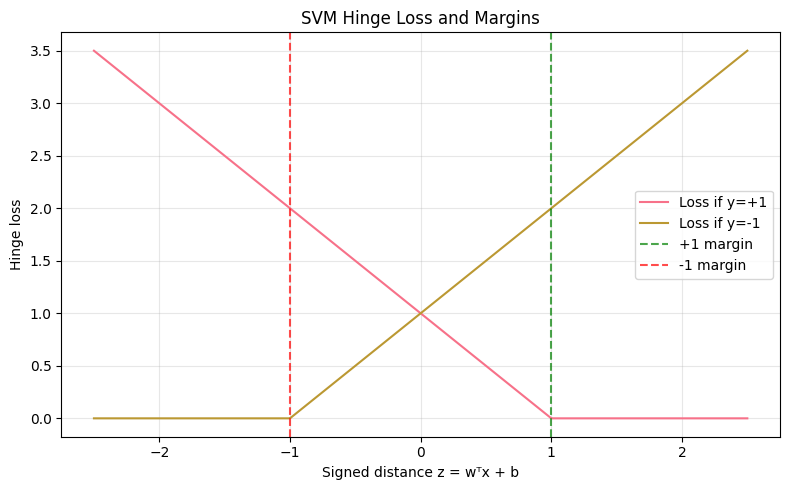


4.2 Linear SVM (margins & effect of C with TRAIN/TEST accuracy)
C = 0.1    → Train: 0.971 | Test: 1.000
C = 0.1    → Train: 0.971 | Test: 1.000


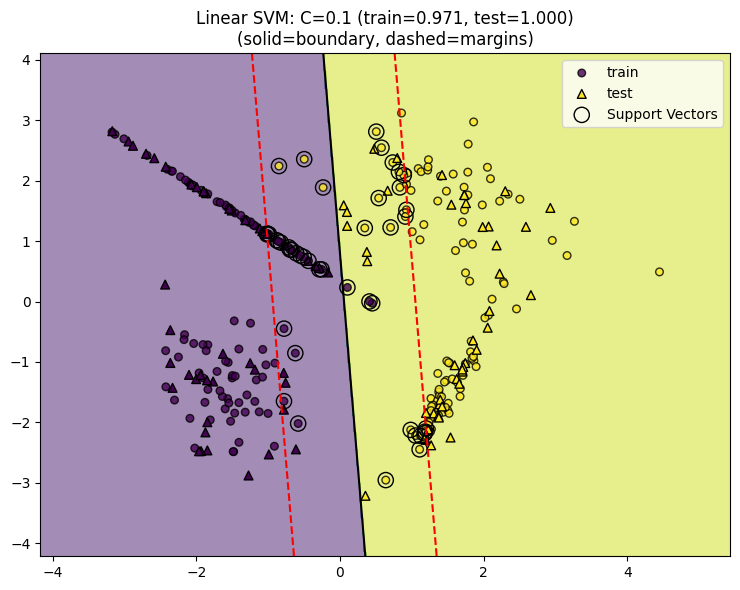

C = 1      → Train: 0.976 | Test: 0.989


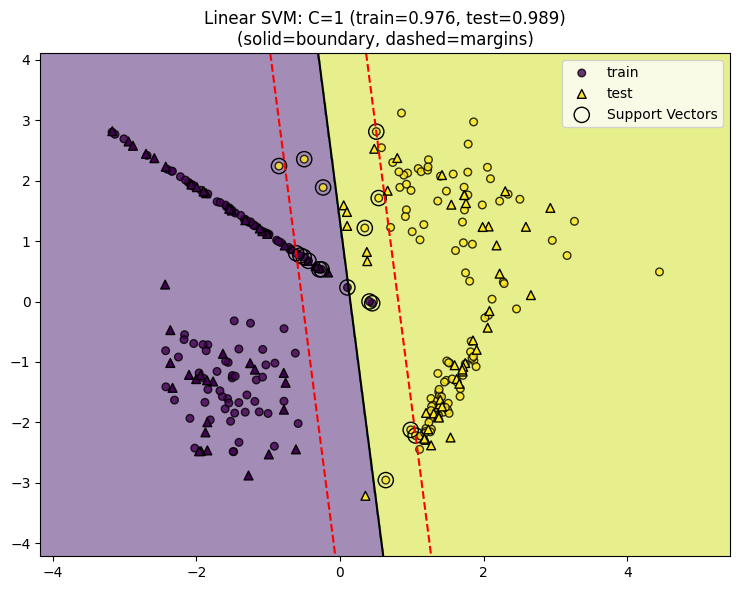

C = 10     → Train: 0.971 | Test: 0.989


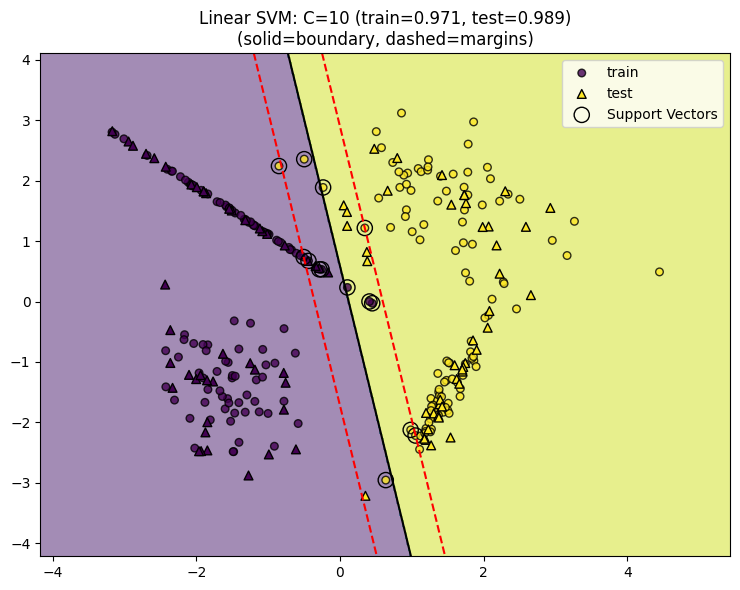

C = 100    → Train: 0.971 | Test: 0.989


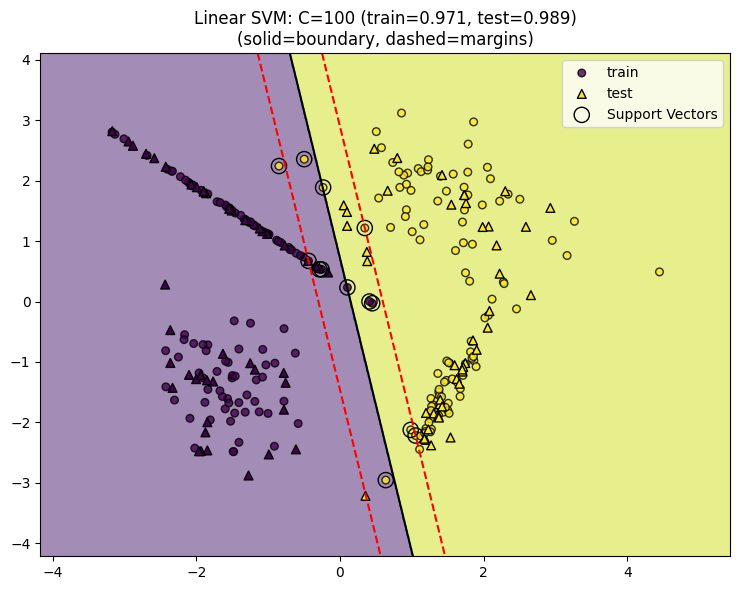


Accuracy summary by C:
  C=0.1    -> train=0.971 | test=1.000
  C=1      -> train=0.976 | test=0.989
  C=10     -> train=0.971 | test=0.989
  C=100    -> train=0.971 | test=0.989

4.3 Kernels on nonlinear data (moons)


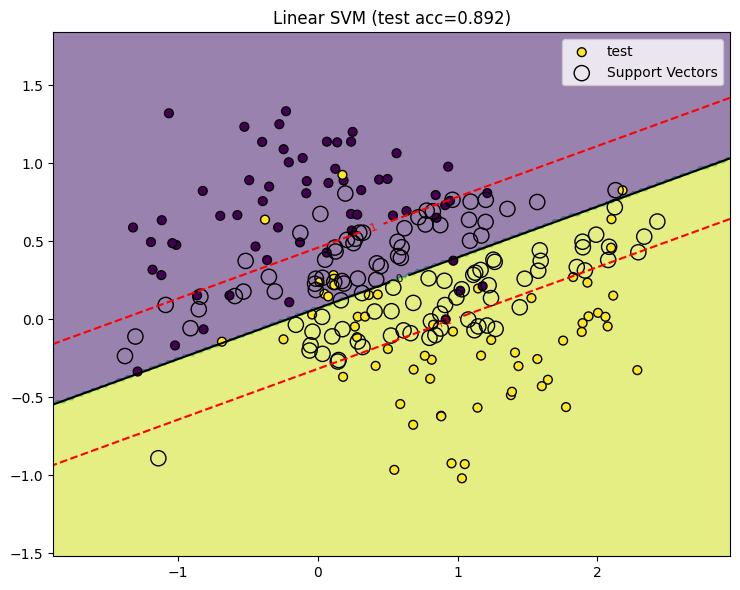

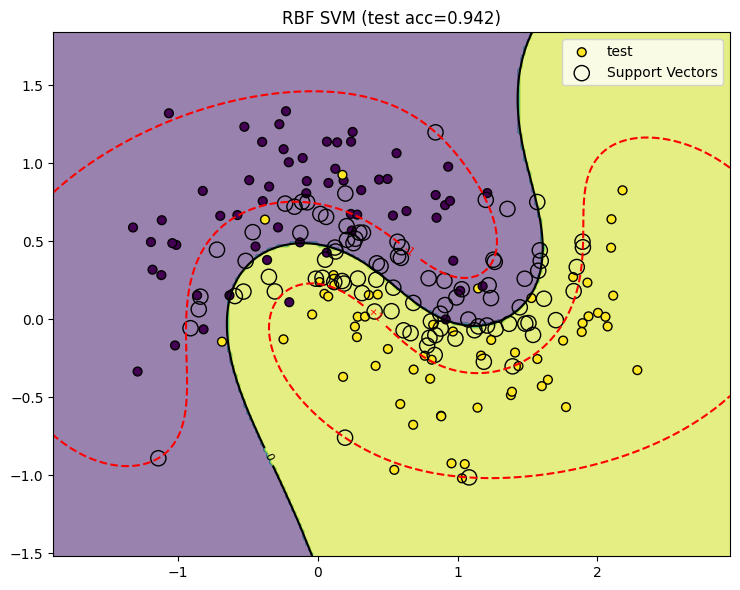

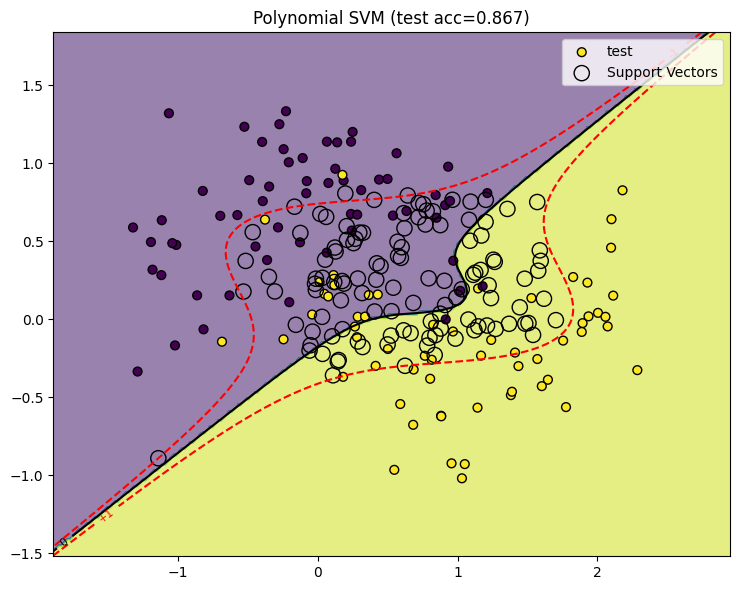


4.4 Multiclass SVM on Wine (with scaling)
SVM (RBF) Wine Accuracy: 0.944
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



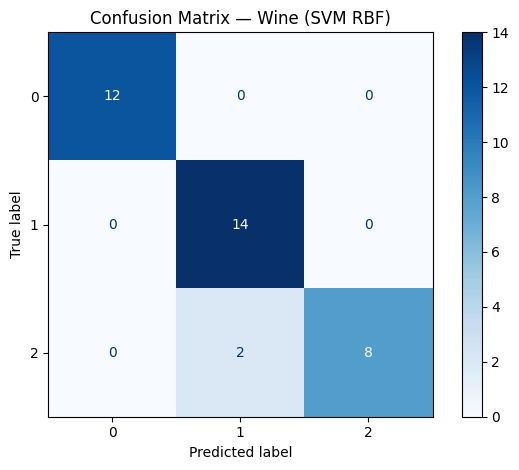

Support vectors per class: [16 24 17]

4.5 C–γ grid search (5-fold CV)
Best params: {'svc__C': np.float64(10.0), 'svc__gamma': np.float64(0.1)}
Best CV accuracy: 0.989
Best params: {'svc__C': np.float64(10.0), 'svc__gamma': np.float64(0.1)}
Best CV accuracy: 0.989


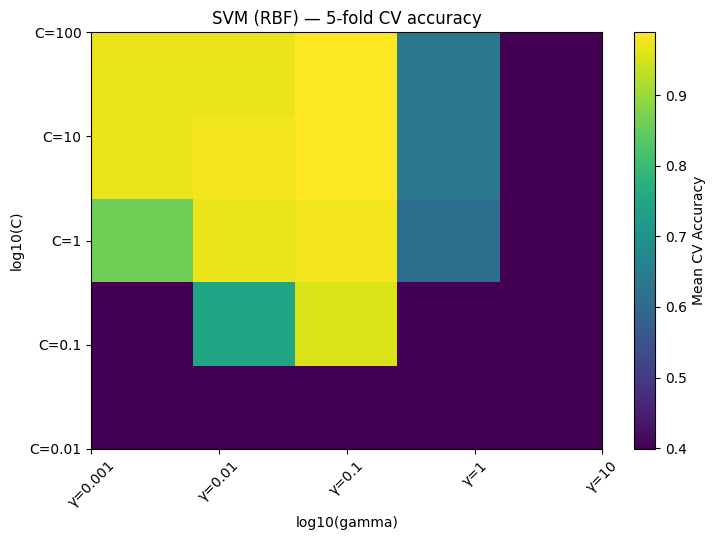


4.6 Scaling vs No Scaling (Wine)
Accuracy without scaling: 0.750
Accuracy with scaling   : 0.944

4.7 Binary SVM: ROC & calibration (Breast Cancer)


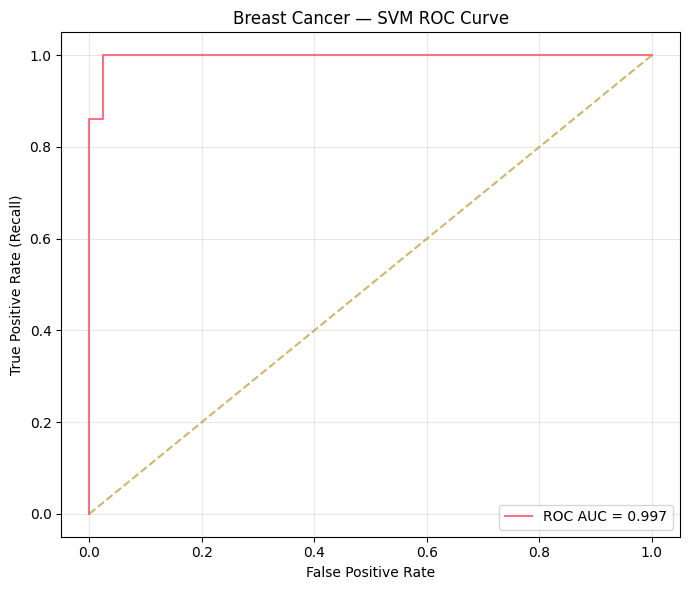

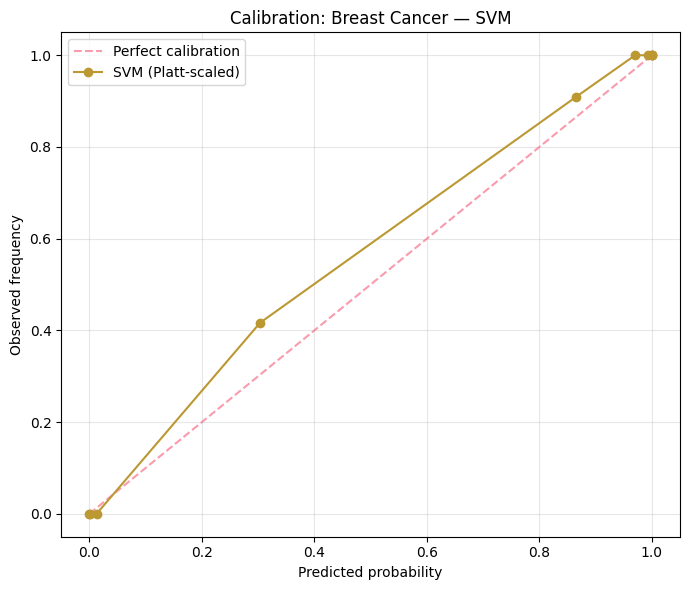


4.8 LinearSVC vs SVC(kernel='linear') (optional quick compare)
SVC(kernel='linear') acc: 0.9444444444444444
LinearSVC (liblinear/ovr) acc: 0.9722222222222222

Done: You now have hinge-loss/margin intuition, linear vs kernel boundaries, scaling effects, multiclass evaluation with confusion matrix & support-vector counts, a C–γ CV heatmap, and binary ROC+calibration for SVMs.


In [16]:
# =============================================================================
# PART 4: SUPPORT VECTOR MACHINES
# =============================================================================

print("\n" + "="*50)
print("PART 4: SUPPORT VECTOR MACHINES")
print("="*50)



# -----------------------------------------------------------------------------
# Wine and Breast Cancer datasets exist
# -----------------------------------------------------------------------------
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

bc = load_breast_cancer()
X_bc, y_bc = bc.data, bc.target

# =============================================================================
# 4.1 Margin intuition: hinge loss vs. margin (binary)
# =============================================================================
print("\n4.1 Hinge loss and margin intuition")

# Hinge loss L = max(0, 1 - y*z), where z = w^T x + b and y in {-1, +1}
z = np.linspace(-2.5, 2.5, 400)
y_pos = 1
y_neg = -1
L_pos = np.maximum(0, 1 - y_pos*z)
L_neg = np.maximum(0, 1 - y_neg*z)

plt.figure(figsize=(8,5))
plt.plot(z, L_pos, label="Loss if y=+1")
plt.plot(z, L_neg, label="Loss if y=-1")
plt.axvline(1, color='g', ls='--', alpha=0.7, label='+1 margin')
plt.axvline(-1, color='r', ls='--', alpha=0.7, label='-1 margin')
plt.xlabel("Signed distance z = wᵀx + b")
plt.ylabel("Hinge loss")
plt.title("SVM Hinge Loss and Margins")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# =============================================================================
# 4.2 Linear SVM (separable-ish data): margins, support vectors, and effect of C
# =============================================================================
print("\n4.2 Linear SVM (margins & effect of C with TRAIN/TEST accuracy)")

# Create a simple 2D dataset with some separation
X_lin, y_lin = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    class_sep=1.5, random_state=42
)

# Train/test split for proper accuracy reporting
Xl_tr, Xl_te, yl_tr, yl_te = train_test_split(
    X_lin, y_lin, test_size=0.3, stratify=y_lin, random_state=42
)

def plot_linear_svm_margins(C, Xtr, ytr, Xte, yte, X_all=None):
    """
    Fit a linear SVM (with scaling) and plot:
      - Filled decision regions
      - Decision boundary (f(x)=0) and margins (f(x)=±1)
      - Support vectors (open circles)
    Prints and returns (train_acc, test_acc) for the given C.
    """
    model = Pipeline([
        ("sc", StandardScaler()),
        ("svc", SVC(kernel='linear', C=C))
    ]).fit(Xtr, ytr)

    svc = model.named_steps['svc']
    sc  = model.named_steps['sc']

    # Accuracies
    train_acc = accuracy_score(ytr, model.predict(Xtr))
    test_acc  = accuracy_score(yte, model.predict(Xte))
    print(f"C = {C:<6} → Train: {train_acc:.3f} | Test: {test_acc:.3f}")

    # Grid over full data range
    if X_all is None:
        X_all = np.vstack([Xtr, Xte])
    h = 0.02
    x_min, x_max = X_all[:, 0].min()-1, X_all[:, 0].max()+1
    y_min, y_max = X_all[:, 1].min()-1, X_all[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Class regions via pipeline
    Z = model.predict(grid).reshape(xx.shape)

    # Decision function (need scaled space)
    grid_scaled = sc.transform(grid)
    df = svc.decision_function(grid_scaled).reshape(xx.shape)

    # Support vectors (stored scaled → inverse-transform for plotting)
    SVs_scaled = svc.support_vectors_
    SVs = sc.inverse_transform(SVs_scaled)

    # Plot
    plt.figure(figsize=(7.5, 6))
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.contour(xx, yy, df, levels=[-1, 0, 1],
                colors=['r', 'k', 'r'], linestyles=['--', '-', '--'])
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, edgecolors='black', s=30, alpha=0.8, label='train')
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte, edgecolors='black', s=40, marker='^', label='test')
    plt.scatter(SVs[:, 0], SVs[:, 1], s=120, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.title(f'Linear SVM: C={C} (train={train_acc:.3f}, test={test_acc:.3f})\n'
              f'(solid=boundary, dashed=margins)')
    plt.legend(loc='upper right'); plt.tight_layout(); plt.show()

    return train_acc, test_acc

# Try several C values and print both train & test accuracy for each
Cs = [0.1, 1, 10, 100]
accs = {C: plot_linear_svm_margins(C, Xl_tr, yl_tr, Xl_te, yl_te, X_all=X_lin) for C in Cs}

# (Optional) quick summary table
print("\nAccuracy summary by C:")
for C, (tr, te) in accs.items():
    print(f"  C={C:<6} -> train={tr:.3f} | test={te:.3f}")


# =============================================================================
# 4.3 Kernel trick: linear vs RBF vs polynomial on moons (nonlinear)
# =============================================================================
print("\n4.3 Kernels on nonlinear data (moons)")


# Make a binary, nonlinearly separable dataset
X_m, y_m = make_moons(n_samples=400, noise=0.25, random_state=42)
Xm_tr, Xm_te, ym_tr, ym_te = train_test_split(
    X_m, y_m, test_size=0.3, stratify=y_m, random_state=42
)

def plot_kernel_boundary_with_svs(model, Xtr, ytr, Xte, yte, title, X_all=None):
    """
    Fit the (Pipeline) SVM model and plot:
      - Filled class regions (predicted labels),
      - Decision boundary (decision_function == 0) and margin contours (≈ ±1),
      - Support vectors (open circles), inverse-transformed if a scaler exists.
    """
    model.fit(Xtr, ytr)
    sc = model.named_steps.get('sc', None)
    svc = model.named_steps['svc']

    # Grid over the full dataset range
    if X_all is None:
        X_all = np.vstack([Xtr, Xte])
    h = 0.02
    x_min, x_max = X_all[:, 0].min() - 0.5, X_all[:, 0].max() + 0.5
    y_min, y_max = X_all[:, 1].min() - 0.5, X_all[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Class regions via the full pipeline
    Z = model.predict(grid).reshape(xx.shape)

    # Decision function in scaled space (transform the grid if scaler is present)
    grid_scaled = sc.transform(grid) if sc is not None else grid
    df = svc.decision_function(grid_scaled).reshape(xx.shape)  # signed score

    # Plot regions, boundary (0), and margins (±1)
    plt.figure(figsize=(7.5, 6))
    plt.contourf(xx, yy, Z, alpha=0.55)
    cs = plt.contour(xx, yy, df, levels=[-1, 0, 1],
                     colors=['r', 'k', 'r'], linestyles=['--', '-', '--'])
    plt.clabel(cs, inline=True, fontsize=8, fmt={-1: '-1', 0: '0', 1: '+1'})

    # Test points
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte, edgecolors='black', s=40, label='test')

    # Support vectors are stored in scaled space; map back to original for display
    SVs_scaled = svc.support_vectors_
    SVs = sc.inverse_transform(SVs_scaled) if sc is not None else SVs_scaled
    plt.scatter(SVs[:, 0], SVs[:, 1], s=120, facecolors='none', edgecolors='k', label='Support Vectors')

    acc = accuracy_score(yte, model.predict(Xte))
    plt.title(f'{title} (test acc={acc:.3f})')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Pipelines for three kernels (with scaling)
lin  = Pipeline([("sc", StandardScaler()), ("svc", SVC(kernel='linear', C=1.0))])
rbf  = Pipeline([("sc", StandardScaler()), ("svc", SVC(kernel='rbf',   C=1.0, gamma='scale'))])
poly = Pipeline([("sc", StandardScaler()), ("svc", SVC(kernel='poly',  degree=3, C=1.0, gamma='scale'))])

# Plot all three with hyperplane/margins & support vectors
plot_kernel_boundary_with_svs(lin,  Xm_tr, ym_tr, Xm_te, ym_te, "Linear SVM",     X_all=X_m)
plot_kernel_boundary_with_svs(rbf,  Xm_tr, ym_tr, Xm_te, ym_te, "RBF SVM",        X_all=X_m)
plot_kernel_boundary_with_svs(poly, Xm_tr, ym_tr, Xm_te, ym_te, "Polynomial SVM", X_all=X_m)


# =============================================================================
# 4.4 Multiclass SVM on Wine: scaling, evaluation, support vector counts
# =============================================================================
print("\n4.4 Multiclass SVM on Wine (with scaling)")

Xw_tr, Xw_te, yw_tr, yw_te = train_test_split(X_wine, y_wine, test_size=0.2, stratify=y_wine, random_state=42)

wine_svm = Pipeline([
    ("sc", StandardScaler()),
    ("svc", SVC(kernel='rbf', C=10.0, gamma='scale'))   # reasonable defaults
]).fit(Xw_tr, yw_tr)

yw_pred = wine_svm.predict(Xw_te)
print(f"SVM (RBF) Wine Accuracy: {accuracy_score(yw_te, yw_pred):.3f}")
print("Classification Report:\n", classification_report(yw_te, yw_pred, target_names=wine.target_names))

ConfusionMatrixDisplay.from_estimator(wine_svm, Xw_te, yw_te, cmap="Blues")
plt.title("Confusion Matrix — Wine (SVM RBF)"); plt.tight_layout(); plt.show()

# Support vectors (One-vs-One under the hood; n_support_ per class)
svc_est = wine_svm.named_steps['svc']
print("Support vectors per class:", svc_est.n_support_)

# =============================================================================
# 4.5 Hyperparameters C & gamma: quick CV heatmap (Wine)
# =============================================================================
print("\n4.5 C–γ grid search (5-fold CV)")

Cs = np.logspace(-2, 2, 5)        # [0.01, 0.1, 1, 10, 100]
Gammas = np.logspace(-3, 1, 5)    # [0.001, 0.01, 0.1, 1, 10]

pipe = Pipeline([("sc", StandardScaler()), ("svc", SVC(kernel='rbf'))])
grid = GridSearchCV(pipe,
                    param_grid={"svc__C": Cs, "svc__gamma": Gammas},
                    scoring="accuracy", cv=5, n_jobs=-1, verbose=0)
grid.fit(X_wine, y_wine)

print("Best params:", grid.best_params_)
print(f"Best CV accuracy: {grid.best_score_:.3f}")

# Build a heatmap of mean CV accuracy
mean_scores = grid.cv_results_['mean_test_score']
# Map scores into a matrix (rows=C, cols=gamma) sorted as we supplied
score_mat = mean_scores.reshape(len(Cs), len(Gammas))

plt.figure(figsize=(7.5,5.5))
im = plt.imshow(score_mat, origin='lower', aspect='auto',
                extent=[np.log10(Gammas[0]), np.log10(Gammas[-1]), np.log10(Cs[0]), np.log10(Cs[-1])])
plt.colorbar(im, label='Mean CV Accuracy')
plt.xticks(np.log10(Gammas), [f'γ={g:g}' for g in Gammas], rotation=45)
plt.yticks(np.log10(Cs),     [f'C={c:g}' for c in Cs])
plt.xlabel('log10(gamma)'); plt.ylabel('log10(C)')
plt.title('SVM (RBF) — 5-fold CV accuracy')
plt.tight_layout(); plt.show()

# =============================================================================
# 4.6 Why scaling matters for SVM (demo)
# =============================================================================
print("\n4.6 Scaling vs No Scaling (Wine)")

# No scaling
svm_no_sc = SVC(kernel='rbf', C=10.0, gamma='scale').fit(Xw_tr, yw_tr)
acc_no_sc = accuracy_score(yw_te, svm_no_sc.predict(Xw_te))

# With scaling (already computed wine_svm above)
acc_sc = accuracy_score(yw_te, wine_svm.predict(Xw_te))

print(f"Accuracy without scaling: {acc_no_sc:.3f}")
print(f"Accuracy with scaling   : {acc_sc:.3f}")

# =============================================================================
# 4.7 Binary SVM: ROC & calibration (Breast Cancer)
# =============================================================================
print("\n4.7 Binary SVM: ROC & calibration (Breast Cancer)")

Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(X_bc, y_bc, test_size=0.2, stratify=y_bc, random_state=42)

# Probability=True enables Platt scaling (sigmoid calibration inside SVC)
bc_svm = Pipeline([
    ("sc", StandardScaler()),
    ("svc", SVC(kernel='rbf', C=2.0, gamma='scale', probability=True))
]).fit(Xb_tr, yb_tr)

# ROC curve
proba = bc_svm.predict_proba(Xb_te)[:, 1]
fpr, tpr, _ = roc_curve(yb_te, proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], ls='--', alpha=0.7)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate (Recall)')
plt.title('Breast Cancer — SVM ROC Curve')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# Calibration curve
prob_true, prob_pred = calibration_curve(yb_te, proba, n_bins=10, strategy='quantile')
plt.figure(figsize=(7,6))
plt.plot([0,1], [0,1], ls='--', alpha=0.7, label='Perfect calibration')
plt.plot(prob_pred, prob_true, marker='o', label='SVM (Platt-scaled)')
plt.xlabel('Predicted probability'); plt.ylabel('Observed frequency')
plt.title('Calibration: Breast Cancer — SVM')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# =============================================================================
# 4.8 LinearSVC vs SVC(kernel="linear"): speed/regularization note (optional)
# =============================================================================
print("\n4.8 LinearSVC vs SVC(kernel='linear') (optional quick compare)")

Xl_tr, Xl_te, yl_tr, yl_te = train_test_split(X_wine, y_wine, test_size=0.2, stratify=y_wine, random_state=42)

lin_svc_kernel = Pipeline([("sc", StandardScaler()), ("svc", SVC(kernel='linear', C=1.0))]).fit(Xl_tr, yl_tr)
lin_svc_liblin = Pipeline([("sc", StandardScaler()), ("lsvc", LinearSVC(C=1.0, dual='auto'))]).fit(Xl_tr, yl_tr)

print("SVC(kernel='linear') acc:", accuracy_score(yl_te, lin_svc_kernel.predict(Xl_te)))
print("LinearSVC (liblinear/ovr) acc:", accuracy_score(yl_te, lin_svc_liblin.predict(Xl_te)))

print("\nDone: You now have hinge-loss/margin intuition, linear vs kernel boundaries, "
      "scaling effects, multiclass evaluation with confusion matrix & support-vector counts, "
      "a C–γ CV heatmap, and binary ROC+calibration for SVMs.")


Dataset shape: (891, 15)

First few rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset info:
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -------

<Figure size 800x600 with 0 Axes>

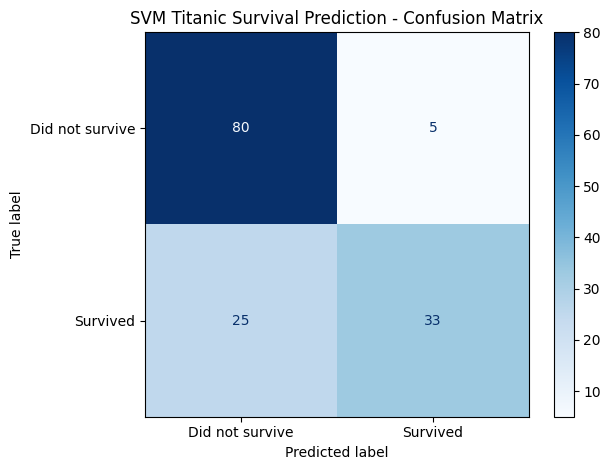


SVM Model Insights:
True Negatives (Correctly predicted deaths): 80
False Positives (Incorrectly predicted survival): 5
False Negatives (Incorrectly predicted deaths): 25
True Positives (Correctly predicted survival): 33

COMPARING SVM KERNELS
LINEAR kernel accuracy: 0.783
POLY kernel accuracy: 0.818
RBF kernel accuracy: 0.790
SIGMOID kernel accuracy: 0.622


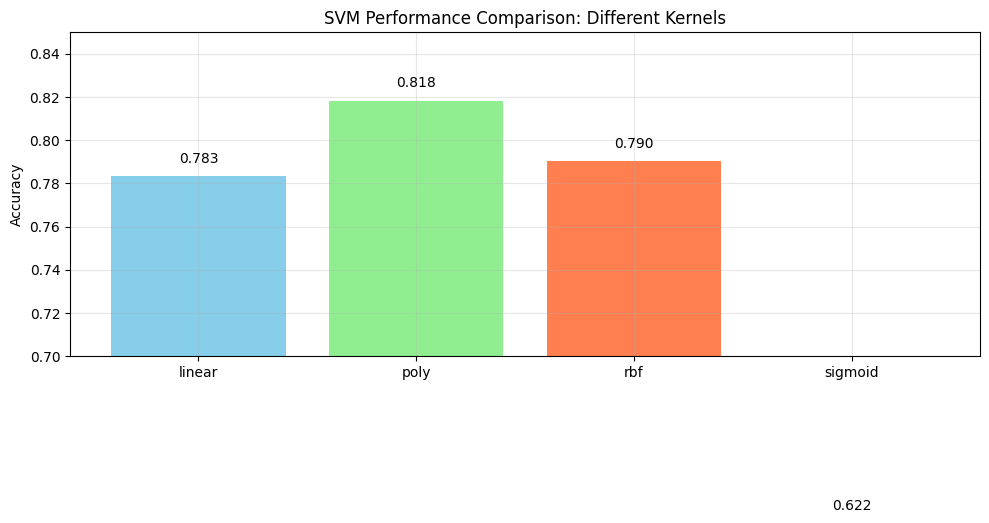


Best performing kernel: poly with accuracy 0.818

HYPERPARAMETER TUNING
Best parameters: {'C': 100, 'gamma': 'scale'}
Best cross-validation accuracy: 0.820
Test accuracy with best parameters: 0.804
Best parameters: {'C': 100, 'gamma': 'scale'}
Best cross-validation accuracy: 0.820
Test accuracy with best parameters: 0.804


In [17]:
# =============================================================================
# SVM on Titanic Dataset
# =============================================================================
# Goal:
# Use a Support Vector Machine (SVM) to predict whether a passenger survived.
# Dataset source: seaborn's Titanic dataset
#
# Tasks:
#   1. Load and explore the dataset
#   2. Preprocess data
#   3. Split into train/test sets
#   4. Train an SVM model
#   5. Evaluate with accuracy and classification report
#   6. Visualize confusion matrix
# =============================================================================

# -----------------------------
# Step 1: Load dataset
# -----------------------------
# Load the Titanic dataset using seaborn
titanic = sns.load_dataset("titanic")

# Quick exploration
print("Dataset shape:", titanic.shape)
print("\nFirst few rows:")
print(titanic.head())
print("\nDataset info:")
print(titanic.info())
print("\nSurvival rate:", titanic['survived'].value_counts(normalize=True))

# -----------------------------
# Step 2: Data preprocessing
# -----------------------------
# Drop rows with missing values in key columns
titanic_clean = titanic.dropna(subset=['age','fare','sex','class','survived'])

print(f"\nDataset shape after removing missing values: {titanic_clean.shape}")

# Select features and create dummy variables
X = pd.get_dummies(titanic_clean[['age','fare','sex','class']], drop_first=True)
y = titanic_clean['survived']

print(f"\nFeatures shape: {X.shape}")
print("Features:", list(X.columns))

# -----------------------------
# Step 3: Train/test split
# -----------------------------
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# -----------------------------
# Step 4: Train SVM model
# -----------------------------
# SVM requires feature scaling for optimal performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("SVM model trained successfully!")

# -----------------------------
# Step 5: Evaluate model
# -----------------------------
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nSVM Model Performance:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

# Classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))

# -----------------------------
# Step 6: Visualize confusion matrix
# -----------------------------
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(values_format='d', cmap='Blues')
plt.title('SVM Titanic Survival Prediction - Confusion Matrix')
plt.tight_layout()
plt.show()

# Model insights
print(f"\nSVM Model Insights:")
print(f"True Negatives (Correctly predicted deaths): {cm[0,0]}")
print(f"False Positives (Incorrectly predicted survival): {cm[0,1]}")
print(f"False Negatives (Incorrectly predicted deaths): {cm[1,0]}")
print(f"True Positives (Correctly predicted survival): {cm[1,1]}")

# Compare different SVM kernels
print(f"\n" + "="*50)
print("COMPARING SVM KERNELS")
print("="*50)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

for kernel in kernels:
    # Train SVM with different kernel
    svm_k = SVC(kernel=kernel, random_state=42)
    svm_k.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred_k = svm_k.predict(X_test_scaled)
    acc_k = accuracy_score(y_test, y_pred_k)
    svm_results[kernel] = acc_k
    
    print(f"{kernel.upper()} kernel accuracy: {acc_k:.3f}")

# Visualize kernel comparison
plt.figure(figsize=(10, 6))
kernels_list = list(svm_results.keys())
accuracies = list(svm_results.values())

bars = plt.bar(kernels_list, accuracies, color=['skyblue', 'lightgreen', 'coral', 'gold'])
plt.ylabel('Accuracy')
plt.title('SVM Performance Comparison: Different Kernels')
plt.ylim(0.7, 0.85)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBest performing kernel: {max(svm_results, key=svm_results.get)} with accuracy {max(svm_results.values()):.3f}")

# Hyperparameter tuning example
print(f"\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

# Grid search for optimal C and gamma (for RBF kernel)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}

grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

# Test the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Test accuracy with best parameters: {best_accuracy:.3f}")


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64

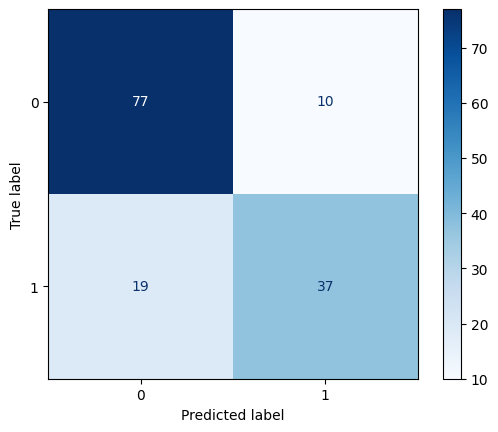

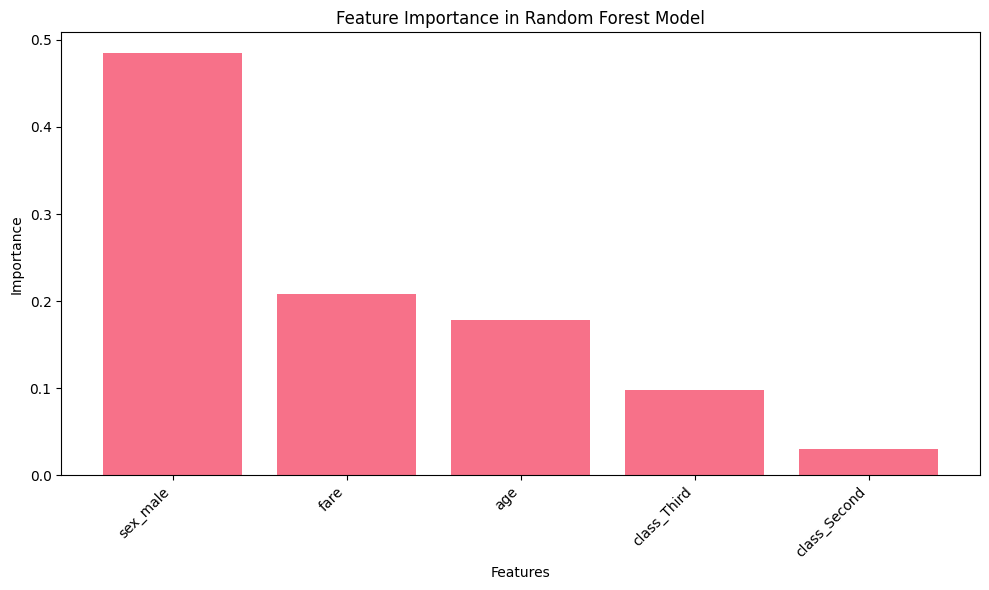

In [19]:
# =============================================================================
# Random Forest on Titanic Dataset
# =============================================================================
# Goal:
# Use a Random Forest to predict whether a passenger survived the Titanic.
# Dataset source: seaborn's Titanic dataset
#
# Tasks:
#   1. Load and explore the dataset
#   2. Preprocess data
#   3. Split into train/test sets
#   4. Train a Random Forest model
#   5. Evaluate with accuracy and classification report
#   6. (Optional) Visualize confusion matrix
# =============================================================================

# -----------------------------
# Step 1: Load dataset
# -----------------------------
# Load the Titanic dataset using seaborn
titanic = sns.load_dataset("titanic")

# Quick check (uncomment for exploration)
print(titanic.head())
print(titanic.info())

# -----------------------------
# Step 2: Data preprocessing
# -----------------------------
# Step 2: Data preprocessing
# -----------------------------
# Drop rows with missing values in ['age','fare','sex','class','survived']
titanic = titanic.dropna(subset=['age','fare','sex','class','survived'])

# Select features ['age','fare','sex','class']
X = pd.get_dummies(titanic[['age','fare','sex','class']], drop_first=True)

# Select target 'survived'
y = titanic['survived']

# -----------------------------
# Step 3: Train/test split
# -----------------------------
# TODO: Split the dataset into 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Step 4: Define and train model
# -----------------------------
# TODO: Define Random Forest model (try changing n_estimators and max_depth)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# TODO: Train the model on the training data

rf_model.fit(X_train, y_train)

# -----------------------------
# Step 5: Evaluate model
# -----------------------------
# TODO: Predict on test data

y_pred = rf_model.predict(X_test)


# TODO: Print accuracy and classification report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# Step 6: Plot Confusion matrix
# -----------------------------
# TODO: Plot confusion matrix

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")


# Feature Importance
# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X.columns
print("Feature importances:", dict(zip(feature_names, importances)))

# Create dataframe of features and their importance scores
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()



PART 5: ENSEMBLE METHODS

5.1 Ensemble Methods Comparison (Breast Cancer)
   Random Forest: acc=0.947 | prec=0.958 | rec=0.958 | f1=0.958 | auc=0.994
   Random Forest: acc=0.947 | prec=0.958 | rec=0.958 | f1=0.958 | auc=0.994
        AdaBoost: acc=0.956 | prec=0.947 | rec=0.986 | f1=0.966 | auc=0.985
        AdaBoost: acc=0.956 | prec=0.947 | rec=0.986 | f1=0.966 | auc=0.985
Gradient Boosting: acc=0.956 | prec=0.947 | rec=0.986 | f1=0.966 | auc=0.992
         XGBoost: acc=0.956 | prec=0.947 | rec=0.986 | f1=0.966 | auc=0.994
Gradient Boosting: acc=0.956 | prec=0.947 | rec=0.986 | f1=0.966 | auc=0.992
         XGBoost: acc=0.956 | prec=0.947 | rec=0.986 | f1=0.966 | auc=0.994


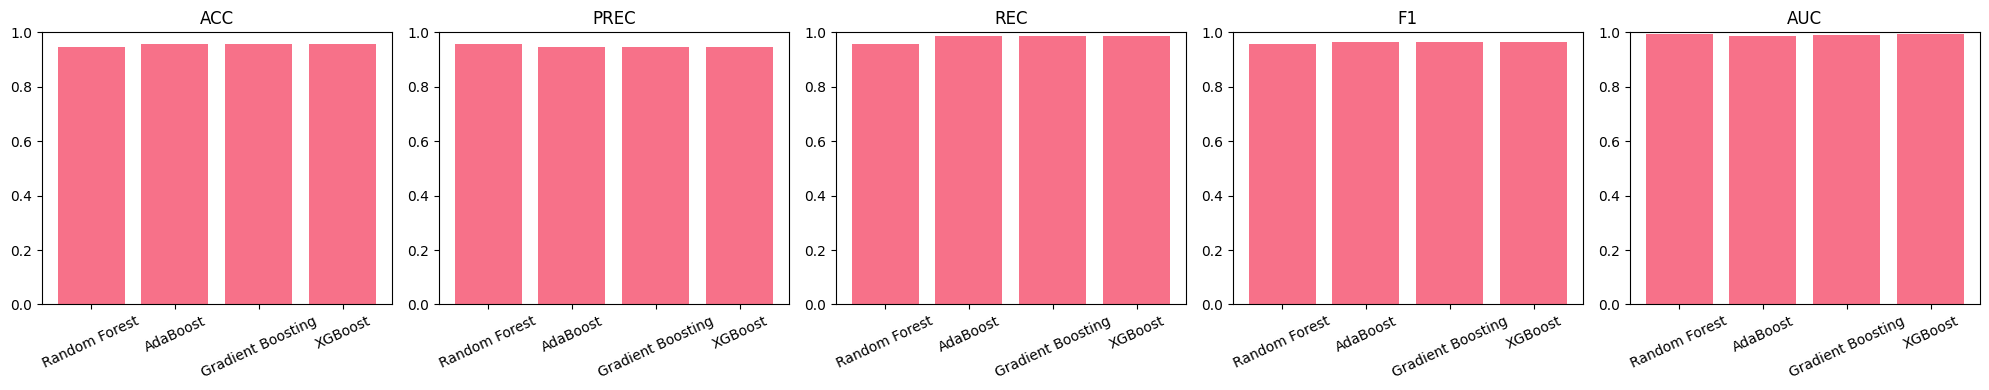


5.2 Random Forest: OOB, max_features, and importances


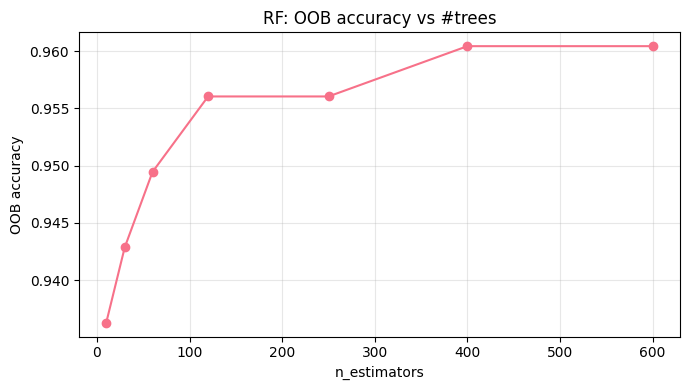

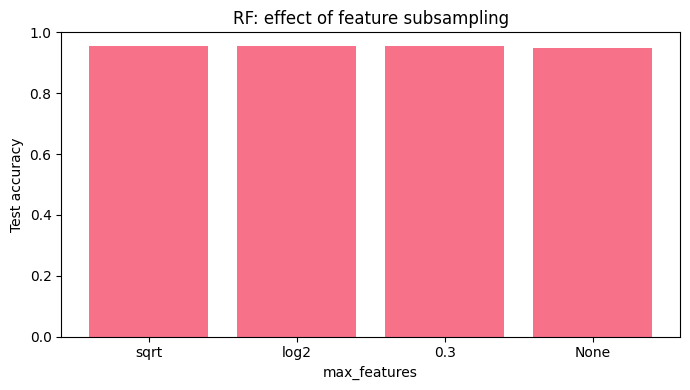

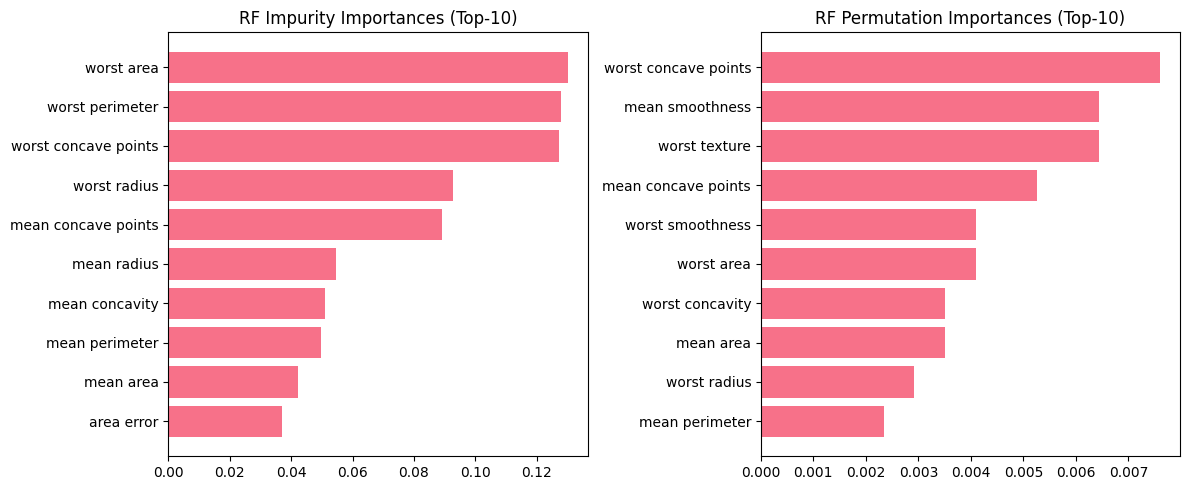

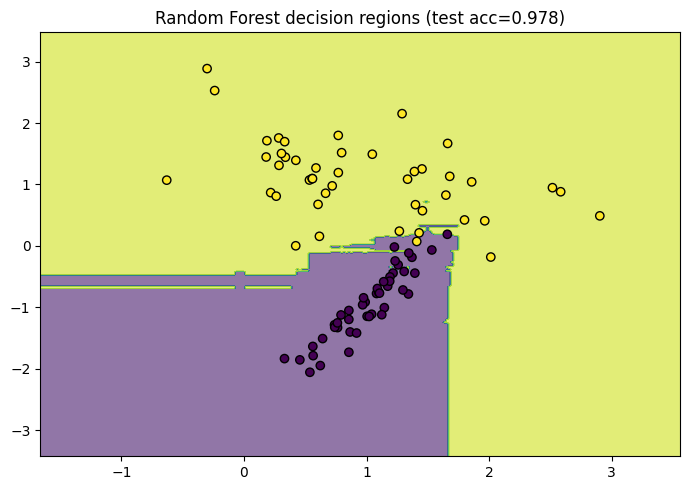


5.3 AdaBoost: estimator weights, staged improvement, margins, decision regions


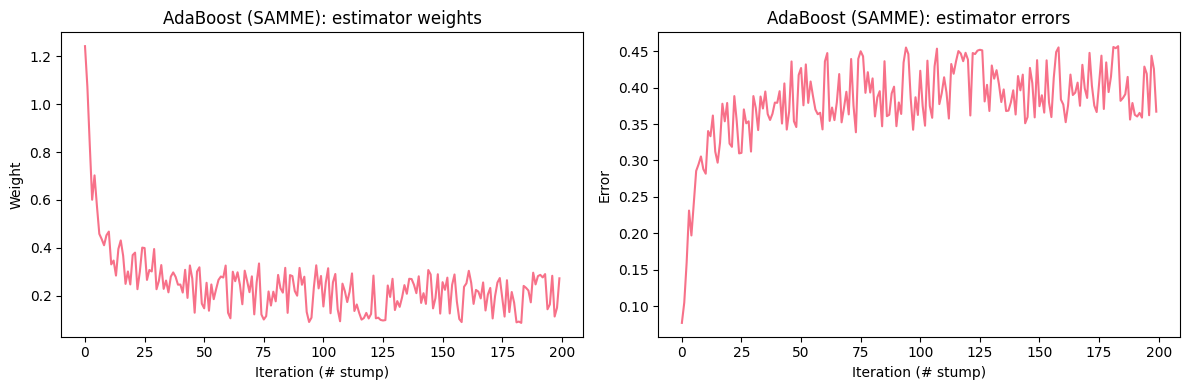

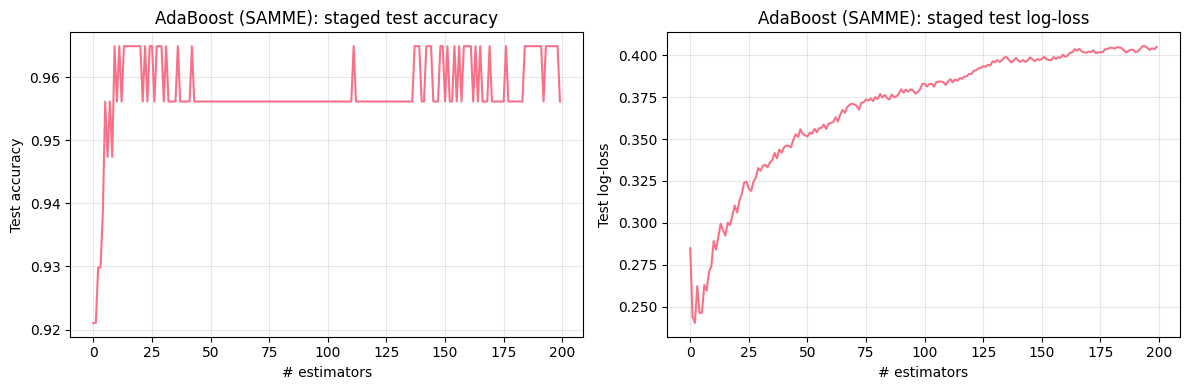

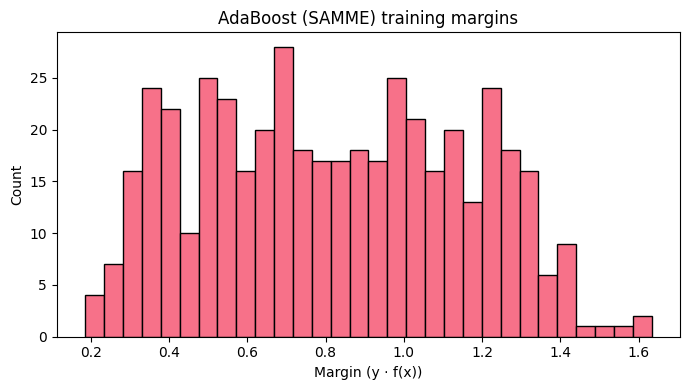

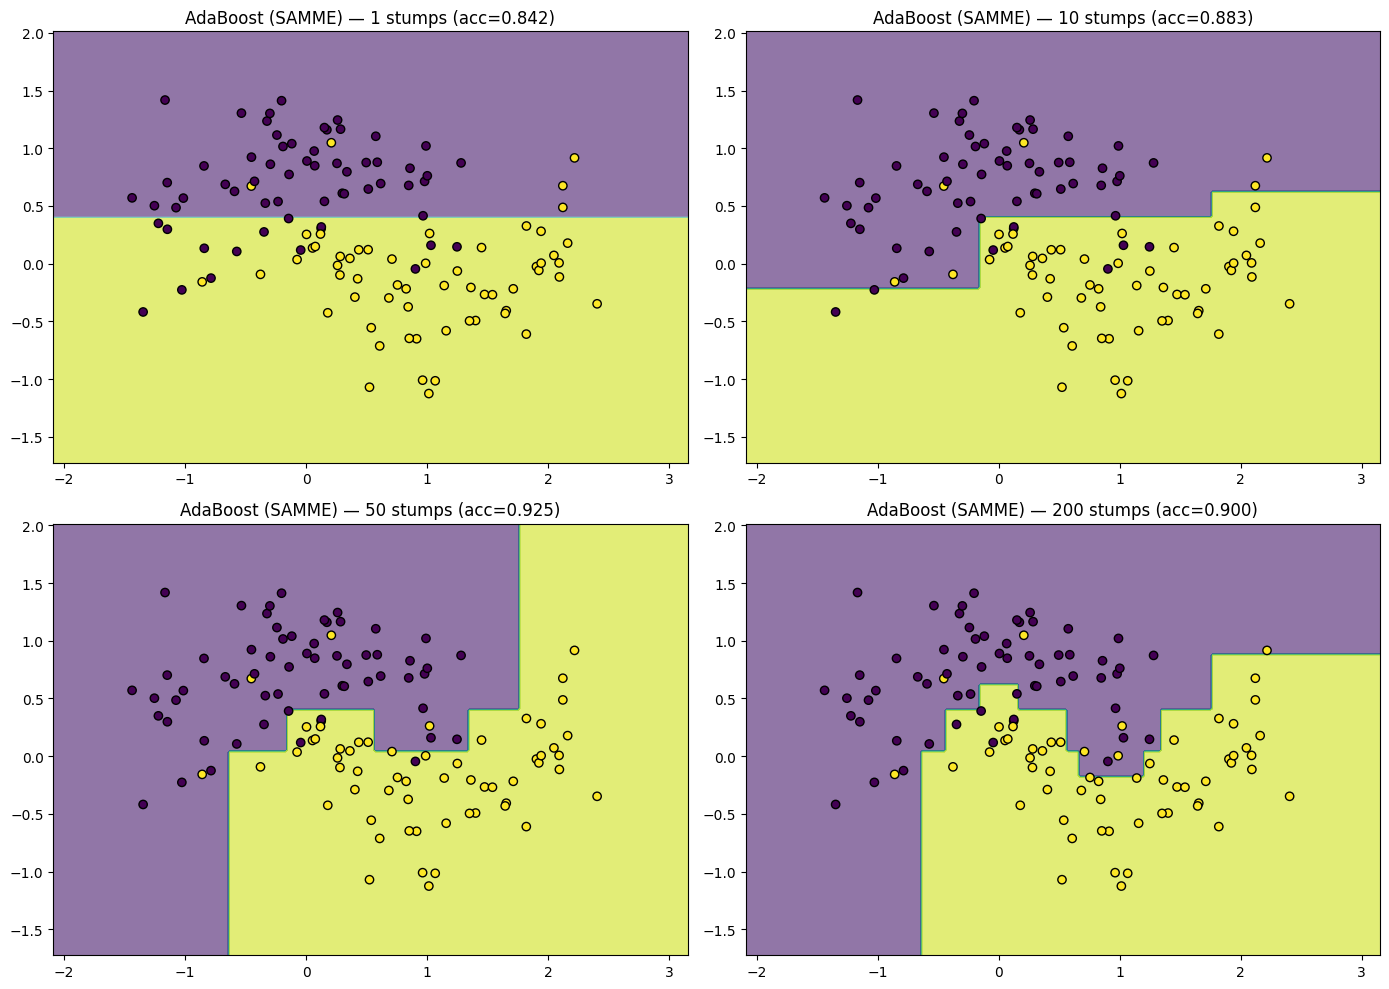


5.4 Gradient Boosting: learning curves & partial dependence


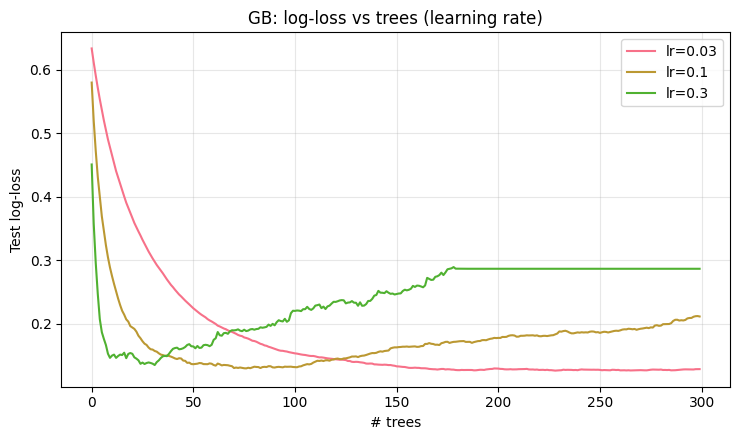

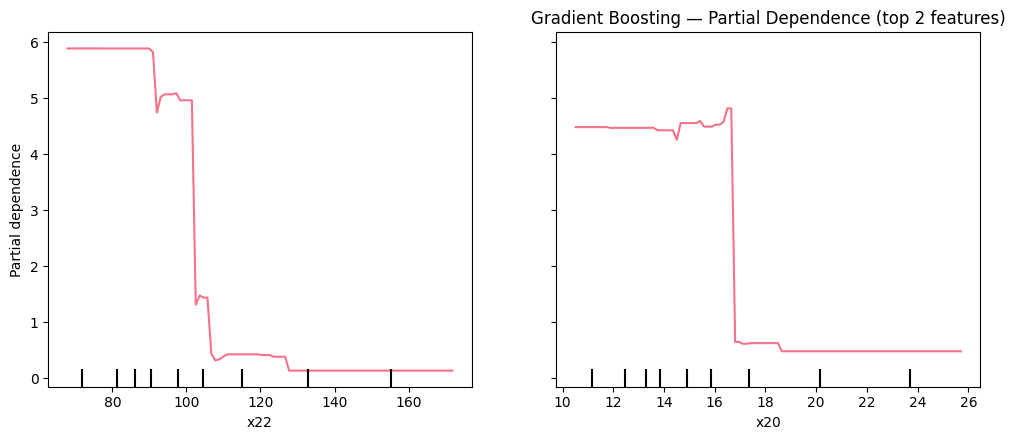

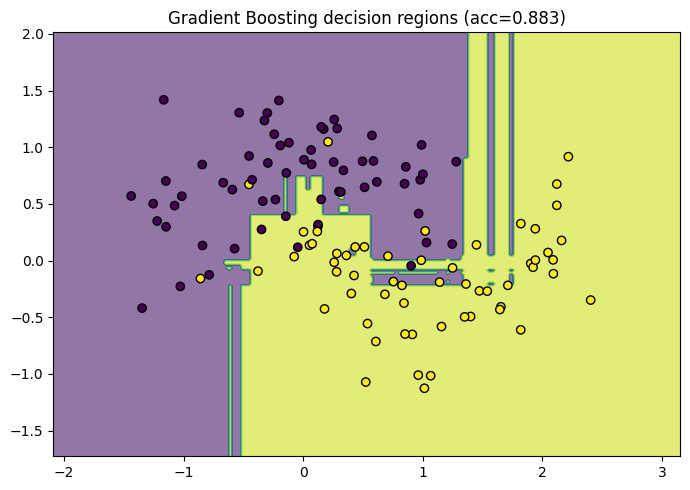


5.5 XGBoost: evaluation history & feature importance


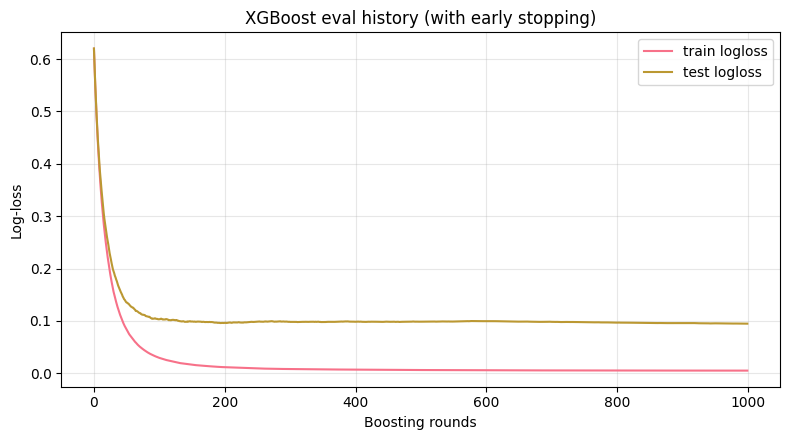

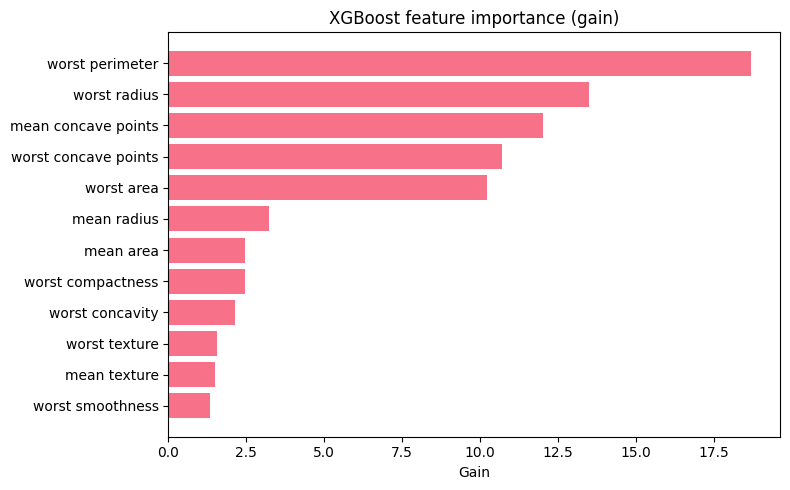

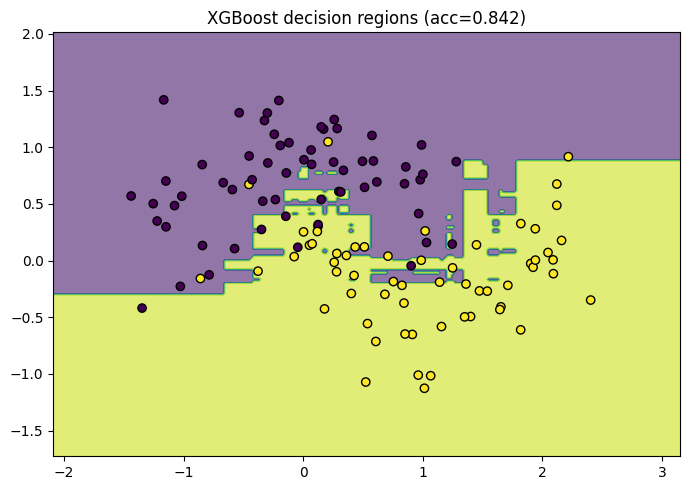


5.6 Confusion matrices (Breast Cancer)


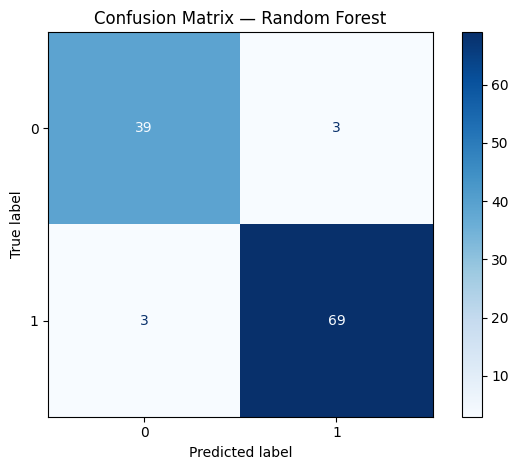

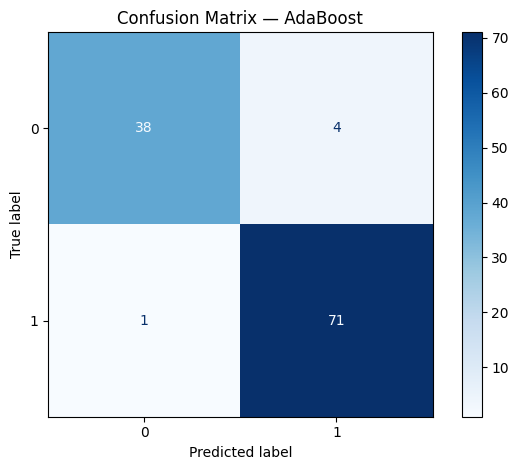

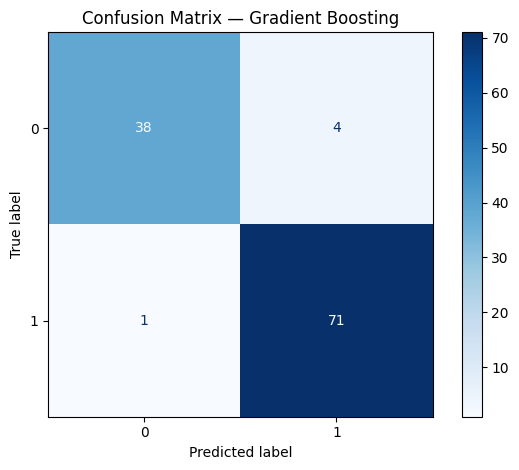

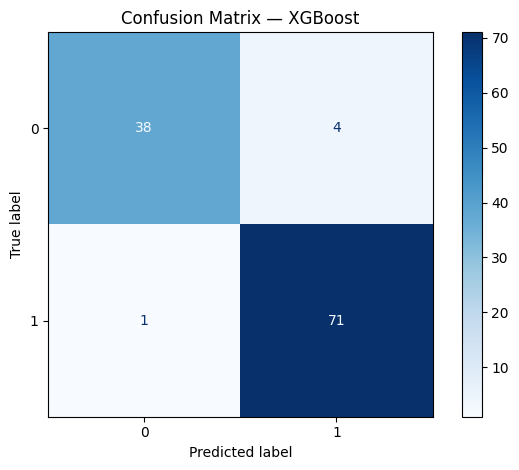


5.7 Probability calibration (reliability diagram)


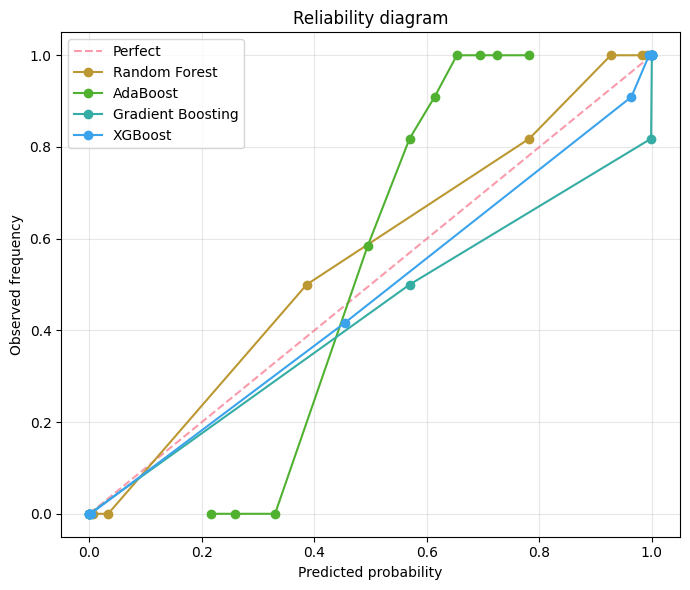


Done: RF (OOB, max_features, importances), AdaBoost (weights, margins, staged), GB (learning curves, PDPs), XGBoost (eval history, gain importances), 2D decision regions, calibration, and full metric comparison.


In [26]:
# =============================================================================
# PART 5: ENSEMBLE METHODS
# =============================================================================
# This section visualizes how major ensemble methods work:
# - Random Forest (bagging, variance reduction, OOB, max_features)
# - AdaBoost (additive stumps, estimator weights, margins, staged improvement)
# - Gradient Boosting (additive trees, learning_rate vs n_estimators, log-loss curves, PDPs)
# - XGBoost (boosting with regularization; eval history; feature importance)
# Plus: unified comparison on Breast Cancer + 2D decision boundaries.

print("\n" + "="*50)
print("PART 5: ENSEMBLE METHODS")
print("="*50)



# Optional: XGBoost (skip gracefully if not installed)
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

# -----------------------------
# Data safety (if previous parts didn't run)
# -----------------------------
try:
    X_cancer, y_cancer
except NameError:
    bc = load_breast_cancer()
    X_cancer, y_cancer = bc.data, bc.target
    cancer_feature_names = bc.feature_names

# A 2D dataset for decision boundary demos (nonlinear)
try:
    X_2d, y_2d
except NameError:
    X_2d, y_2d = make_moons(n_samples=400, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, stratify=y_cancer, random_state=42
)

# Helper to make a mesh for 2D boundaries
def make_mesh(X, h=0.02, pad=0.8):
    x_min, x_max = X[:,0].min() - pad, X[:,0].max() + pad
    y_min, y_max = X[:,1].min() - pad, X[:,1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# =============================================================================
# 5.1 Ensemble Methods Comparison (Breast Cancer) — keep trained models
# =============================================================================
print("\n5.1 Ensemble Methods Comparison (Breast Cancer)")


try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

try:
    X_cancer, y_cancer
except NameError:
    bc = load_breast_cancer()
    X_cancer, y_cancer = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, stratify=y_cancer, random_state=42
)

def make_adaboost_compat(n_estimators=200, learning_rate=0.5, random_state=42):
    from sklearn import __version__
    from packaging import version
    
    stump = DecisionTreeClassifier(max_depth=1, random_state=random_state)
    
    # Check scikit-learn version
    if version.parse(__version__) >= version.parse("1.2.0"):
        # New version: use 'estimator', no 'algorithm'
        return AdaBoostClassifier(
            estimator=stump,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state
        )
    else:
        # Old version: use 'base_estimator' and 'algorithm'
        return AdaBoostClassifier(
            base_estimator=stump,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            algorithm="SAMME",
            random_state=random_state
        )

models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "AdaBoost": make_adaboost_compat(n_estimators=200, learning_rate=0.5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42),
}
if XGB_AVAILABLE:
    models["XGBoost"] = xgb.XGBClassifier(
        n_estimators=400, learning_rate=0.1, max_depth=3, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, reg_alpha=0.0, random_state=42, eval_metric="logloss", n_jobs=-1
    )

results = {}
fitted_models = {}  # <— store trained estimators here

for name, base_clf in models.items():
    clf = clone(base_clf)
    clf.fit(X_train, y_train)
    fitted_models[name] = clf  # <— save the trained model

    y_pred = clf.predict(X_test)

    # Robust AUC (some AdaBoost builds lack predict_proba)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    elif hasattr(clf, "decision_function"):
        scores = clf.decision_function(X_test)
        auc = roc_auc_score(y_test, scores)
    else:
        auc = np.nan

    results[name] = {
        "acc":  accuracy_score(y_test, y_pred),
        "prec": precision_score(y_test, y_pred),
        "rec":  recall_score(y_test, y_pred),
        "f1":   f1_score(y_test, y_pred),
        "auc":  auc,
    }
    print(f"{name:>16}: acc={results[name]['acc']:.3f} | prec={results[name]['prec']:.3f} | "
          f"rec={results[name]['rec']:.3f} | f1={results[name]['f1']:.3f} | auc={results[name]['auc']:.3f}")

# Bar summary (unchanged)
metrics = ["acc","prec","rec","f1","auc"]
fig, axes = plt.subplots(1, len(metrics), figsize=(20,4))
names = list(results.keys())
for i, m in enumerate(metrics):
    vals = [results[n][m] for n in names]
    axes[i].bar(names, vals)
    axes[i].set_ylim(0,1)
    axes[i].set_title(m.upper())
    axes[i].tick_params(axis='x', rotation=25)
plt.tight_layout(); plt.show()




# =============================================================================
# 5.2 RANDOM FOREST — Bagging, OOB score, max_features, importances
# =============================================================================
print("\n5.2 Random Forest: OOB, max_features, and importances")

# OOB error vs n_estimators
n_list = [10, 30, 60, 120, 250, 400, 600]
oob_scores = []
for n in n_list:
    rf = RandomForestClassifier(
        n_estimators=n, oob_score=True, bootstrap=True, random_state=42, n_jobs=-1
    ).fit(X_train, y_train)
    oob_scores.append(rf.oob_score_)

plt.figure(figsize=(7,4))
plt.plot(n_list, oob_scores, marker='o')
plt.xlabel("n_estimators"); plt.ylabel("OOB accuracy"); plt.title("RF: OOB accuracy vs #trees")
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# Effect of max_features
maxf_vals = ["sqrt", "log2", 0.3, None]
val_scores = []
for mf in maxf_vals:
    rf = RandomForestClassifier(n_estimators=400, max_features=mf, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    val_scores.append(rf.score(X_test, y_test))

plt.figure(figsize=(7,4))
plt.bar([str(v) for v in maxf_vals], val_scores)
plt.ylim(0,1); plt.xlabel("max_features"); plt.ylabel("Test accuracy"); plt.title("RF: effect of feature subsampling")
plt.tight_layout(); plt.show()

# Impurity vs Permutation importances
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1).fit(X_train, y_train)
impurity_imp = rf.feature_importances_
perm = permutation_importance(rf, X_test, y_test, n_repeats=15, random_state=42, n_jobs=-1)
perm_imp = perm.importances_mean

topk = 10
order_imp = np.argsort(impurity_imp)[::-1][:topk]
order_perm = np.argsort(perm_imp)[::-1][:topk]
feature_names = load_breast_cancer().feature_names

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].barh(range(topk), impurity_imp[order_imp])
ax[0].set_yticks(range(topk)); ax[0].set_yticklabels(feature_names[order_imp]); ax[0].invert_yaxis()
ax[0].set_title("RF Impurity Importances (Top-10)")
ax[1].barh(range(topk), perm_imp[order_perm])
ax[1].set_yticks(range(topk)); ax[1].set_yticklabels(feature_names[order_perm]); ax[1].invert_yaxis()
ax[1].set_title("RF Permutation Importances (Top-10)")
plt.tight_layout(); plt.show()

# 2D Decision regions (moons)
Xm_tr, Xm_te, ym_tr, ym_te = train_test_split(X_2d, y_2d, test_size=0.3, stratify=y_2d, random_state=42)
xx, yy = make_mesh(X_2d, h=0.02, pad=0.6)
rf2 = RandomForestClassifier(n_estimators=200, random_state=42).fit(Xm_tr, ym_tr)
Z = rf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(Xm_te[:,0], Xm_te[:,1], c=ym_te, edgecolors='black')
plt.title(f"Random Forest decision regions (test acc={rf2.score(Xm_te, ym_te):.3f})")
plt.tight_layout(); plt.show()

# =============================================================================
# 5.3 AdaBoost — estimator weights, staged improvement, margins, 2D boundaries (SAMME, compat-safe)
# =============================================================================
print("\n5.3 AdaBoost: estimator weights, staged improvement, margins, decision regions")


# --- Compat AdaBoost factory (forces 'SAMME'; supports both estimator/base_estimator) ---
def make_adaboost_compat(n_estimators=200, learning_rate=0.5, random_state=42):
    from sklearn import __version__
    from packaging import version
    
    stump = DecisionTreeClassifier(max_depth=1, random_state=random_state)
    
    # Check scikit-learn version
    if version.parse(__version__) >= version.parse("1.2.0"):
        # New version: use 'estimator', no 'algorithm'
        return AdaBoostClassifier(
            estimator=stump,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state
        )
    else:
        # Old version: use 'base_estimator' and 'algorithm'
        return AdaBoostClassifier(
            base_estimator=stump,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            algorithm="SAMME",
            random_state=random_state
        )

# --- Binary (Breast Cancer) to show stage-wise behavior ---
try:
    X_cancer, y_cancer
except NameError:
    bc = load_breast_cancer()
    X_cancer, y_cancer = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, stratify=y_cancer, random_state=42
)

ada = make_adaboost_compat(n_estimators=200, learning_rate=0.5, random_state=42).fit(X_train, y_train)

# 1) Estimator weights & errors (if available in your sklearn build)
wts  = getattr(ada, "estimator_weights_", None)
errs = getattr(ada, "estimator_errors_", None)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
if wts is not None:
    ax[0].plot(wts)
    ax[0].set_title("AdaBoost (SAMME): estimator weights")
    ax[0].set_xlabel("Iteration (# stump)")
    ax[0].set_ylabel("Weight")
else:
    ax[0].text(0.5, 0.5, "estimator_weights_ not available\nin this sklearn build",
               ha='center', va='center'); ax[0].set_axis_off()

if errs is not None:
    ax[1].plot(errs)
    ax[1].set_title("AdaBoost (SAMME): estimator errors")
    ax[1].set_xlabel("Iteration (# stump)")
    ax[1].set_ylabel("Error")
else:
    ax[1].text(0.5, 0.5, "estimator_errors_ not available\nin this sklearn build",
               ha='center', va='center'); ax[1].set_axis_off()

plt.tight_layout(); plt.show()

# 2) Staged performance: accuracy and log-loss over rounds
test_acc_by_t, test_logloss_by_t = [], []

# staged_predict is always available
for y_pred in ada.staged_predict(X_test):
    test_acc_by_t.append(accuracy_score(y_test, y_pred))

# staged_predict_proba may not exist on very old builds; guard it
if hasattr(ada, "staged_predict_proba"):
    for proba in ada.staged_predict_proba(X_test):
        test_logloss_by_t.append(log_loss(y_test, proba))
else:
    # fallback: compute a single log-loss at the end (no curve)
    test_logloss_by_t = None

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_acc_by_t); ax[0].set_xlabel("# estimators"); ax[0].set_ylabel("Test accuracy")
ax[0].set_title("AdaBoost (SAMME): staged test accuracy"); ax[0].grid(True, alpha=0.3)

if test_logloss_by_t is not None:
    ax[1].plot(test_logloss_by_t)
    ax[1].set_xlabel("# estimators"); ax[1].set_ylabel("Test log-loss")
    ax[1].set_title("AdaBoost (SAMME): staged test log-loss"); ax[1].grid(True, alpha=0.3)
else:
    ax[1].text(0.5, 0.5, "staged_predict_proba not available\n(no log-loss curve)",
               ha='center', va='center'); ax[1].set_axis_off()

plt.tight_layout(); plt.show()

# 3) Margin distribution (y ∈ {0,1} → y' ∈ {−1,+1}, margin = y' · f(x))
y_train_pm = 2*y_train - 1
# decision_function exists for SAMME; guard just in case
if hasattr(ada, "decision_function"):
    f_scores = ada.decision_function(X_train)  # real-valued additive model output
    margins = y_train_pm * f_scores
    plt.figure(figsize=(7, 4))
    plt.hist(margins, bins=30, edgecolor='black')
    plt.xlabel("Margin (y · f(x))"); plt.ylabel("Count"); plt.title("AdaBoost (SAMME) training margins")
    plt.tight_layout(); plt.show()

# 4) 2D staged decision boundaries (moons) to visualize model growth
X_2d, y_2d = make_moons(n_samples=400, noise=0.30, random_state=42)
Xm_tr, Xm_te, ym_tr, ym_te = train_test_split(X_2d, y_2d, test_size=0.3, stratify=y_2d, random_state=42)

def make_mesh(X, h=0.02, pad=0.6):
    x_min, x_max = X[:,0].min() - pad, X[:,0].max() + pad
    y_min, y_max = X[:,1].min() - pad, X[:,1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

xx, yy = make_mesh(X_2d, h=0.02, pad=0.6)
checkpoints = [1, 10, 50, 200]

plt.figure(figsize=(14, 10))
for i, t in enumerate(checkpoints, 1):
    ada2 = make_adaboost_compat(n_estimators=t, learning_rate=0.5, random_state=42).fit(Xm_tr, ym_tr)
    Z = ada2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.6)
    plt.scatter(Xm_te[:, 0], Xm_te[:, 1], c=ym_te, edgecolors='black')
    plt.title(f"AdaBoost (SAMME) — {t} stumps (acc={ada2.score(Xm_te, ym_te):.3f})")
plt.tight_layout(); plt.show()



# =============================================================================
# 5.4 GRADIENT BOOSTING — Learning rate vs trees, staged log-loss, PDPs
# =============================================================================
print("\n5.4 Gradient Boosting: learning curves & partial dependence")

# Learning rate vs n_estimators trade-off
rates = [0.03, 0.1, 0.3]
max_trees = 300
fig, ax = plt.subplots(1,1, figsize=(7.5,4.5))
for lr in rates:
    gb = GradientBoostingClassifier(
        learning_rate=lr, n_estimators=max_trees, max_depth=3, random_state=42
    ).fit(X_train, y_train)
    staged_loss = []
    for proba in gb.staged_predict_proba(X_test):
        staged_loss.append(log_loss(y_test, proba))
    ax.plot(staged_loss, label=f"lr={lr}")
ax.set_xlabel("# trees"); ax.set_ylabel("Test log-loss"); ax.set_title("GB: log-loss vs trees (learning rate)")
ax.legend(); ax.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# Partial Dependence (top 2 features by impurity importance)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42).fit(X_train, y_train)
imp = gb.feature_importances_
top2 = np.argsort(imp)[-2:]
fig = plt.figure(figsize=(10,4.5))
PartialDependenceDisplay.from_estimator(gb, X_train, features=top2, kind="average", ax=plt.gca())
plt.title("Gradient Boosting — Partial Dependence (top 2 features)")
plt.tight_layout(); plt.show()

# 2D decision regions (moons)
gb2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42).fit(Xm_tr, ym_tr)
xx, yy = make_mesh(X_2d, h=0.02, pad=0.6)
Z = gb2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(Xm_te[:,0], Xm_te[:,1], c=ym_te, edgecolors='black')
plt.title(f"Gradient Boosting decision regions (acc={gb2.score(Xm_te, ym_te):.3f})")
plt.tight_layout(); plt.show()

# =============================================================================
# 5.5 XGBOOST — Eval history & importance (if installed)
# =============================================================================
if XGB_AVAILABLE:
    print("\n5.5 XGBoost: evaluation history & feature importance")

    xgb_clf = xgb.XGBClassifier(
        n_estimators=1000, learning_rate=0.05, max_depth=3,
        subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, reg_alpha=0.0,
        random_state=42, eval_metric="logloss", n_jobs=-1
    )
    xgb_clf.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False,
    )

    # Eval history
    hist = xgb_clf.evals_result()
    plt.figure(figsize=(8,4.5))
    plt.plot(hist['validation_0']['logloss'], label='train logloss')
    plt.plot(hist['validation_1']['logloss'], label='test logloss')
    plt.xlabel("Boosting rounds"); plt.ylabel("Log-loss"); plt.title("XGBoost eval history (with early stopping)")
    plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

    # Feature importance by 'gain'
    booster = xgb_clf.get_booster()
    score_dict = booster.get_score(importance_type='gain')  # {'f0': gain, 'f1': gain, ...}
    # Map 'fX' to actual names
    names = load_breast_cancer().feature_names
    keys = sorted(score_dict.keys(), key=lambda k: score_dict[k], reverse=True)
    gains = [score_dict[k] for k in keys]
    mapped_names = [names[int(k[1:])] for k in keys]

    top = 12
    plt.figure(figsize=(8,5))
    plt.barh(range(min(top,len(gains))), gains[:top])
    plt.yticks(range(min(top,len(gains))), mapped_names[:top]); plt.gca().invert_yaxis()
    plt.xlabel("Gain"); plt.title("XGBoost feature importance (gain)")
    plt.tight_layout(); plt.show()

    # 2D decision regions (moons)
    xgb2 = xgb.XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=3,
        subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, random_state=42, n_jobs=-1, eval_metric="logloss"
    ).fit(Xm_tr, ym_tr)
    xx, yy = make_mesh(X_2d, h=0.02, pad=0.6)
    Z = xgb2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.6)
    plt.scatter(Xm_te[:,0], Xm_te[:,1], c=ym_te, edgecolors='black')
    plt.title(f"XGBoost decision regions (acc={xgb2.score(Xm_te, ym_te):.3f})")
    plt.tight_layout(); plt.show()
else:
    print("\n5.5 XGBoost: SKIPPED (xgboost not installed).")

# =============================================================================
# 5.6 Confusion matrices (Breast Cancer) — use fitted_models
# =============================================================================
print("\n5.6 Confusion matrices (Breast Cancer)")
from sklearn.metrics import ConfusionMatrixDisplay

for name, clf in fitted_models.items():  # <— use fitted_models, not models
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.tight_layout(); plt.show()


# =============================================================================
# 5.7 Probability calibration (reliability diagram) — robust to missing predict_proba
# =============================================================================
print("\n5.7 Probability calibration (reliability diagram)")
from sklearn.calibration import calibration_curve

def reliability_curve(model, X, y, label):
    # Prefer true probabilities; otherwise use a squashed decision_function for visualization
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        proba = 1 / (1 + np.exp(-scores))  # logistic squash for plotting
    else:
        print(f"Skipping {label}: no predict_proba or decision_function.")
        return
    frac_pos, mean_pred = calibration_curve(y, proba, n_bins=10, strategy="quantile")
    plt.plot(mean_pred, frac_pos, marker='o', label=label)

plt.figure(figsize=(7,6))
plt.plot([0,1],[0,1], ls='--', alpha=0.7, label='Perfect')

for name in fitted_models:
    reliability_curve(fitted_models[name], X_test, y_test, name)

plt.xlabel("Predicted probability")
plt.ylabel("Observed frequency")
plt.title("Reliability diagram")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


print("\nDone: RF (OOB, max_features, importances), AdaBoost (weights, margins, staged), "
      "GB (learning curves, PDPs), XGBoost (eval history, gain importances), "
      "2D decision regions, calibration, and full metric comparison.")



PART 6: PERFORMANCE EVALUATION
6.1 ROC Curves Analysis
6.1 ROC Curves Analysis


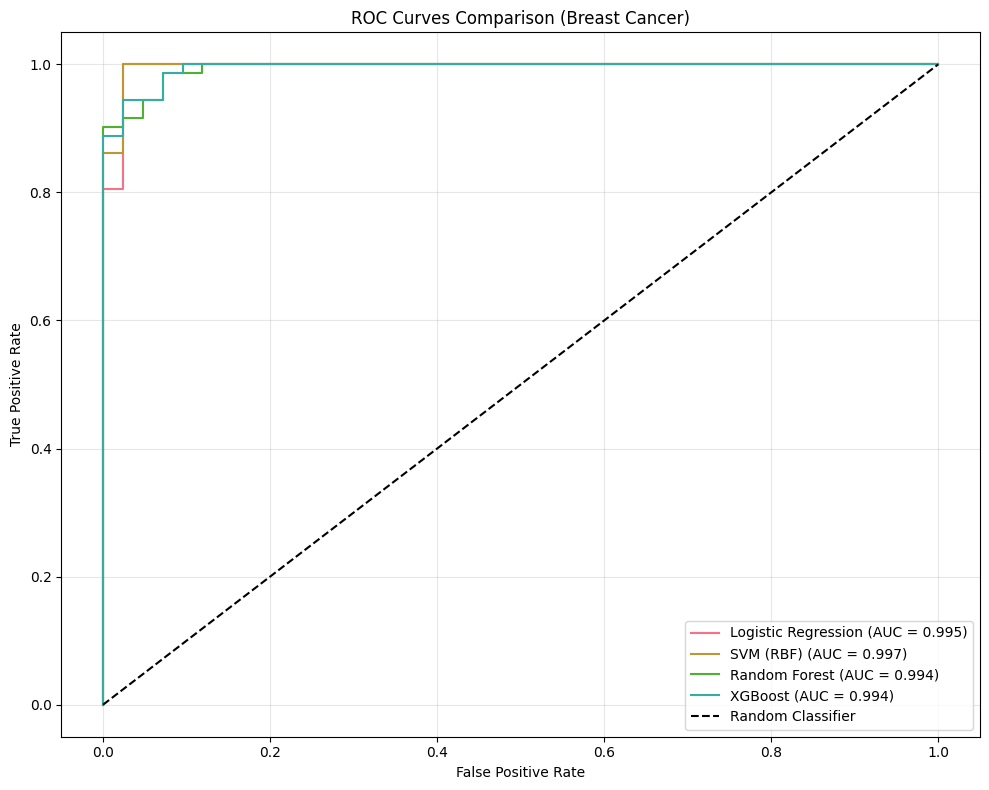


6.2 Precision-Recall Curves


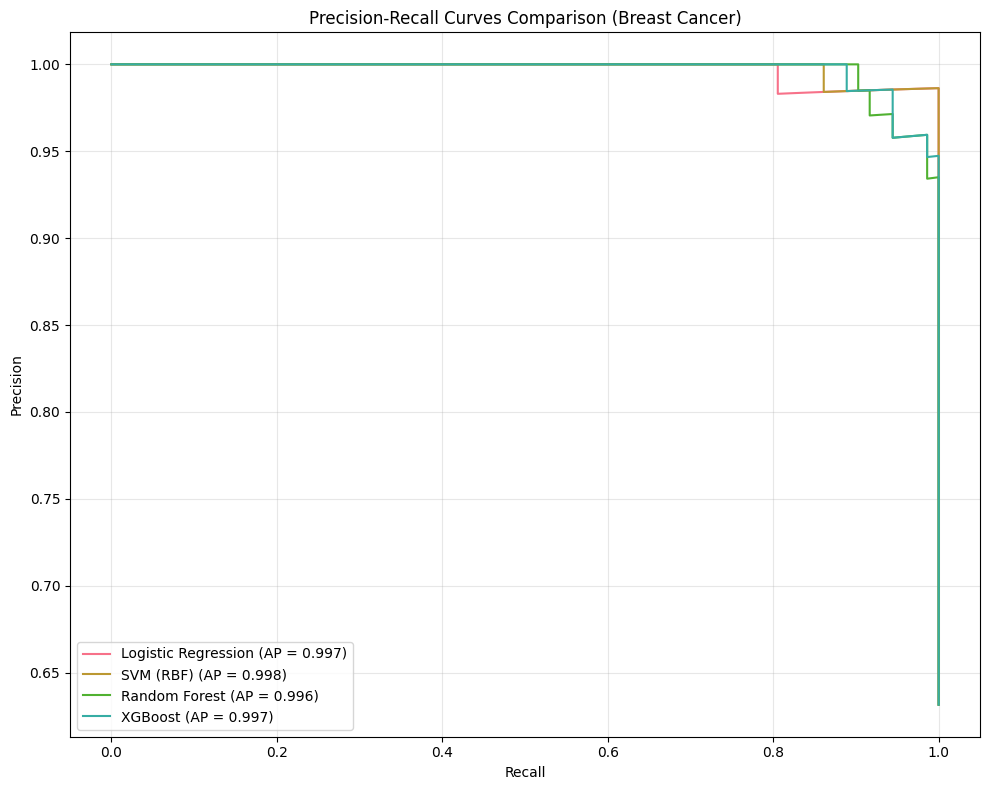


6.3 Confusion Matrices


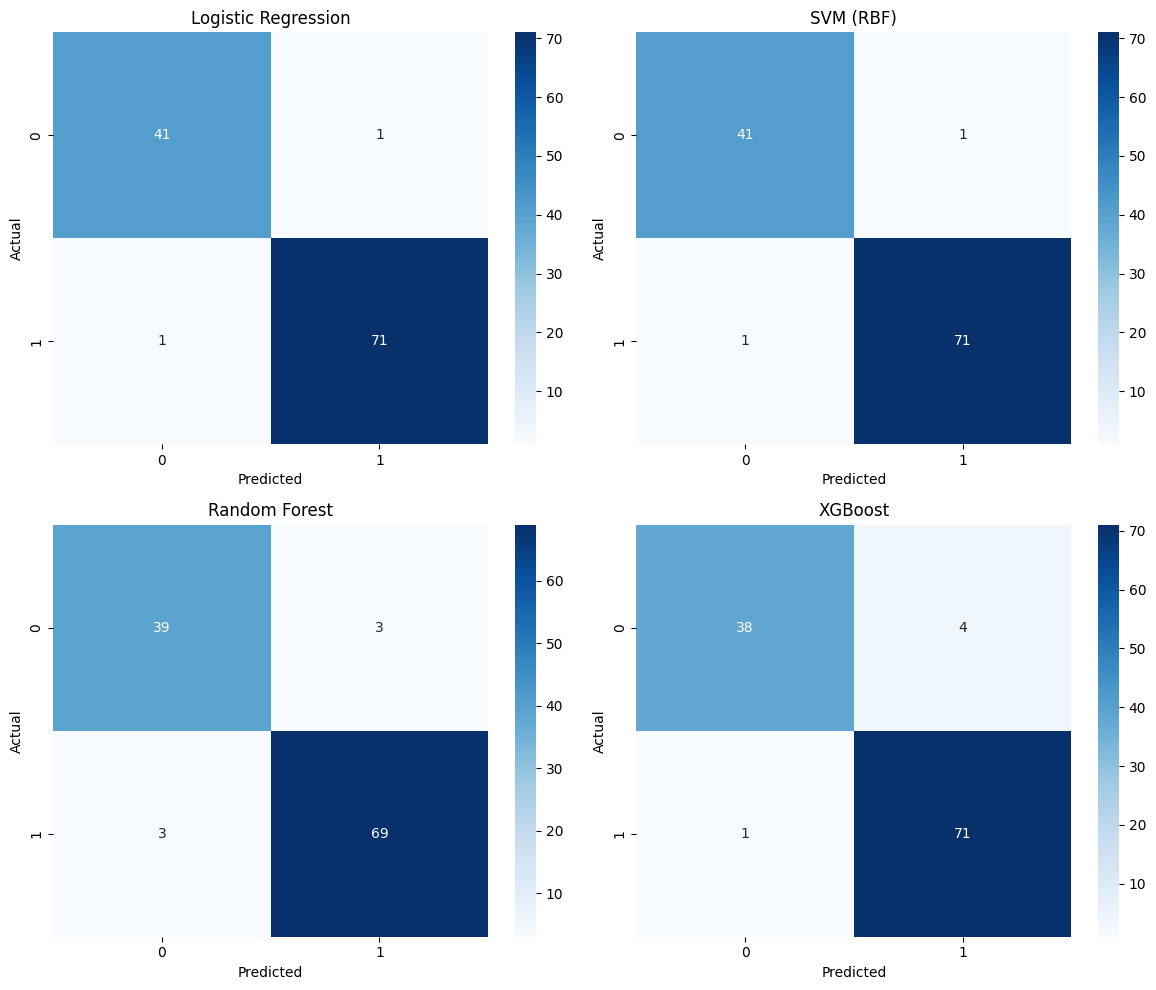

In [27]:
# =============================================================================
# PART 6: PERFORMANCE EVALUATION
# =============================================================================

print("\n" + "="*50)
print("PART 6: PERFORMANCE EVALUATION")
print("="*50)

# Optional: XGBoost (skip gracefully if not installed)
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

# -----------------------------
# 6.0 Data
# -----------------------------
bc = load_breast_cancer()
X6, y6 = bc.data, bc.target
X6_train, X6_test, y6_train, y6_test = train_test_split(
    X6, y6, test_size=0.2, stratify=y6, random_state=42
)

# -----------------------------
# 6.0.1 Models
# -----------------------------
models6 = {
    "Logistic Regression": Pipeline([
        ("sc", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "SVM (RBF)": Pipeline([
        ("sc", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True, random_state=42))
    ]),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
}
if XGB_AVAILABLE:
    models6["XGBoost"] = xgb.XGBClassifier(
        n_estimators=400, learning_rate=0.1, max_depth=3,
        subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, random_state=42, eval_metric="logloss", n_jobs=-1
    )

# Fit all models for this section
for name, mdl in models6.items():
    mdl.fit(X6_train, y6_train)

# -----------------------------
# 6.1 ROC Curves Analysis
# -----------------------------
print("6.1 ROC Curves Analysis")

def get_scores_for_auc(model, X):
    """Return continuous scores for AUC/ROC:
       prefer predict_proba; else decision_function; else None."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X)
    return None

plt.figure(figsize=(10, 8))
for name, mdl in models6.items():
    scores = get_scores_for_auc(mdl, X6_test)
    if scores is None:
        continue  # skip if no continuous score available
    fpr, tpr, _ = roc_curve(y6_test, scores)
    auc_score = roc_auc_score(y6_test, scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison (Breast Cancer)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 6.2 Precision-Recall Curves
# -----------------------------
print("\n6.2 Precision-Recall Curves")

plt.figure(figsize=(10, 8))
for name, mdl in models6.items():
    scores = get_scores_for_auc(mdl, X6_test)
    if scores is None:
        continue
    precision, recall, _ = precision_recall_curve(y6_test, scores)
    avg_precision = average_precision_score(y6_test, scores)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.3f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison (Breast Cancer)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 6.3 Confusion Matrices
# -----------------------------
print("\n6.3 Confusion Matrices")

n_models = len(models6)
n_cols = 2
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = np.array(axes).reshape(n_rows, n_cols)

idx = 0
for name, mdl in models6.items():
    r, c = divmod(idx, n_cols)
    y_pred = mdl.predict(X6_test)
    cm = confusion_matrix(y6_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[r, c])
    axes[r, c].set_title(f'{name}')
    axes[r, c].set_xlabel('Predicted')
    axes[r, c].set_ylabel('Actual')
    idx += 1

# Hide any empty subplots
while idx < n_rows * n_cols:
    r, c = divmod(idx, n_cols)
    axes[r, c].axis('off')
    idx += 1

plt.tight_layout()
plt.show()



PART 7: CLASS IMBALANCE HANDLING
7.1 Creating Imbalanced Dataset
Original class distribution:
  Class 0: 896 (89.6%)
  Class 1: 104 (10.4%)

7.2 Method 1: Class Weights
Logistic Regression with Balanced Class Weights:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       179
           1       0.81      1.00      0.89        21

    accuracy                           0.97       200
   macro avg       0.90      0.99      0.94       200
weighted avg       0.98      0.97      0.98       200


7.3 Method 2: SMOTE
After SMOTE class distribution:
  Class 0: 717 (50.0%)
  Class 1: 717 (50.0%)
Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       179
           1       0.78      1.00      0.88        21

    accuracy                           0.97       200
   macro avg       0.89      0.98      0.93       200
weighted avg       0.98      0.97      0.97       2

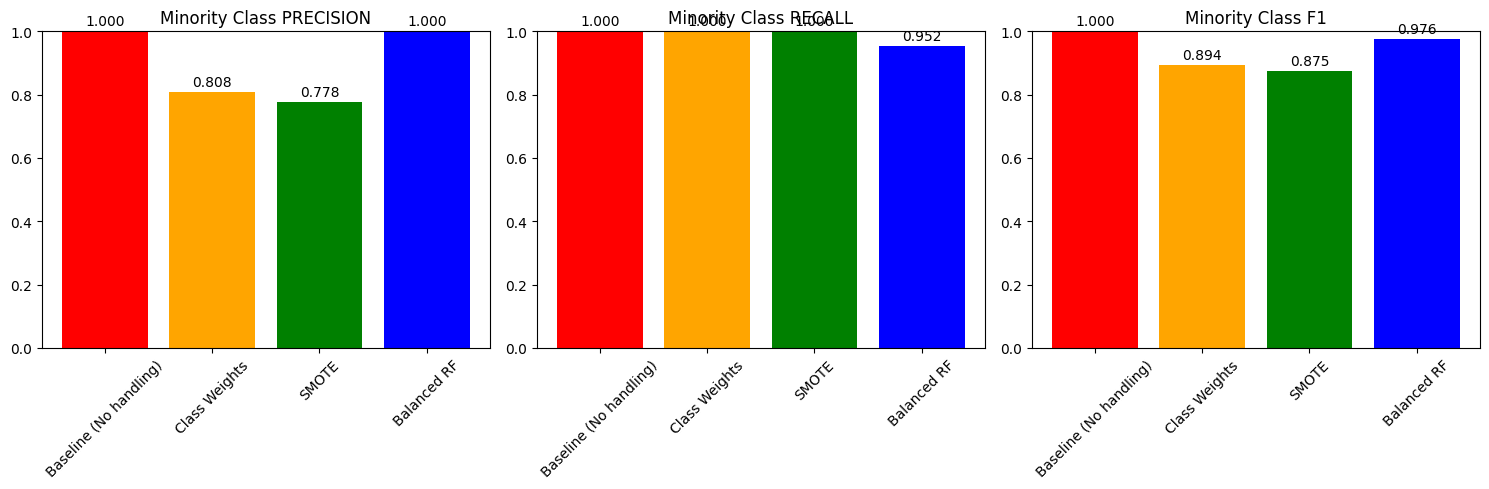

In [28]:

# =============================================================================
# PART 7: CLASS IMBALANCE HANDLING
# =============================================================================

print("\n" + "="*50)
print("PART 7: CLASS IMBALANCE HANDLING")
print("="*50)

# Create imbalanced dataset
print("7.1 Creating Imbalanced Dataset")
X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                                  n_redundant=10, n_clusters_per_class=1, 
                                  weights=[0.9, 0.1], random_state=42)

print(f"Original class distribution:")
unique, counts = np.unique(y_imb, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} ({count/len(y_imb)*100:.1f}%)")

# Split data
X_imb_train, X_imb_test, y_imb_train, y_imb_test = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42, stratify=y_imb)

# Scale data
scaler_imb = StandardScaler()
X_imb_train_scaled = scaler_imb.fit_transform(X_imb_train)
X_imb_test_scaled = scaler_imb.transform(X_imb_test)

# Method 1: Class weights
print("\n7.2 Method 1: Class Weights")
lr_balanced = LogisticRegression(class_weight='balanced', random_state=42)
lr_balanced.fit(X_imb_train_scaled, y_imb_train)

y_pred_balanced = lr_balanced.predict(X_imb_test_scaled)
print("Logistic Regression with Balanced Class Weights:")
print(classification_report(y_imb_test, y_pred_balanced))

# Method 2: SMOTE (Synthetic Minority Oversampling Technique)
print("\n7.3 Method 2: SMOTE")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imb_train_scaled, y_imb_train)

print(f"After SMOTE class distribution:")
unique, counts = np.unique(y_smote, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} ({count/len(y_smote)*100:.1f}%)")

lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_smote, y_smote)

y_pred_smote = lr_smote.predict(X_imb_test_scaled)
print("Logistic Regression with SMOTE:")
print(classification_report(y_imb_test, y_pred_smote))

# Method 3: Ensemble with balanced sampling
print("\n7.4 Method 3: Balanced Random Forest")
rf_balanced = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_balanced.fit(X_imb_train_scaled, y_imb_train)

y_pred_rf_balanced = rf_balanced.predict(X_imb_test_scaled)
print("Random Forest with Balanced Class Weights:")
print(classification_report(y_imb_test, y_pred_rf_balanced))

# Compare methods
print("\n7.5 Imbalance Handling Methods Comparison")

methods = {
    'Baseline (No handling)': LogisticRegression(random_state=42),
    'Class Weights': LogisticRegression(class_weight='balanced', random_state=42),
    'SMOTE': LogisticRegression(random_state=42),
    'Balanced RF': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
}

comparison_results = {}

for name, model in methods.items():
    if name == 'SMOTE':
        model.fit(X_smote, y_smote)
    else:
        model.fit(X_imb_train_scaled, y_imb_train)
    
    y_pred = model.predict(X_imb_test_scaled)
    
    # Focus on minority class (class 1) metrics
    precision_1 = precision_score(y_imb_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_imb_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_imb_test, y_pred, pos_label=1)
    
    comparison_results[name] = {
        'precision_minority': precision_1,
        'recall_minority': recall_1,
        'f1_minority': f1_1
    }

# Plot comparison
metrics = ['precision_minority', 'recall_minority', 'f1_minority']
method_names = list(comparison_results.keys())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(metrics):
    values = [comparison_results[method][metric] for method in method_names]
    bars = axes[i].bar(method_names, values, color=['red', 'orange', 'green', 'blue'])
    axes[i].set_title(f'Minority Class {metric.split("_")[0].upper()}')
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Predict BAD credit risk from mixed features.

Train, evaluate and compare Logistic Regression, Decision Tree, SVM, Random Forest and LightGBM (optionjal) classifiers on the German Credit dataset.

Dataset shape: (1000, 20)
Target positive rate (bad=1): 0.3
Sample columns: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment']
Models defined: ['Logistic Regression', 'Decision Tree', 'SVM (RBF)', 'Random Forest']

TRAINING AND EVALUATION RESULTS

Training Logistic Regression...
  Accuracy:  0.780
  Precision: 0.667
  Recall:    0.533
  F1-Score:  0.593
  ROC-AUC:   0.804
  Training Time: 0.06 seconds

Training Decision Tree...
  Accuracy:  0.640
  Precision: 0.419
  Recall:    0.517
  F1-Score:  0.463
  ROC-AUC:   0.621
  Training Time: 0.02 seconds

Training SVM (RBF)...
  Accuracy:  0.790
  Precision: 0.725
  Recall:    0.483
  F1-Score:  0.580
  ROC-AUC:   0.796
  Training Time: 0.17 seconds

Training Random Forest...
  Accuracy:  0.790
  Precision: 0.725
  Recall:    0.483
  F1-Score:  0.580
  ROC-AUC:   0.796
  Training Time: 0.17 seconds

Training Random Forest...
  Accuracy:  0.760
  Precision:

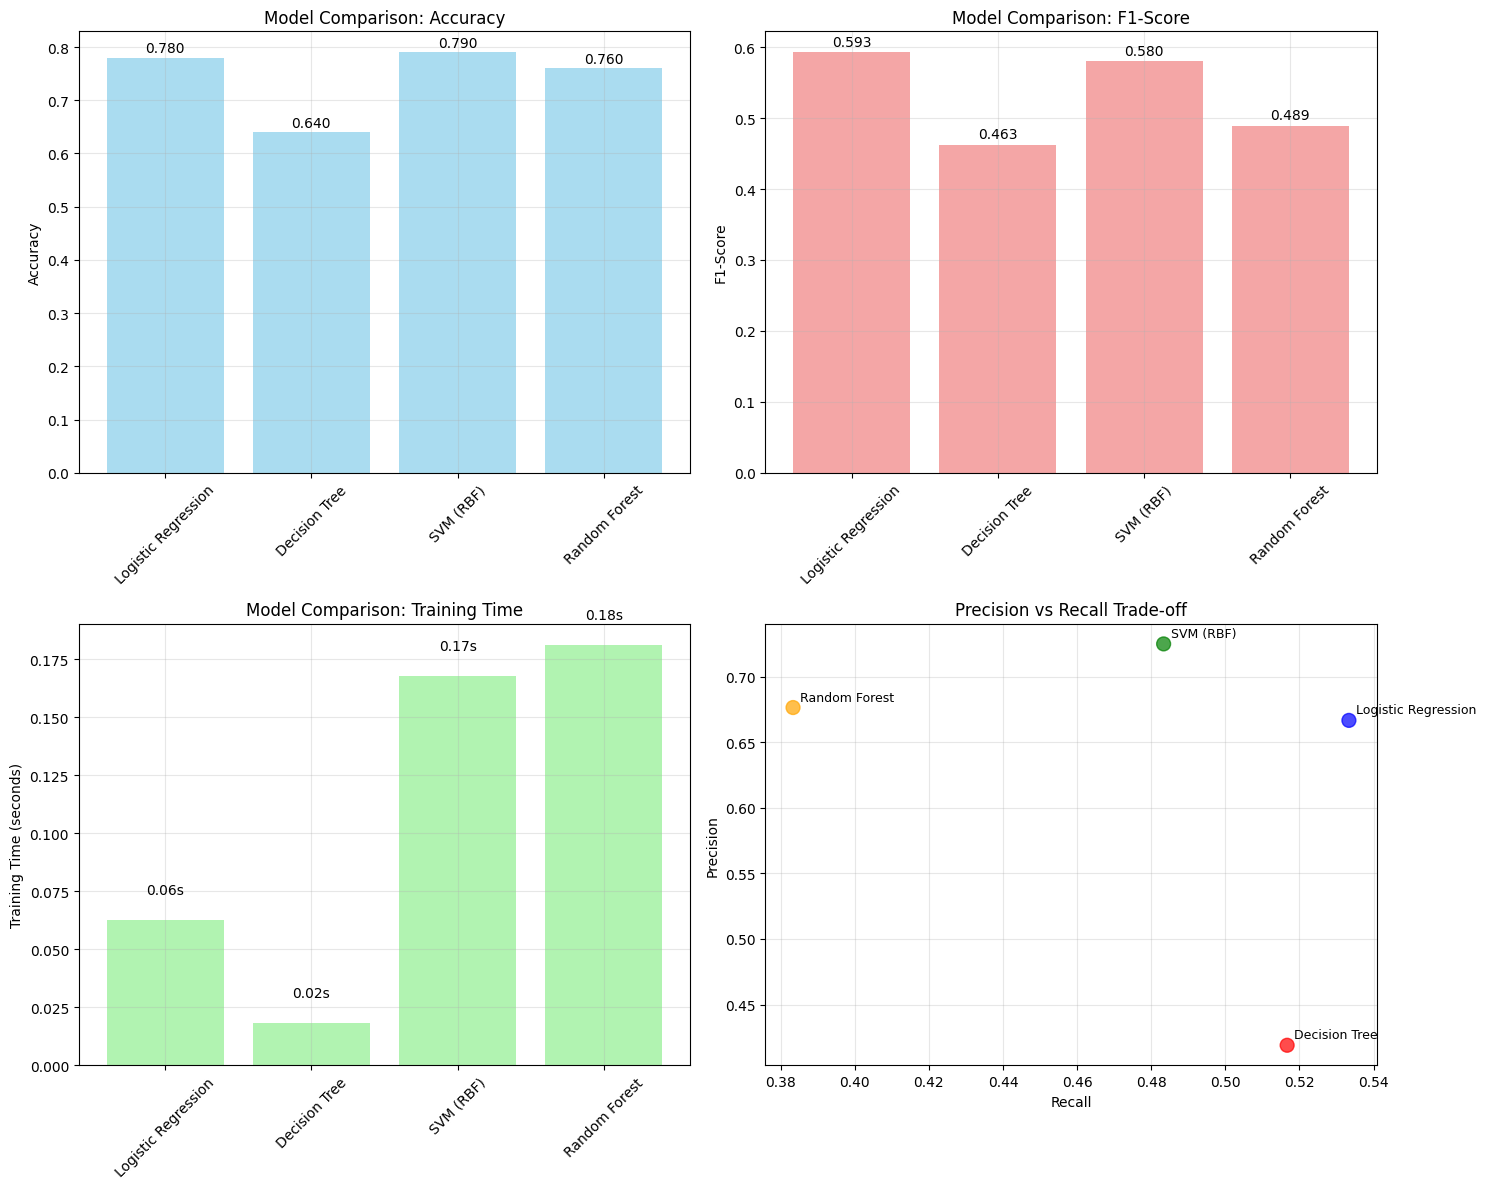


SUMMARY TABLE
Model              Accuracy   Precision   Recall   F1-Score  ROC-AUC  Time(s) 
--------------------------------------------------------------------------------
Logistic Regression 0.780      0.667       0.533    0.593     0.804    0.06    
Decision Tree      0.640      0.419       0.517    0.463     0.621    0.02    
SVM (RBF)          0.790      0.725       0.483    0.580     0.796    0.17    
Random Forest      0.760      0.676       0.383    0.489     0.792    0.18    

Best F1-Score model: Logistic Regression (F1: 0.593)
Best Accuracy model: SVM (RBF) (Accuracy: 0.790)


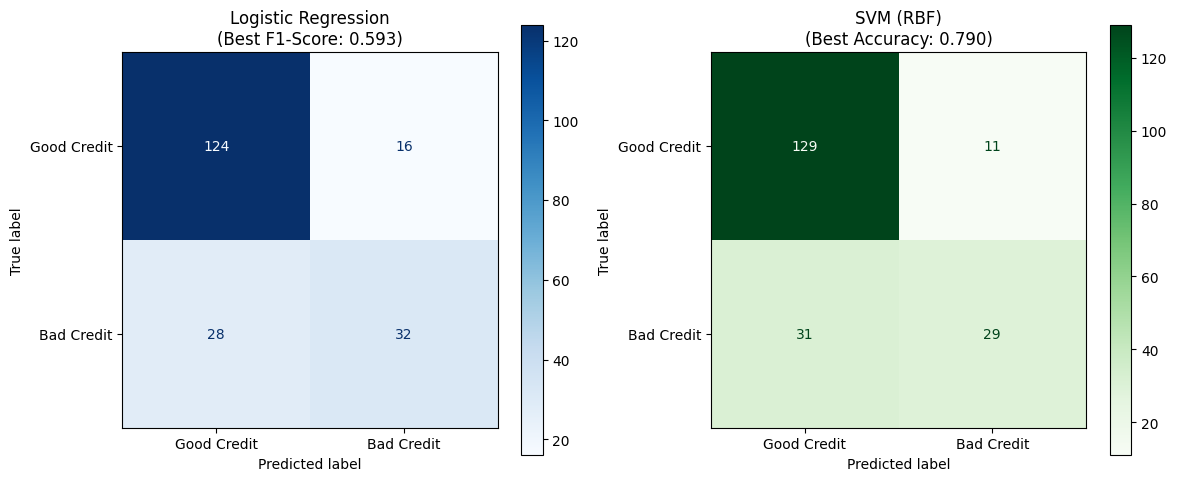


DISCUSSION
- Which model achieved the highest F1 score? Is it the same model with highest accuracy?
- Compare precision/recall trade-off across models. Which one misses more positives?
- How do training times differ?


In [30]:
# =============================================================================
# CLASS ACTIVITY: Compare LR, DT, SVM, RF on a harder real dataset
# Dataset: OpenML "German Credit" (credit-g) — mixed numeric + categorical,
#          deliberately not easy → great for discussion (no perfect accuracy).
# =============================================================================

# -----------------------------
# Step 0: Imports
# -----------------------------
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

# -----------------------------
# Step 1: Load dataset
# -----------------------------
# TODO: Fetch the OpenML "credit-g" dataset as a pandas DataFrame.
data = fetch_openml(name="credit-g", version=1, as_frame=True)
df = data.frame.copy()

# Target is 'class' with values {'good','bad'} → make binary {0,1} (1 = 'bad' credit risk)
# TODO: Map target to 0/1
y = (df['class'] == 'bad').astype(int)
X = df.drop(columns=['class'])

print("Dataset shape:", X.shape)
print("Target positive rate (bad=1):", y.mean().round(3))
print("Sample columns:", X.columns[:8].tolist())

# -----------------------------
# Step 2: Train/test split (stratified)
# -----------------------------
# TODO: Split into 80/20 train/test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# -----------------------------
# Step 3: Preprocessing
# -----------------------------
# OneHotEncode categoricals (handle_unknown='ignore') + StandardScale numerics
# Trees don’t need scaling, but it won’t hurt; LR/SVM do benefit.
# TODO: Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# TODO: Build a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# -----------------------------
# Step 4: Define models (baseline hyperparameters)
# -----------------------------
# Keep params modest so it runs quickly and shows differences.
models = {
    "Logistic Regression": LogisticRegression(
        solver='lbfgs', max_iter=1000, random_state=RANDOM_STATE
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10, min_samples_split=20, random_state=RANDOM_STATE
    ),
    "SVM (RBF)": SVC(
        kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=RANDOM_STATE
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=10, random_state=RANDOM_STATE
    )
}

print("Models defined:", list(models.keys()))
# -----------------------------
# Step 5: Train + Evaluate
# -----------------------------
# TODO: For each model, wrap with the same preprocessing pipeline, fit, time it,
#       and compute metrics (Accuracy, Precision, Recall, F1).
results = {}
fitted_pipelines = {}

print(f"\n{'='*60}")
print("TRAINING AND EVALUATION RESULTS")
print(f"{'='*60}")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline with preprocessing + model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Time the training
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ROC AUC (only if probabilities available)
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    except:
        roc_auc = None
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'predictions': y_pred
    }
    
    fitted_pipelines[name] = pipeline
    
    # Print results
    print(f"  Accuracy:  {accuracy:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    if roc_auc is not None:
        print(f"  ROC-AUC:   {roc_auc:.3f}")
    print(f"  Training Time: {training_time:.2f} seconds")


# -----------------------------
# Step 6: comparison
# -----------------------------
# TODO: Plot Accuracy, F1 for quick comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
f1_scores = [results[name]['f1'] for name in model_names]
training_times = [results[name]['training_time'] for name in model_names]

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(model_names, accuracies, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Model Comparison: Accuracy')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

# F1 Score comparison
axes[0, 1].bar(model_names, f1_scores, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Model Comparison: F1-Score')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)
for i, v in enumerate(f1_scores):
    axes[0, 1].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

# Training Time comparison
axes[1, 0].bar(model_names, training_times, color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Model Comparison: Training Time')
axes[1, 0].set_ylabel('Training Time (seconds)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)
for i, v in enumerate(training_times):
    axes[1, 0].text(i, v + 0.01, f'{v:.2f}s', ha='center', va='bottom')

# Precision vs Recall scatter plot
precisions = [results[name]['precision'] for name in model_names]
recalls = [results[name]['recall'] for name in model_names]

axes[1, 1].scatter(recalls, precisions, s=100, alpha=0.7, c=['blue', 'red', 'green', 'orange'])
axes[1, 1].set_title('Precision vs Recall Trade-off')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].grid(True, alpha=0.3)

# Add model labels to scatter plot
for i, name in enumerate(model_names):
    axes[1, 1].annotate(name, (recalls[i], precisions[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary table
print(f"\n{'='*80}")
print("SUMMARY TABLE")
print(f"{'='*80}")
print(f"{'Model':<18} {'Accuracy':<10} {'Precision':<11} {'Recall':<8} {'F1-Score':<9} {'ROC-AUC':<8} {'Time(s)':<8}")
print("-" * 80)
for name in model_names:
    r = results[name]
    roc_str = f"{r['roc_auc']:.3f}" if r['roc_auc'] is not None else "N/A"
    print(f"{name:<18} {r['accuracy']:<10.3f} {r['precision']:<11.3f} {r['recall']:<8.3f} {r['f1']:<9.3f} {roc_str:<8} {r['training_time']:<8.2f}")

# -----------------------------
# Step 7 Confusion matrices
# -----------------------------
# TODO: Show confusion matrix for a couple of models (e.g., best F1 and best AUC)
# Find best F1 and best accuracy models
best_f1_model = max(results.items(), key=lambda x: x[1]['f1'])[0]
best_acc_model = max(results.items(), key=lambda x: x[1]['accuracy'])[0]

print(f"\nBest F1-Score model: {best_f1_model} (F1: {results[best_f1_model]['f1']:.3f})")
print(f"Best Accuracy model: {best_acc_model} (Accuracy: {results[best_acc_model]['accuracy']:.3f})")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Best F1 model confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, results[best_f1_model]['predictions'], 
    display_labels=['Good Credit', 'Bad Credit'],
    ax=axes[0], cmap='Blues', values_format='d'
)
axes[0].set_title(f'{best_f1_model}\n(Best F1-Score: {results[best_f1_model]["f1"]:.3f})')

# Best Accuracy model confusion matrix (if different)
if best_acc_model != best_f1_model:
    ConfusionMatrixDisplay.from_predictions(
        y_test, results[best_acc_model]['predictions'],
        display_labels=['Good Credit', 'Bad Credit'],
        ax=axes[1], cmap='Greens', values_format='d'
    )
    axes[1].set_title(f'{best_acc_model}\n(Best Accuracy: {results[best_acc_model]["accuracy"]:.3f})')
else:
    # If same model is best for both, show second-best F1
    second_best_f1 = sorted(results.items(), key=lambda x: x[1]['f1'], reverse=True)[1][0]
    ConfusionMatrixDisplay.from_predictions(
        y_test, results[second_best_f1]['predictions'],
        display_labels=['Good Credit', 'Bad Credit'],
        ax=axes[1], cmap='Oranges', values_format='d'
    )
    axes[1].set_title(f'{second_best_f1}\n(F1-Score: {results[second_best_f1]["f1"]:.3f})')

plt.tight_layout()
plt.show()

# -----------------------------
# Discussion prompts (for class)
# -----------------------------
print("\nDISCUSSION")
print("- Which model achieved the highest F1 score? Is it the same model with highest accuracy?")
print("- Compare precision/recall trade-off across models. Which one misses more positives?")
print("- How do training times differ?")

